# COVID-19 Data Set
data set provided by https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases
___

In [1]:
# imports
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../Data/COVID-19/time_series_covid19_confirmed_global.csv')
df.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/10/20  4/11/20  4/12/20  4/13/20  \
0        0        0        0  ...      521      555      607      665   
1        0        0        0  ...      416      433      446      467   
2        0        0        0  ...     1761     1825     1914     1983   
3        0        0        0  ...      601      601      638      646   
4        0        0        0  ...       19       19       19       19   

   4/14/20  4/15/20  4/16/20  4/17/20  4/18/20  4/19/20  
0      714      784      840      906      933      996  
1      475      494      518      539      548      562  
2     2070     2160     2268     2418     2534     2629  
3      659      673      673      696      704      713  
4       19       19       19       19       24       24  

[5 rows x 93 columns]

In [3]:
df.shape

(264, 93)

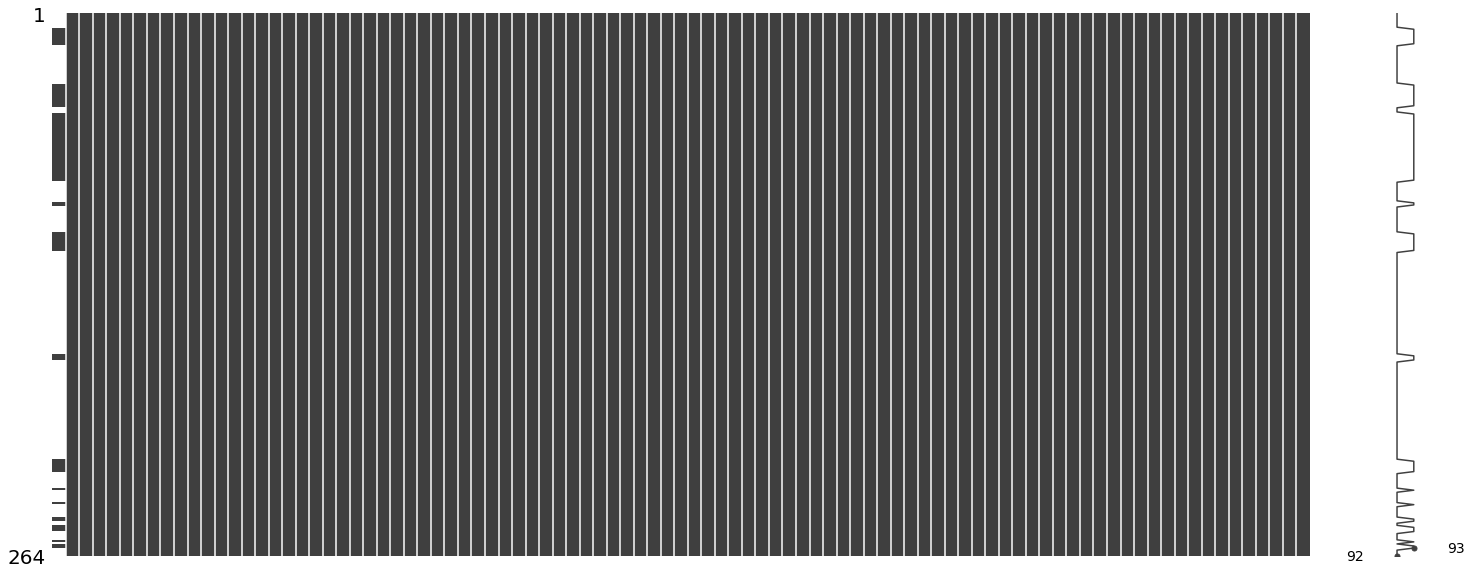

In [4]:
msno.matrix(df);

In [5]:
df['Country/Region'].values

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Australia', 'Australia', 'Australia', 'Australia', 'Australia',
       'Australia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China

In [6]:
df['Province/State'].values

array([nan, nan, nan, nan, nan, nan, nan, nan,
       'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       'Alberta', 'British Columbia', 'Grand Princess', 'Manitoba',
       'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia',
       'Ontario', 'Prince Edward Island', 'Quebec', 'Saskatchewan', nan,
       nan, nan, 'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu',
       'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei',
       'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan',
       'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning',
       'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai',
       'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan',
       'Zhejiang', nan, nan, nan, nan, nan, nan, nan, nan, nan, na

___
## US Curve

In [7]:
USdf = df[df['Country/Region'] == 'US'].drop(columns=['Province/State', 'Country/Region','Lat', 'Long']).T.rename(columns={225: 'US'})
USdf

US
1/22/20       1
1/23/20       1
1/24/20       2
1/25/20       2
1/26/20       5
...         ...
4/15/20  636350
4/16/20  667592
4/17/20  699706
4/18/20  732197
4/19/20  759086

[89 rows x 1 columns]

In [12]:
USdf['Date'] = pd.to_datetime(USdf.index)

USdf.set_index('Date', inplace=True)

USdf

US
Date              
2020-01-22       1
2020-01-23       1
2020-01-24       2
2020-01-25       2
2020-01-26       5
...            ...
2020-04-15  636350
2020-04-16  667592
2020-04-17  699706
2020-04-18  732197
2020-04-19  759086

[89 rows x 1 columns]

In [15]:
USdf.resample('w').mean()

US
Date                     
2020-01-26       2.200000
2020-02-02       6.142857
2020-02-09      11.000000
2020-02-16      12.428571
2020-02-23      13.857143
2020-03-01      59.857143
2020-03-08     252.000000
2020-03-15    1841.571429
2020-03-22   15818.857143
2020-03-29   87317.714286
2020-04-05  246949.714286
2020-04-12  462035.428571
2020-04-19  669031.428571

In [25]:
pd.concat([
    USdf[['US']],
    USdf[['US']].rolling(7).mean().rename(columns={'US':'US 7 Day Avg'})
], axis=1)

US   US 7 Day Avg
Date                             
2020-01-22       1            NaN
2020-01-23       1            NaN
2020-01-24       2            NaN
2020-01-25       2            NaN
2020-01-26       5            NaN
...            ...            ...
2020-04-15  636350  552237.571429
2020-04-16  667592  581496.428571
2020-04-17  699706  610520.857143
2020-04-18  732197  639921.000000
2020-04-19  759086  669031.428571

[89 rows x 2 columns]

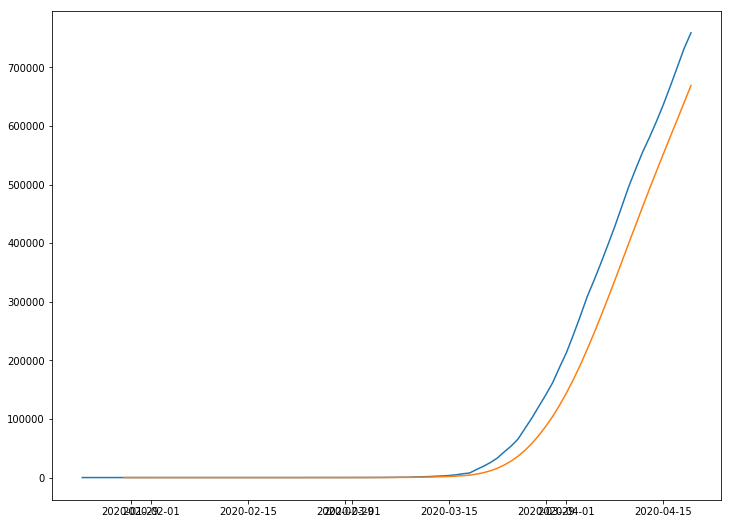

In [23]:
plt.figure(figsize=(12,9))
plt.plot(USdf['US'])
plt.plot(USdf['US'].rolling(7).mean());

___
## China Curve

In [35]:
chinaData = df[df['Country/Region'] == 'China'].drop(columns=['Province/State', 'Lat', 'Long', 'Country/Region']).sum()
chinaData

1/22/20      548
1/23/20      643
1/24/20      920
1/25/20     1406
1/26/20     2075
           ...  
4/15/20    83356
4/16/20    83403
4/17/20    83760
4/18/20    83787
4/19/20    83805
Length: 89, dtype: int64

In [47]:
Chinadf = pd.DataFrame(chinaData, columns=['China'])
Chinadf['Date'] = pd.to_datetime(Chinadf.index)
Chinadf.set_index('Date', inplace=True)
Chinadf

China
Date             
2020-01-22    548
2020-01-23    643
2020-01-24    920
2020-01-25   1406
2020-01-26   2075
...           ...
2020-04-15  83356
2020-04-16  83403
2020-04-17  83760
2020-04-18  83787
2020-04-19  83805

[89 rows x 1 columns]

In [48]:
Chinadf.resample('w').mean()

China
Date                    
2020-01-26   1118.400000
2020-02-02   8705.285714
2020-02-09  30314.714286
2020-02-16  56668.285714
2020-02-23  75130.571429
2020-03-01  78568.142857
2020-03-08  80514.714286
2020-03-15  80932.142857
2020-03-22  81191.285714
2020-03-29  81792.857143
2020-04-05  82418.000000
2020-04-12  82880.571429
2020-04-19  83518.571429

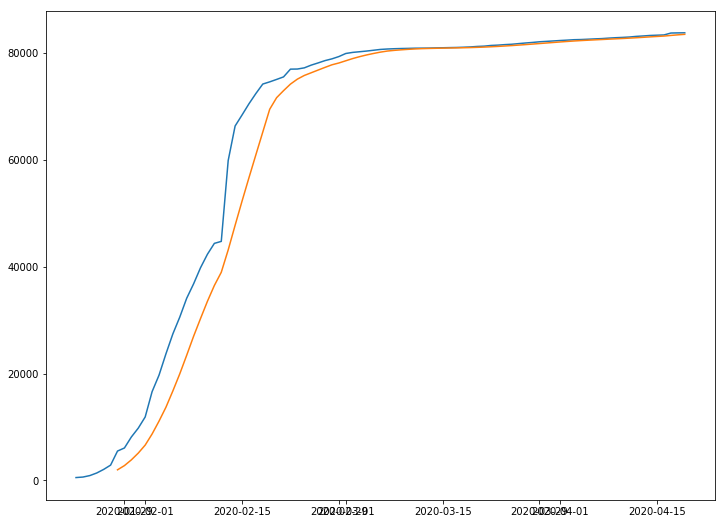

In [49]:
plt.figure(figsize=(12,9))
plt.plot(Chinadf['China'])
plt.plot(Chinadf['China'].rolling(7).mean());

___
## Canada Curve

In [50]:
CanadaData = df[df['Country/Region'] == 'Canada'].drop(columns=['Province/State', 'Lat', 'Long', 'Country/Region']).sum()
CanadaData

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        1
           ...  
4/15/20    28208
4/16/20    30808
4/17/20    32813
4/18/20    34355
4/19/20    35632
Length: 89, dtype: int64

In [52]:
Candf = pd.DataFrame(data=CanadaData, columns=['Canada'])
Candf['Date'] = pd.to_datetime(Candf.index)
Candf.set_index('Date', inplace=True)
Candf

Canada
Date              
2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       1
...            ...
2020-04-15   28208
2020-04-16   30808
2020-04-17   32813
2020-04-18   34355
2020-04-19   35632

[89 rows x 1 columns]

In [53]:
Candf.resample('w').mean()

Canada
Date                    
2020-01-26      0.200000
2020-02-02      2.714286
2020-02-09      5.571429
2020-02-16      7.000000
2020-02-23      8.428571
2020-03-01     14.714286
2020-03-08     42.000000
2020-03-15    146.285714
2020-03-22    862.714286
2020-03-29   4101.285714
2020-04-05  11134.285714
2020-04-12  20557.571429
2020-04-19  30647.000000

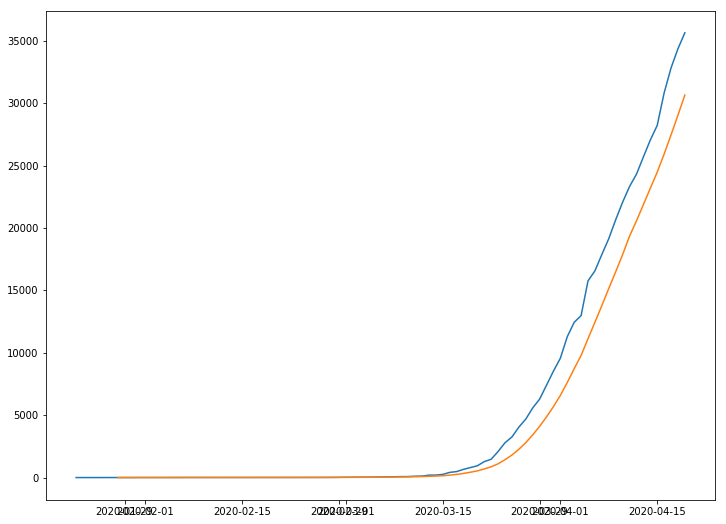

In [55]:
plt.figure(figsize=(12,9))
plt.plot(Candf['Canada'])
plt.plot(Candf['Canada'].rolling(7).mean());

___
## Italy Curve

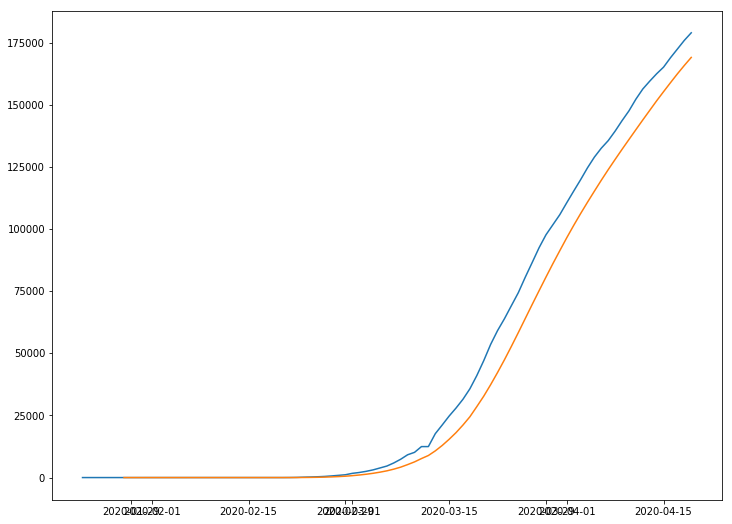

In [67]:
ItalyData = df[df['Country/Region'] == 'Italy'].drop(columns=['Province/State', 'Lat', 'Long', 'Country/Region']).sum()

Italydf = pd.DataFrame(data=ItalyData, columns=['Italy'])
Italydf['Date'] = pd.to_datetime(Italydf.index)
Italydf.set_index('Date', inplace=True)

plt.figure(figsize=(12,9))
plt.plot(Italydf['Italy'])
plt.plot(Italydf['Italy'].rolling(7).mean());

___
## All Countries

/Users/Creighton/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


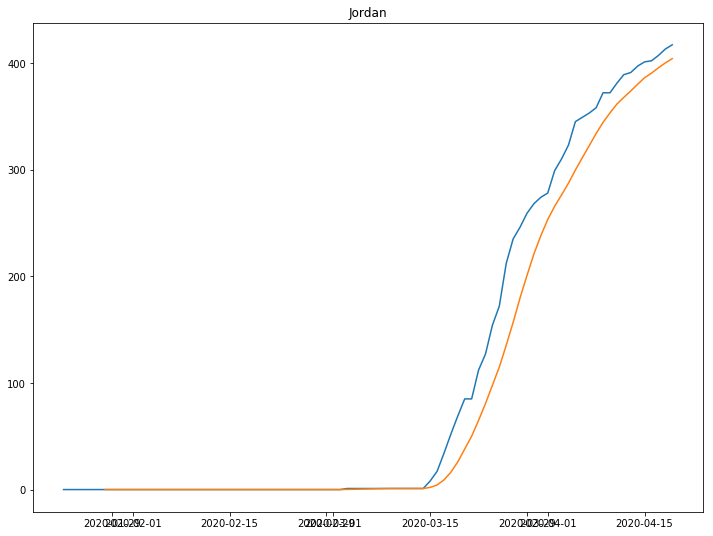

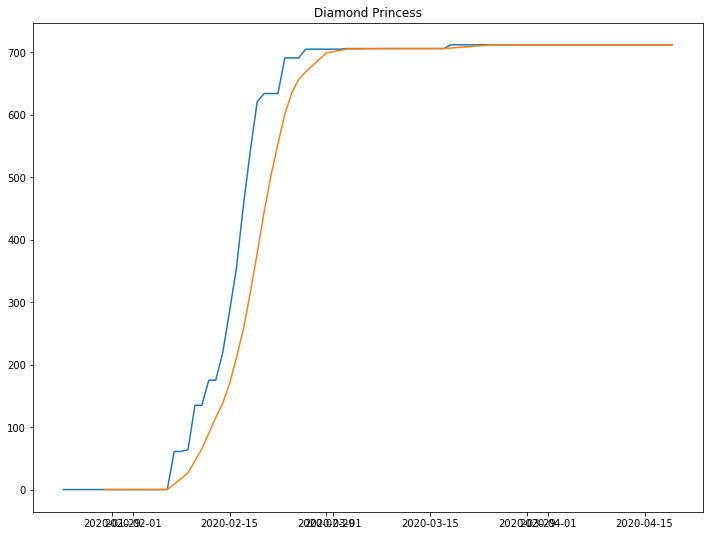

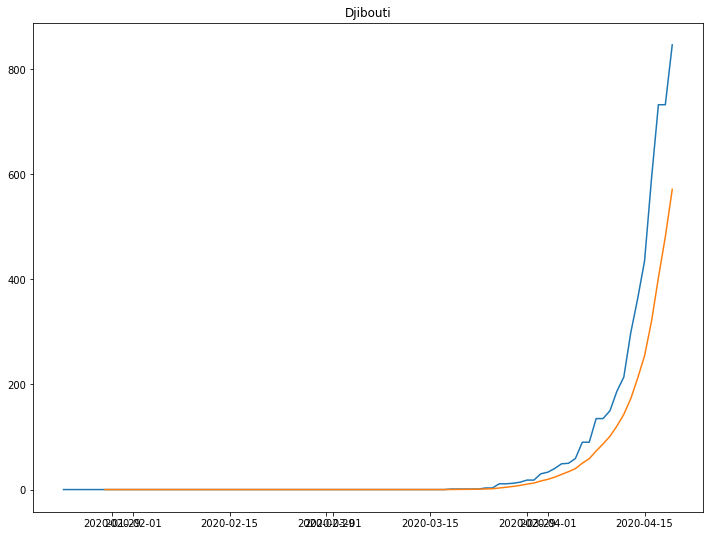

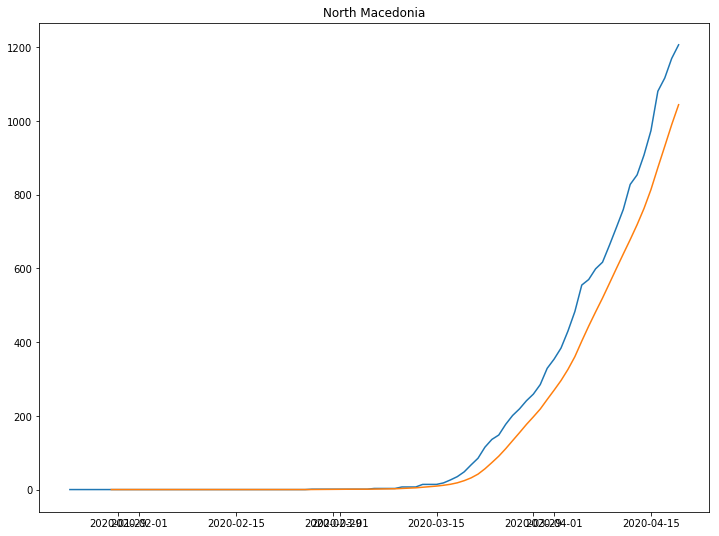

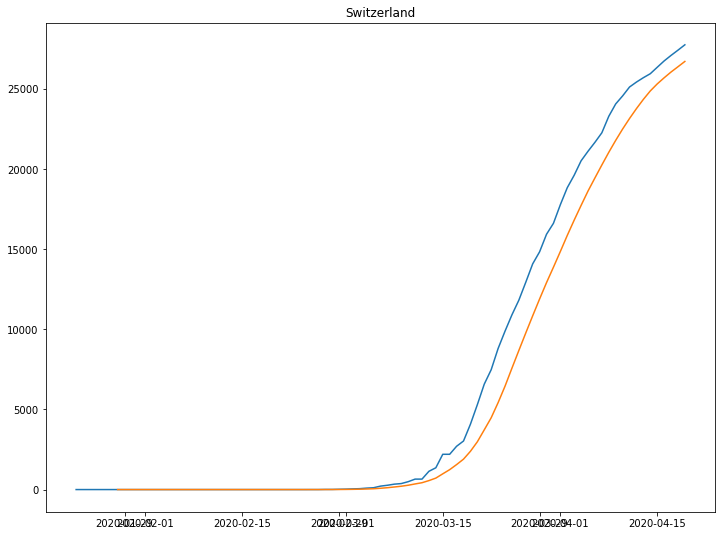

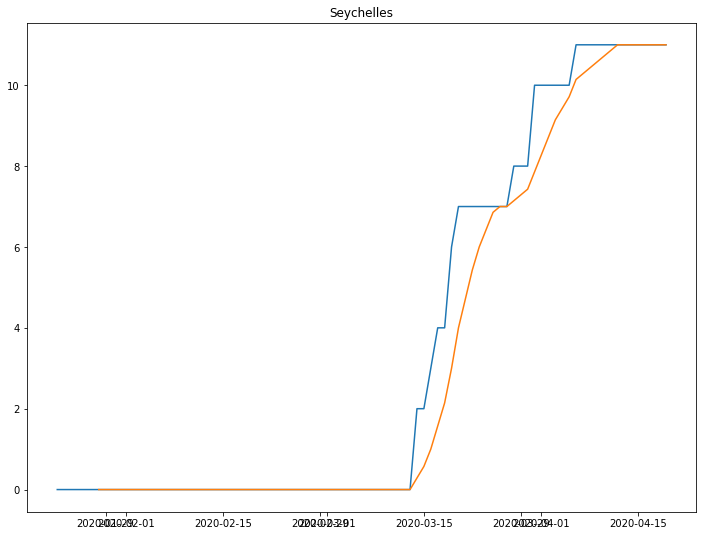

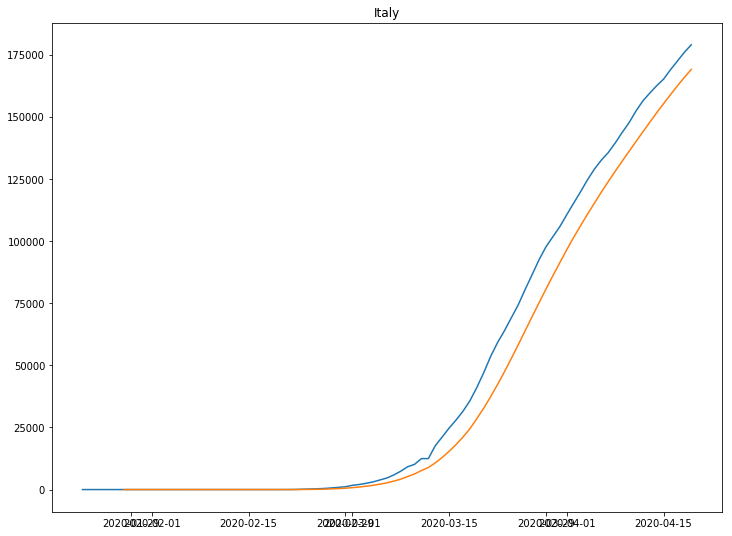

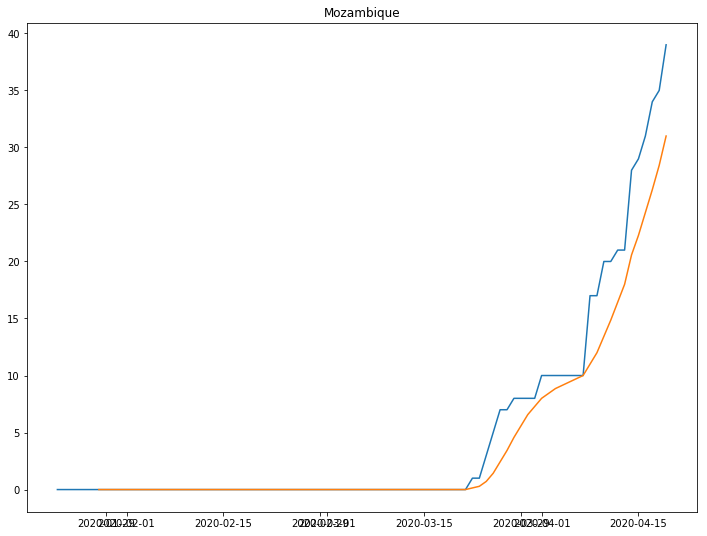

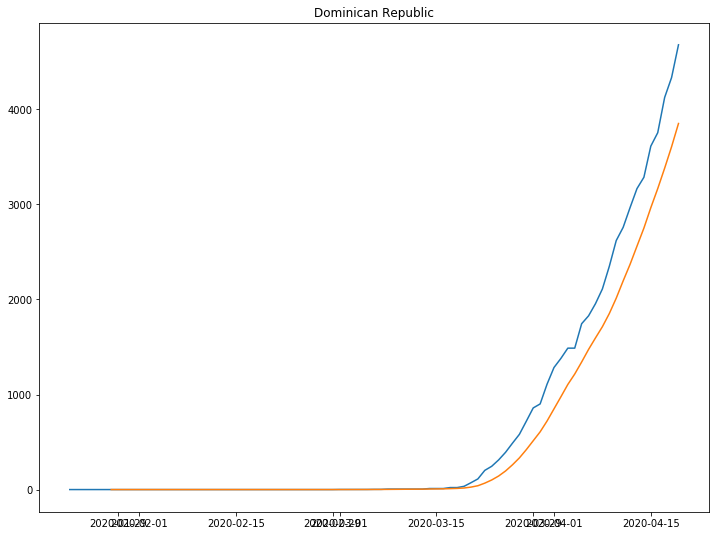

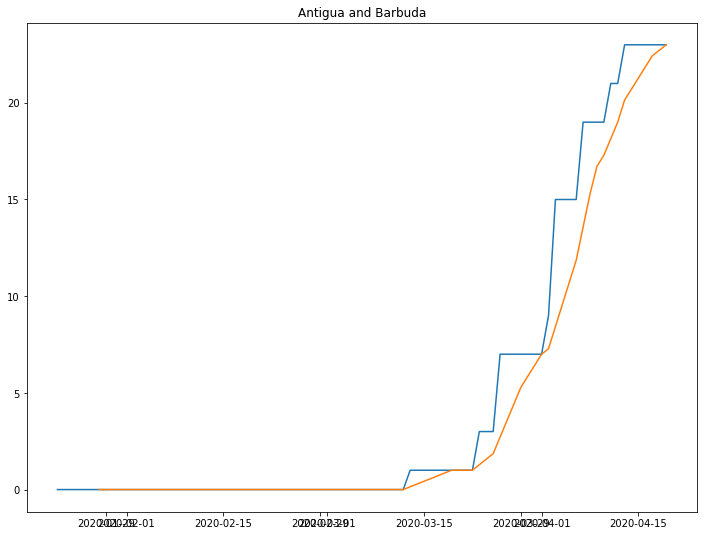

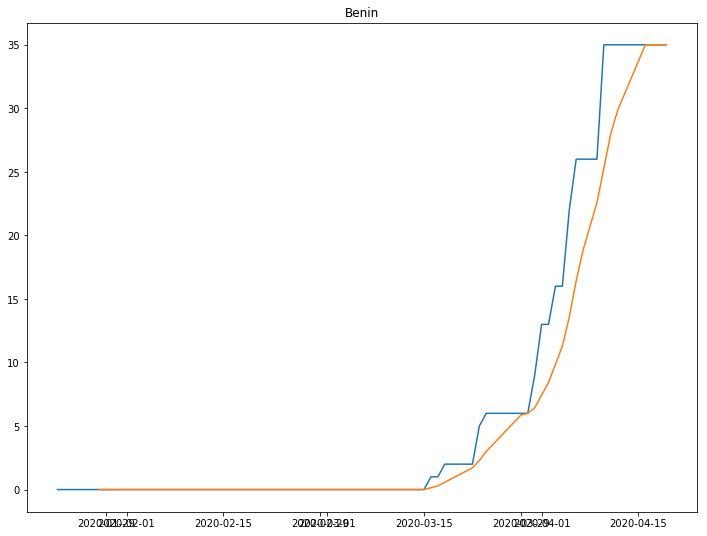

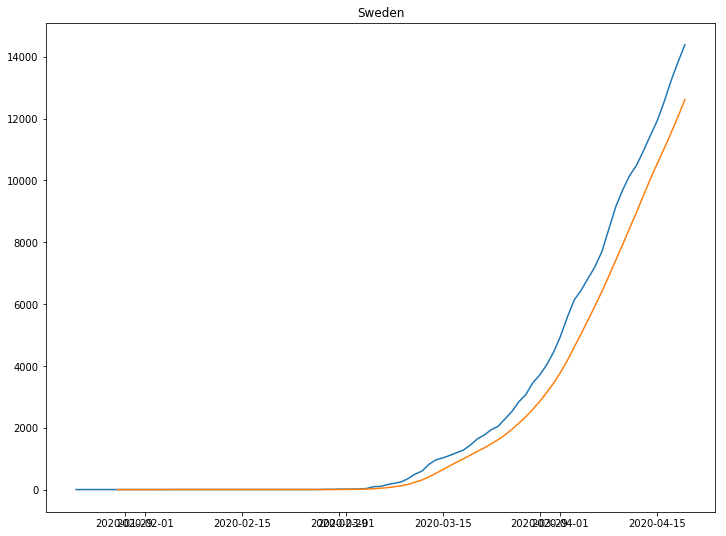

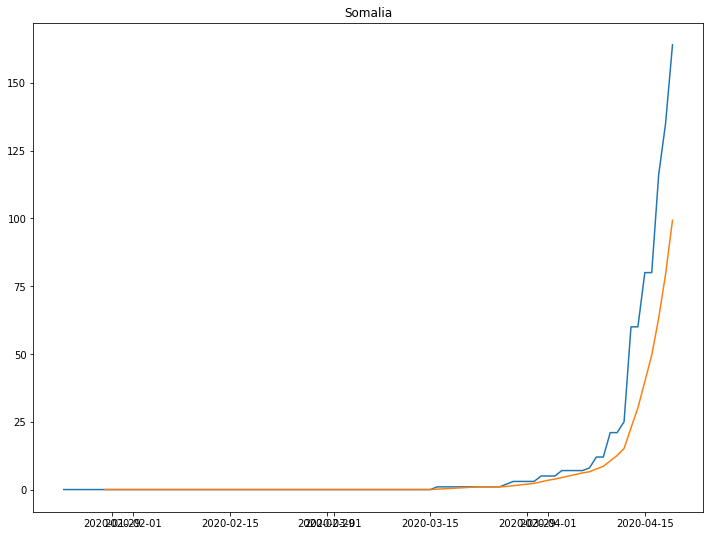

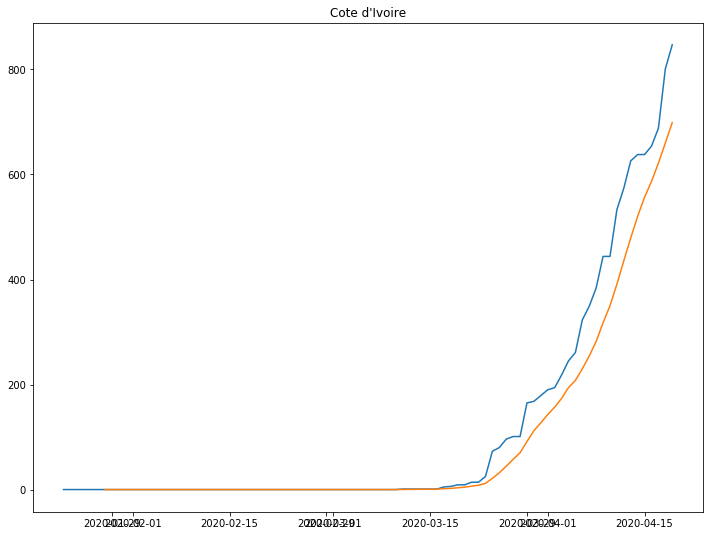

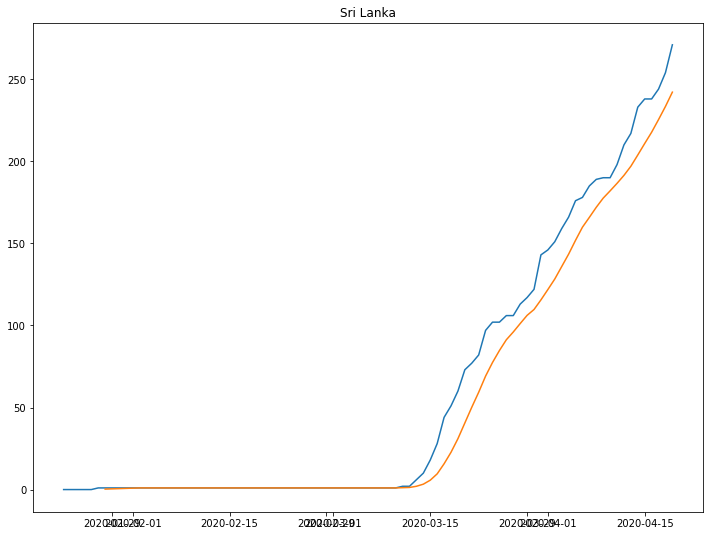

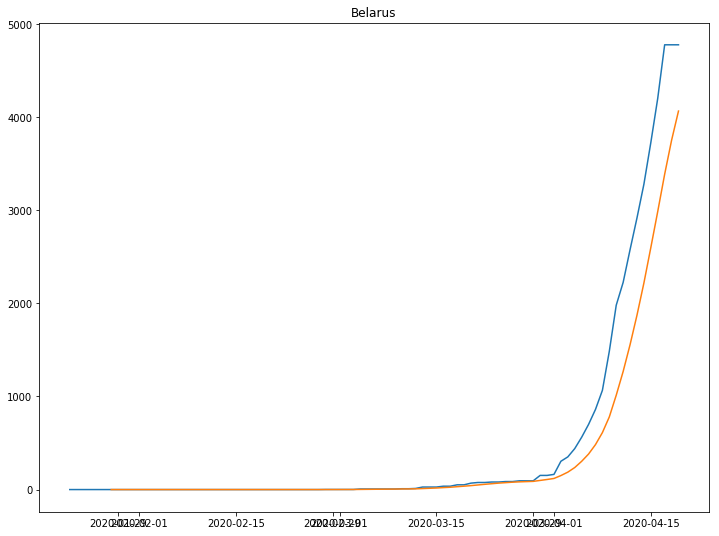

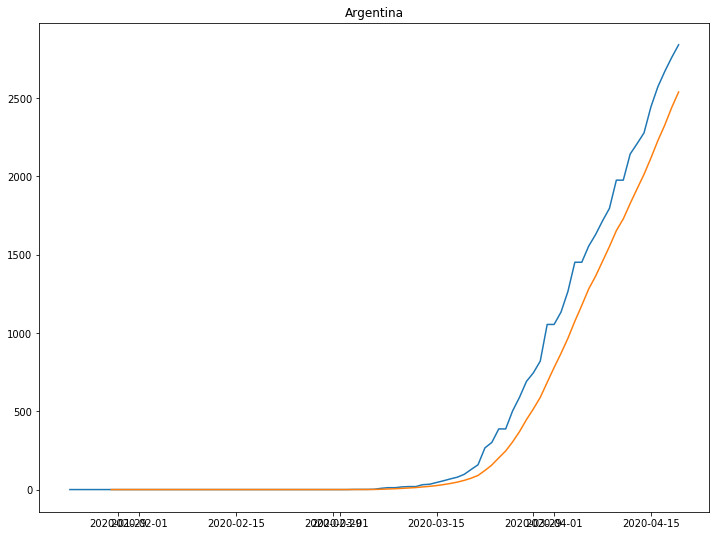

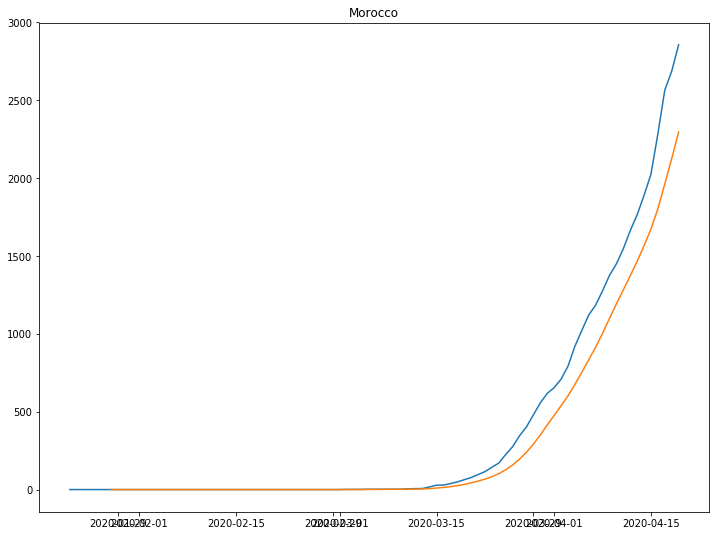

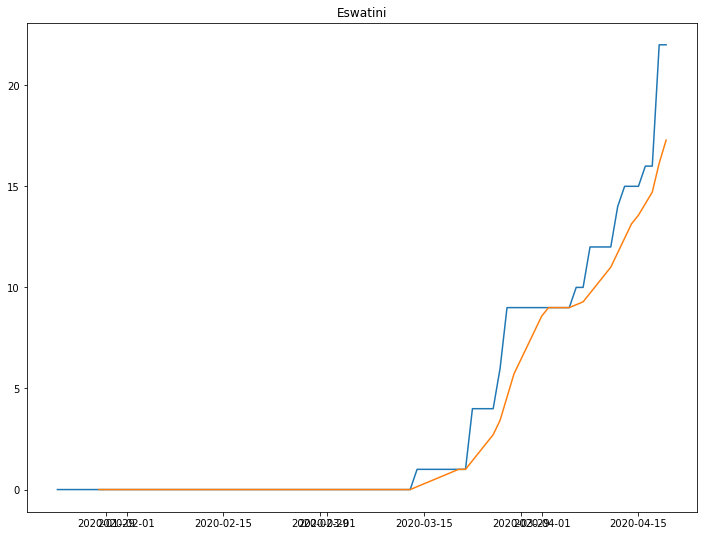

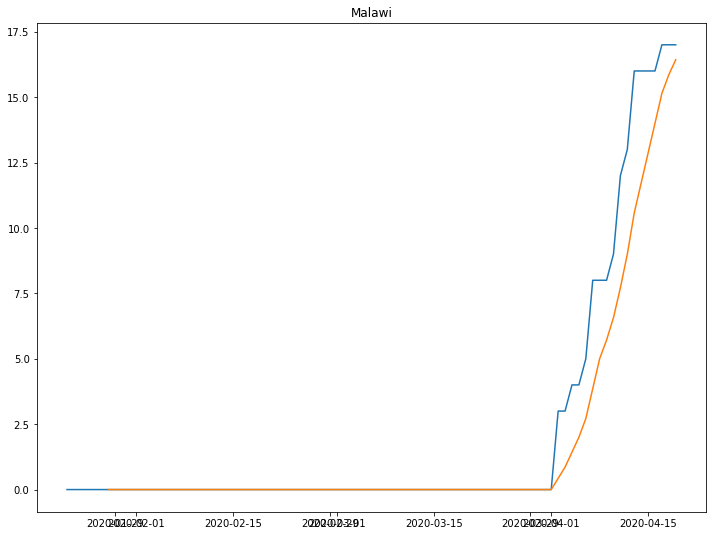

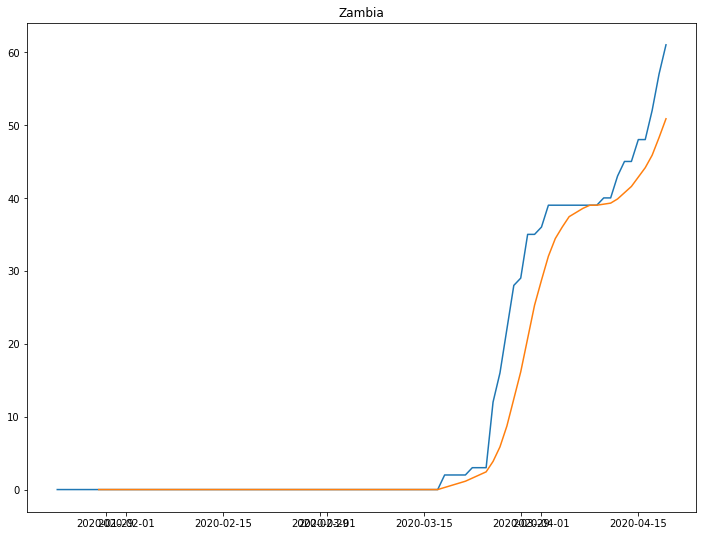

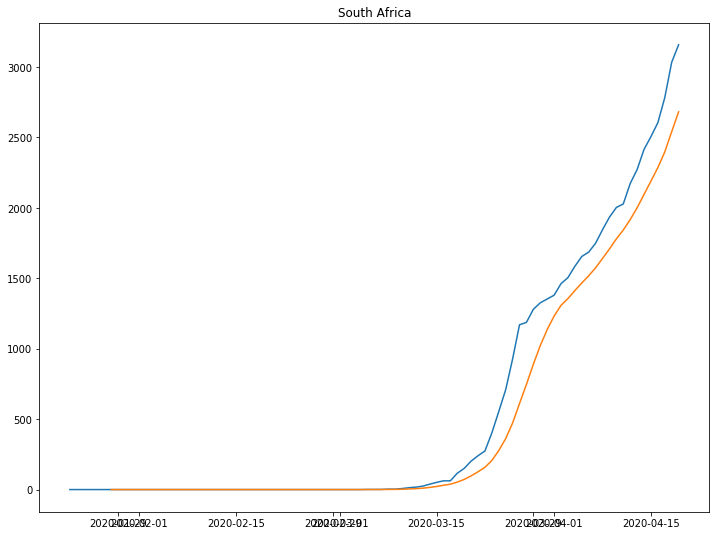

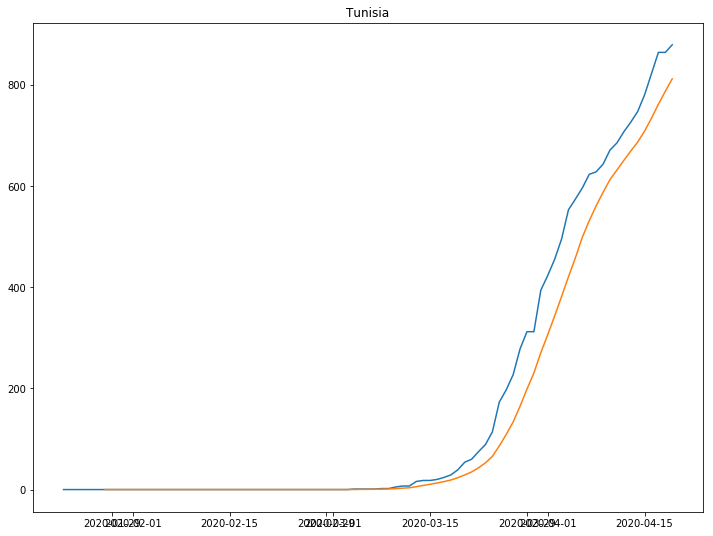

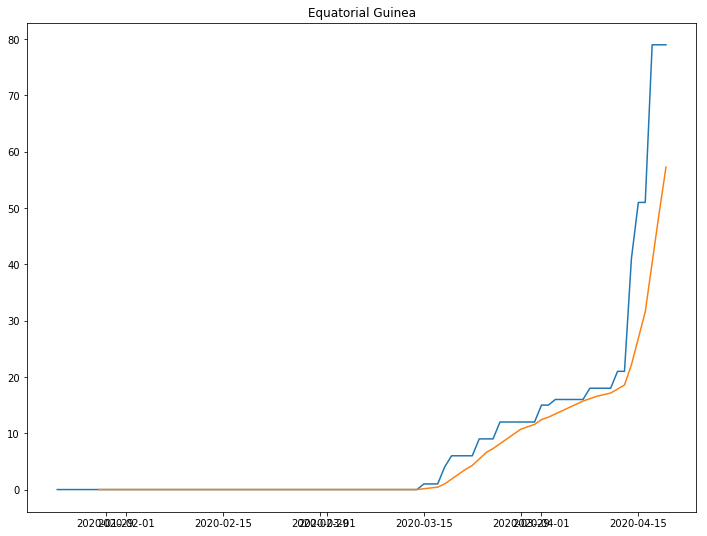

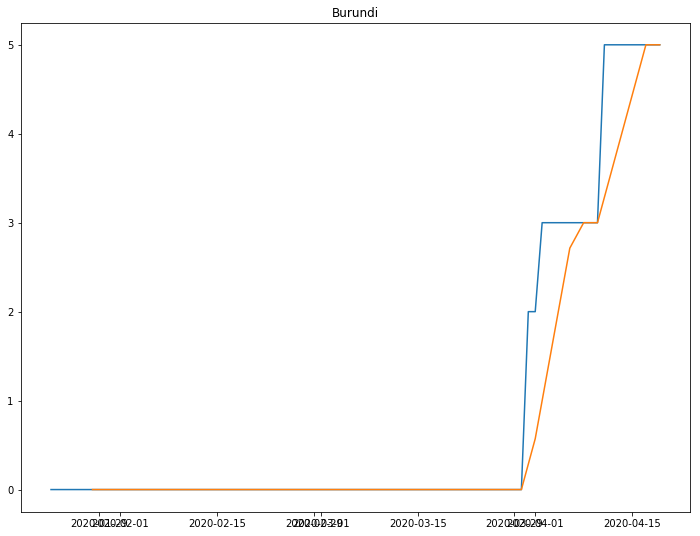

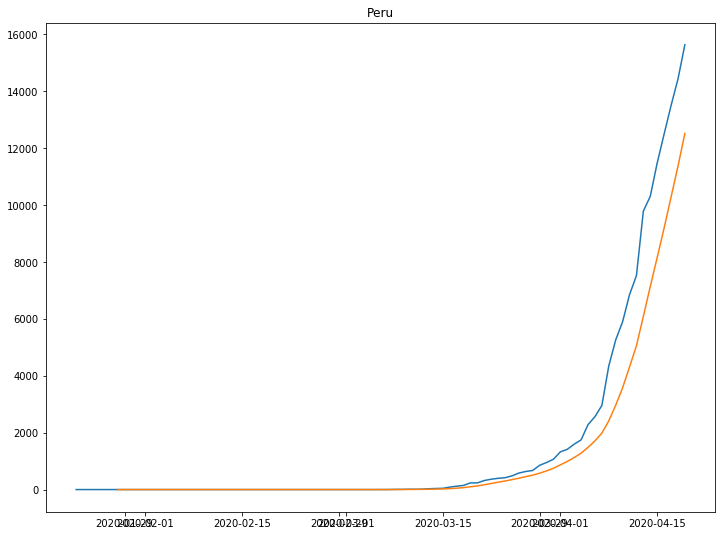

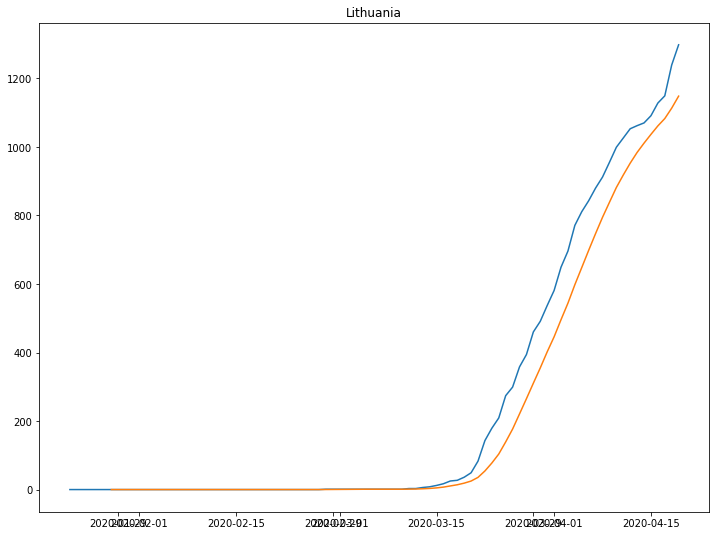

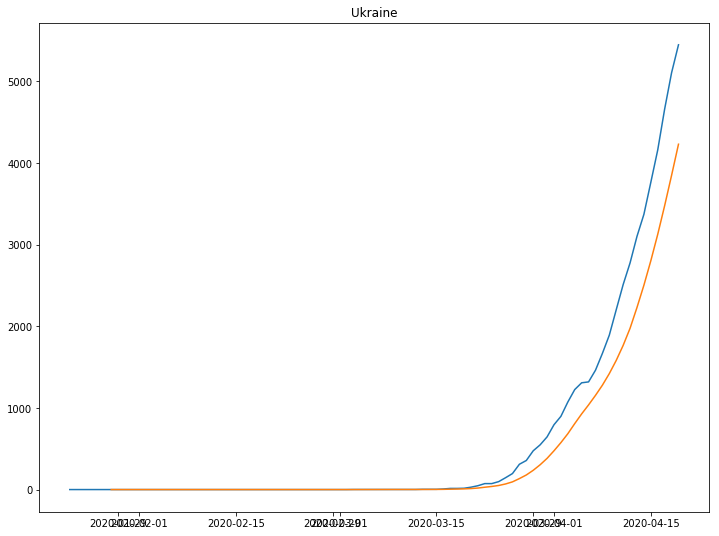

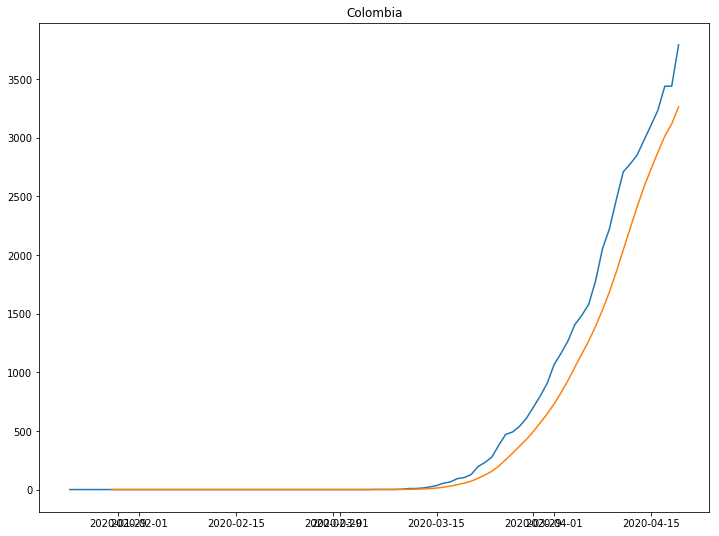

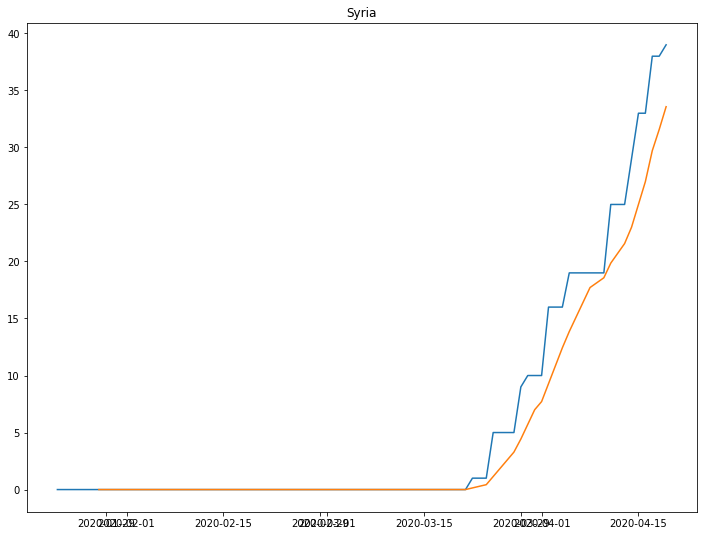

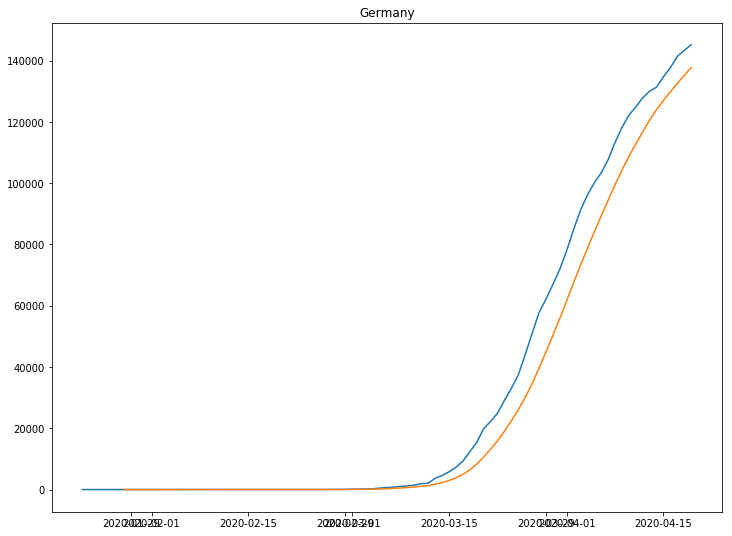

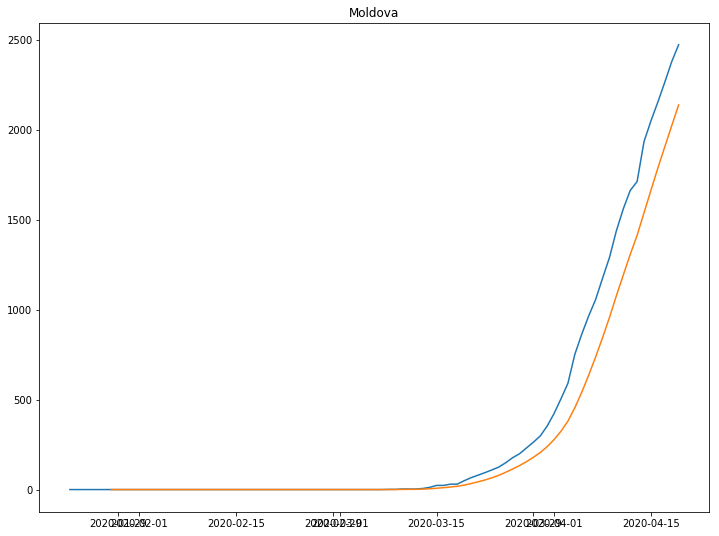

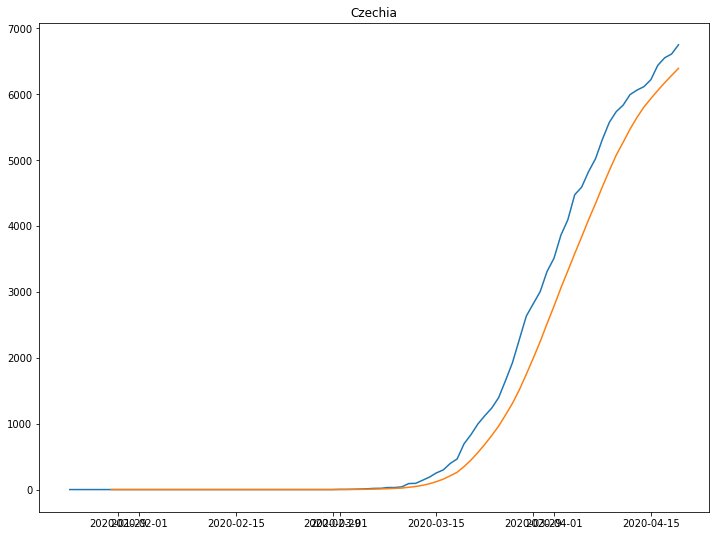

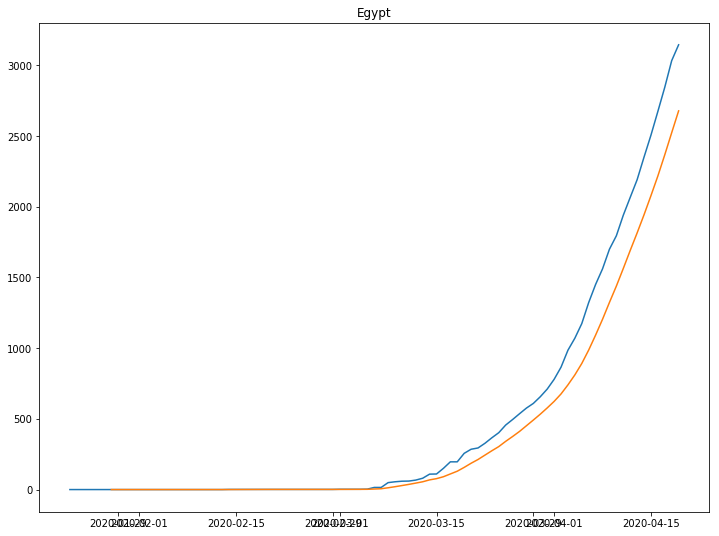

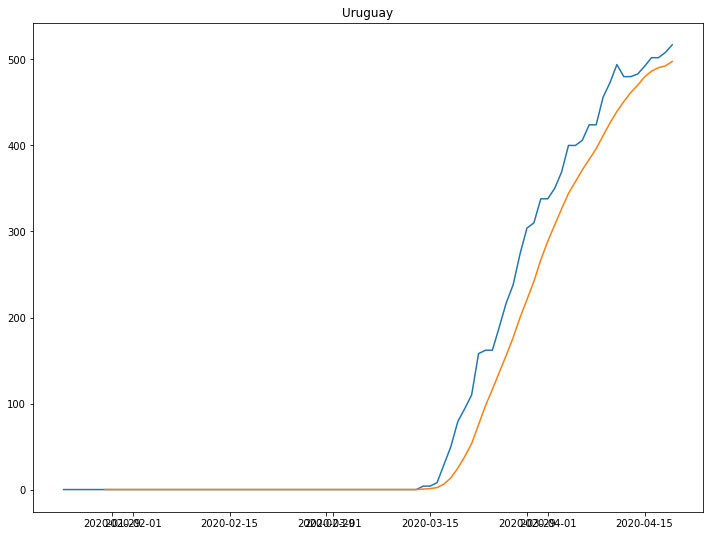

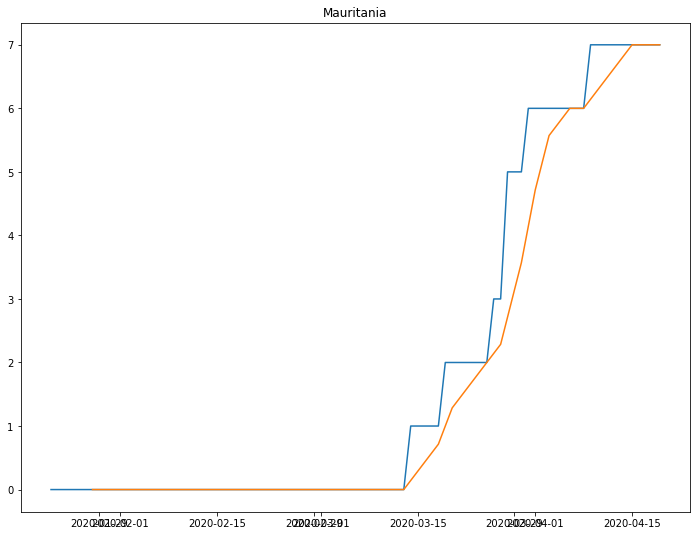

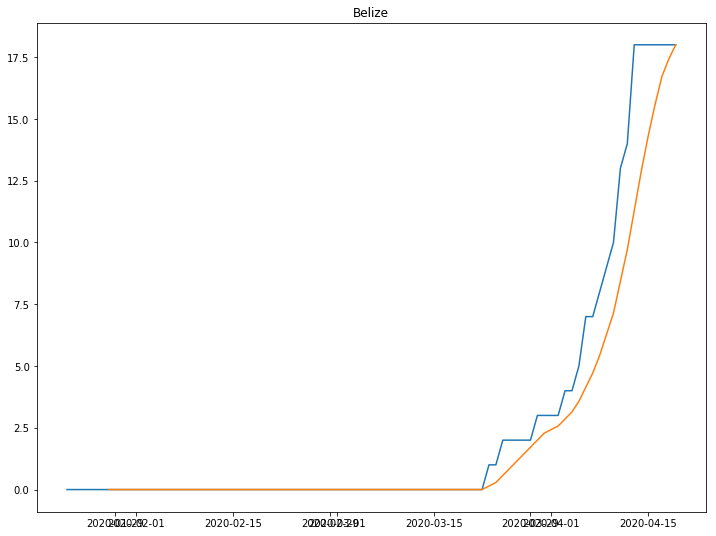

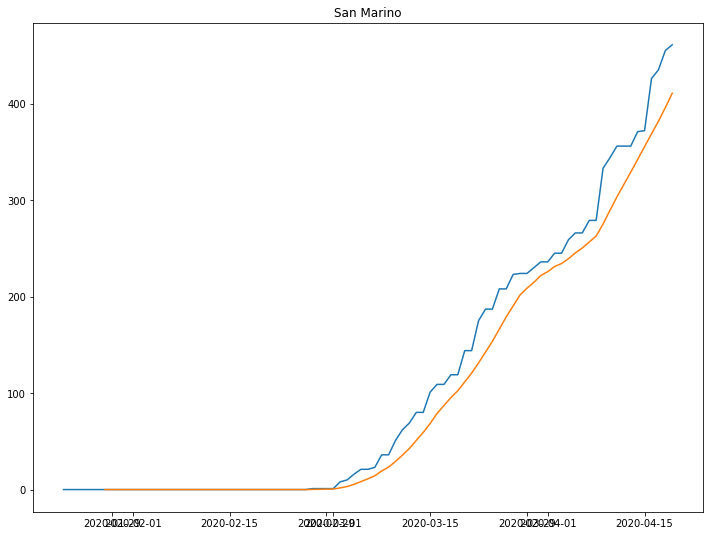

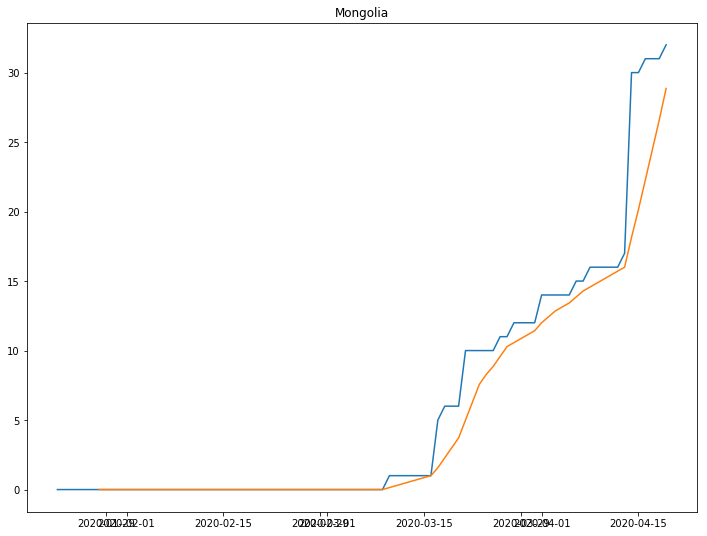

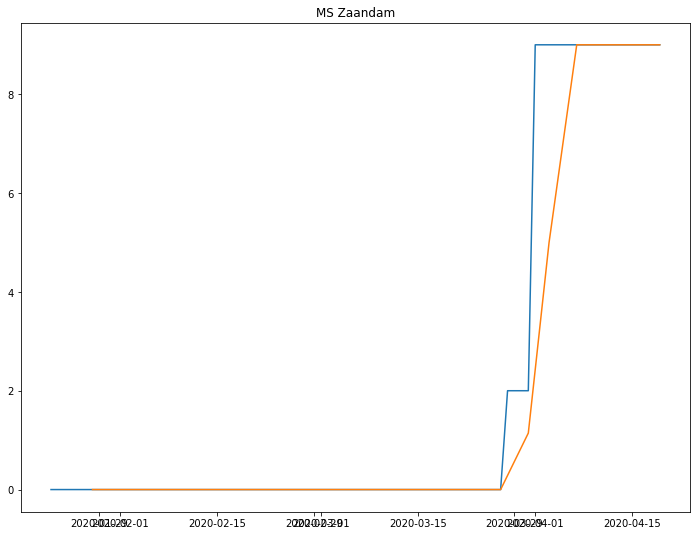

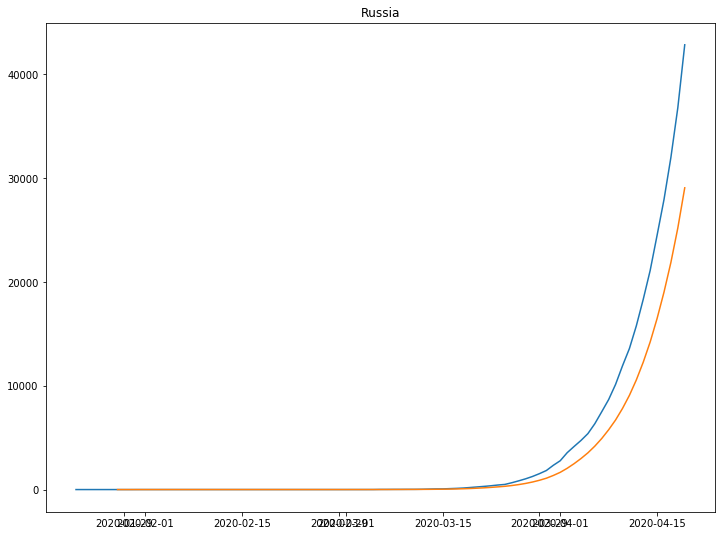

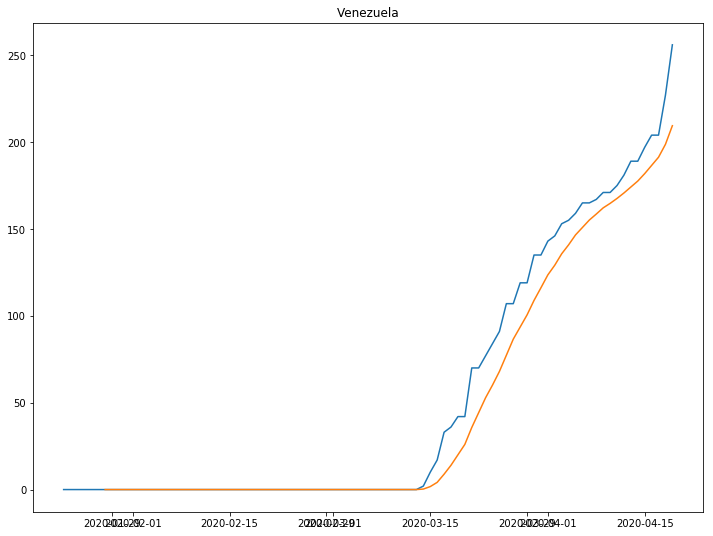

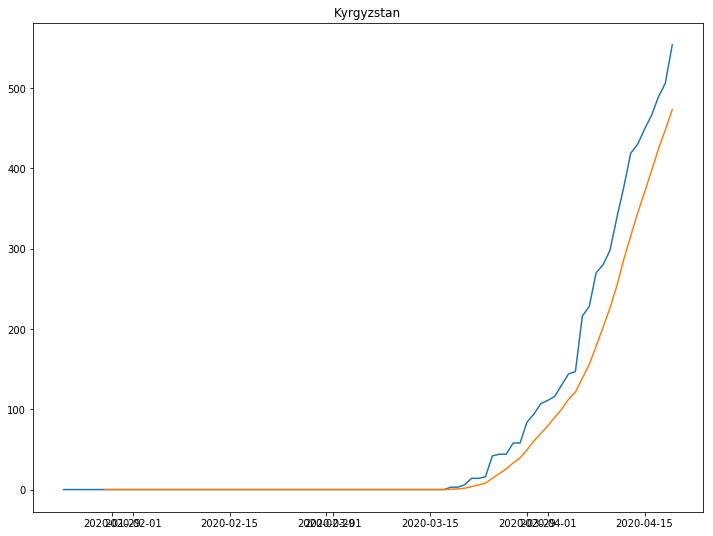

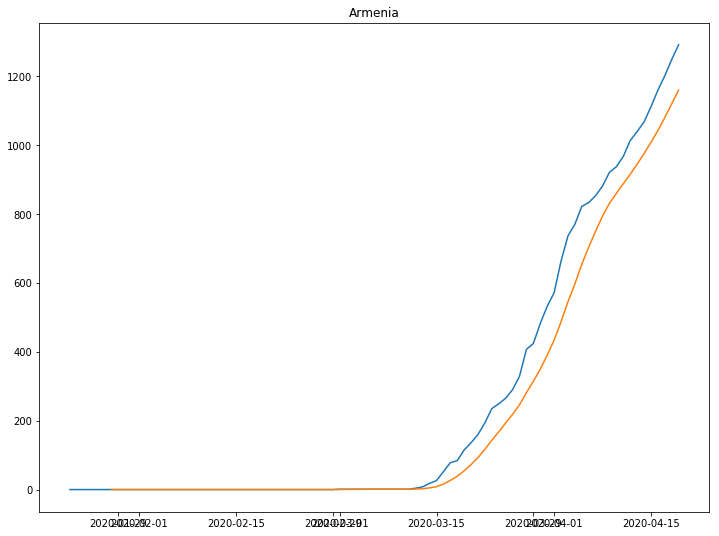

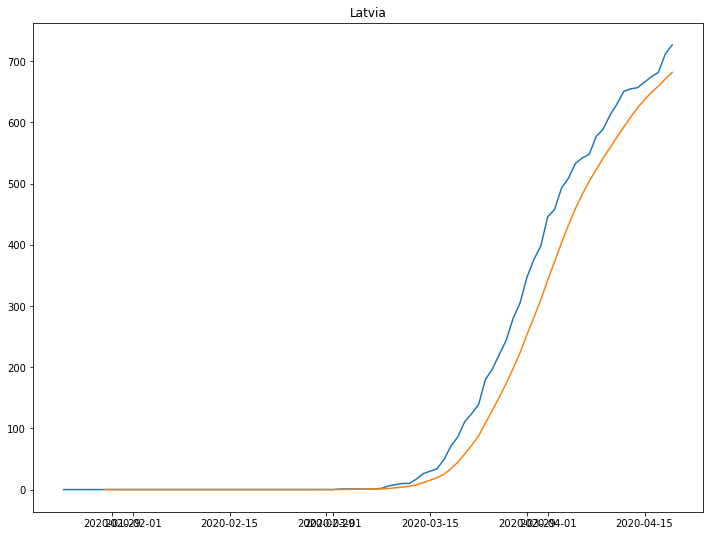

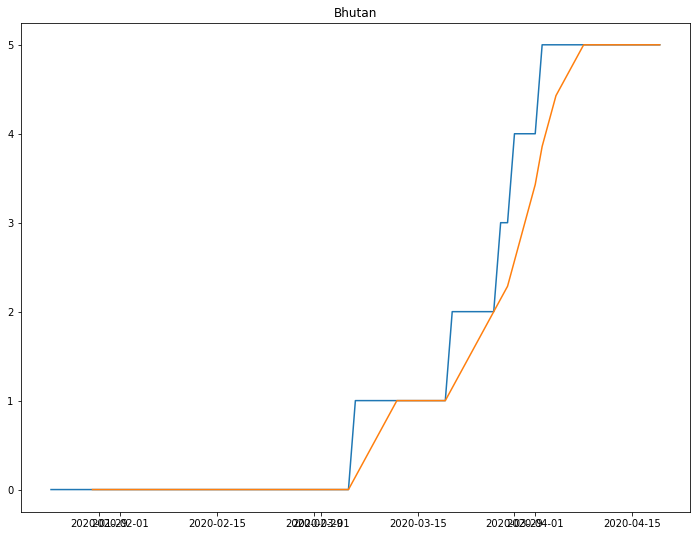

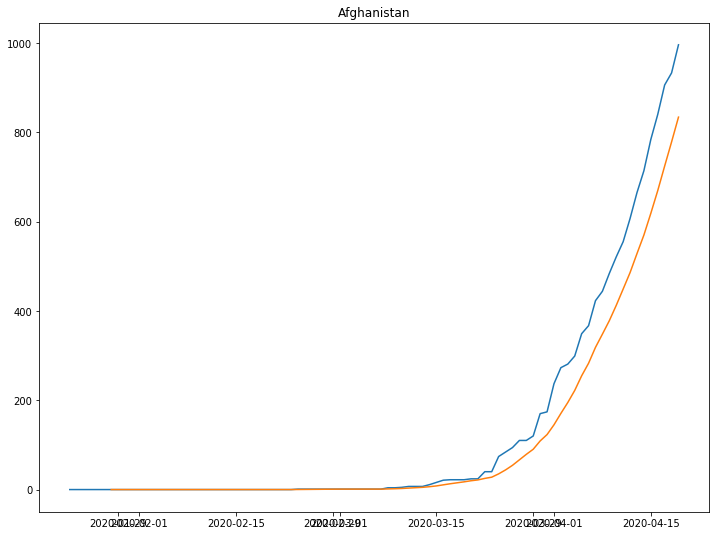

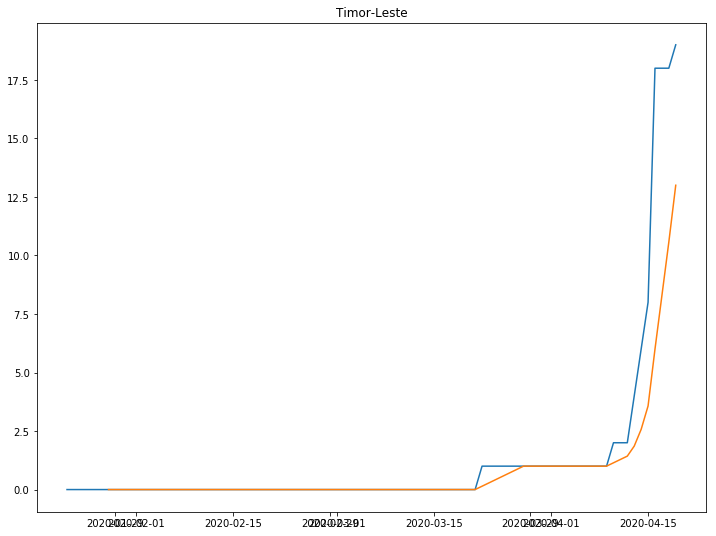

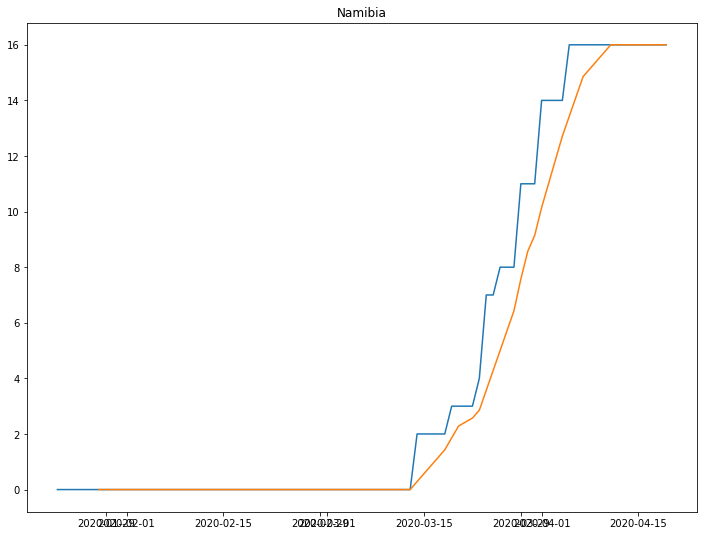

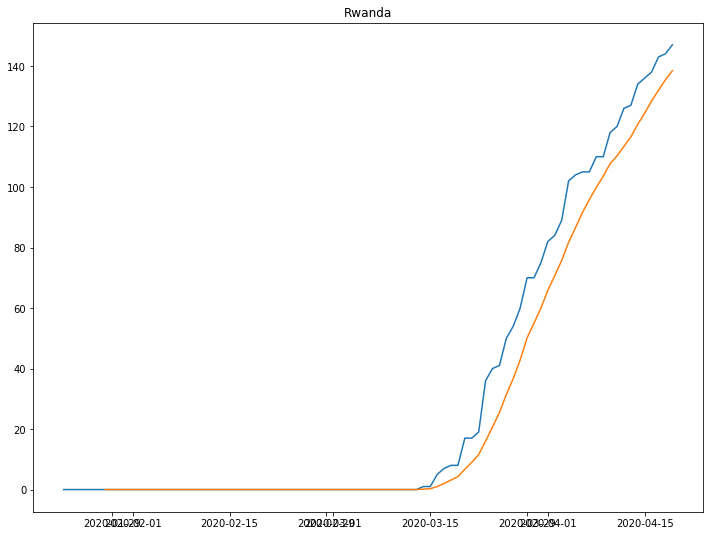

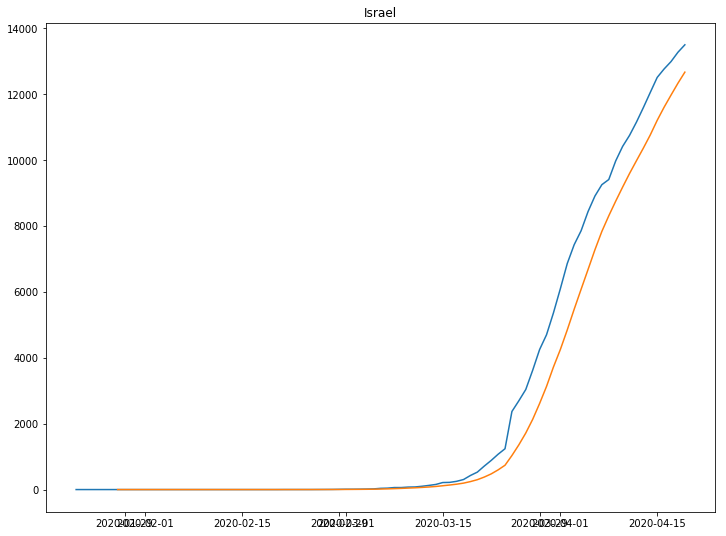

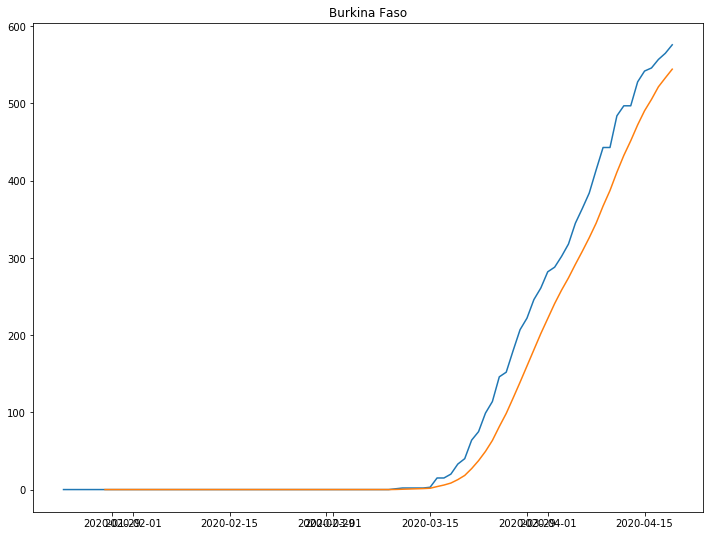

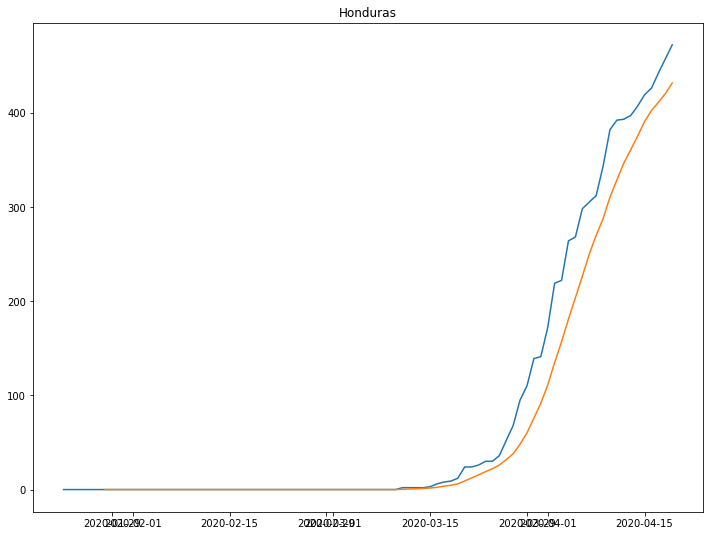

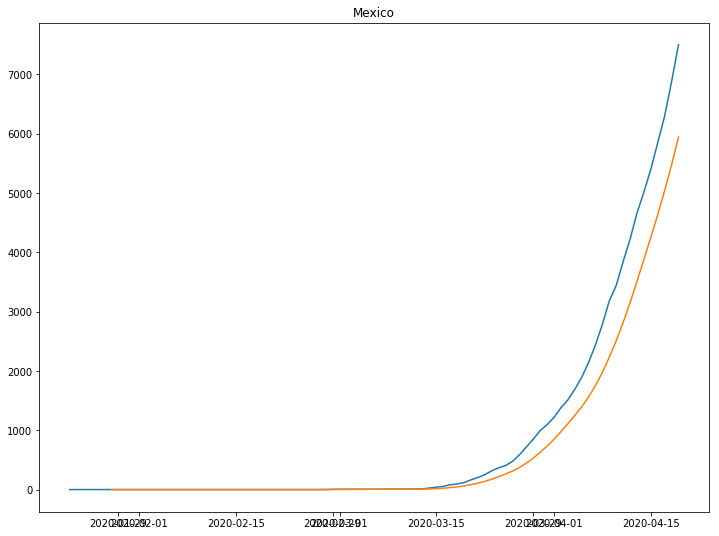

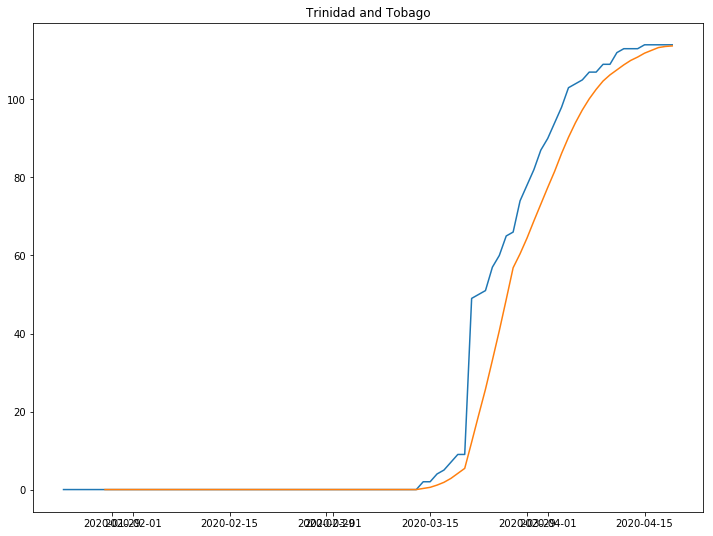

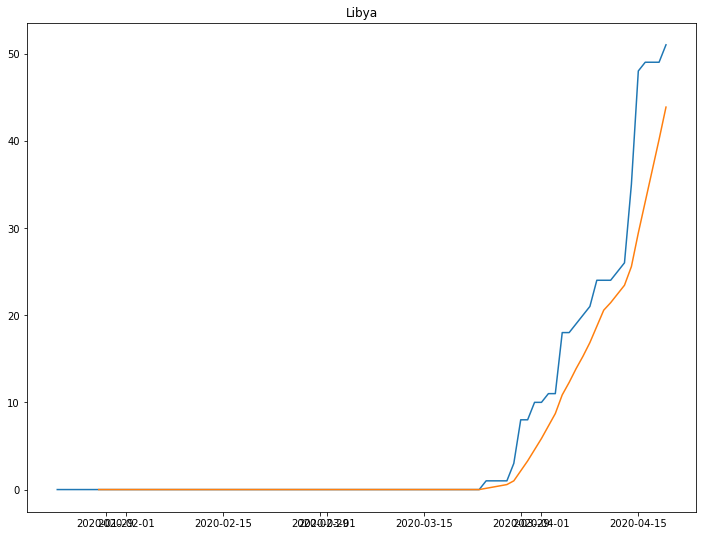

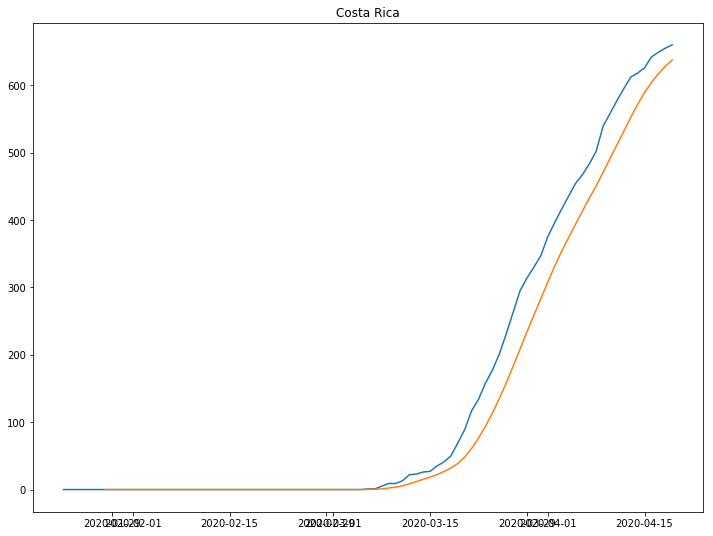

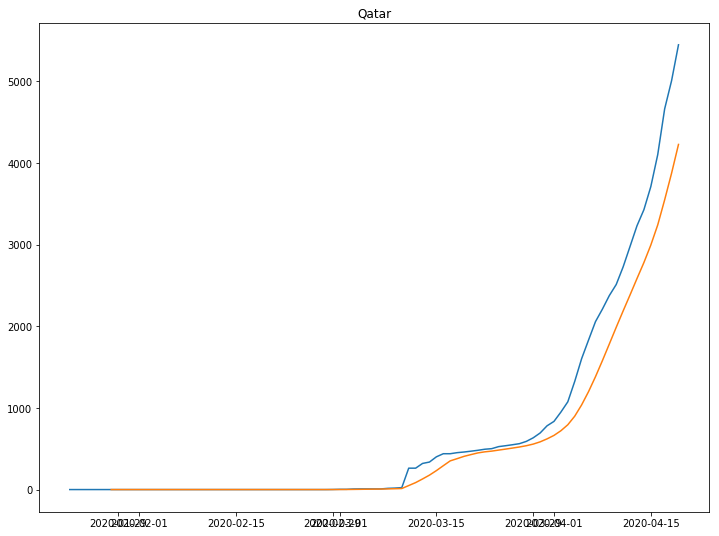

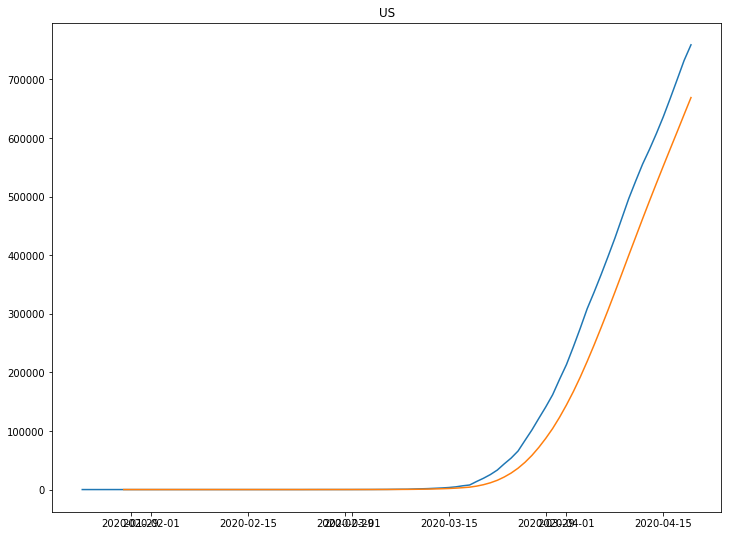

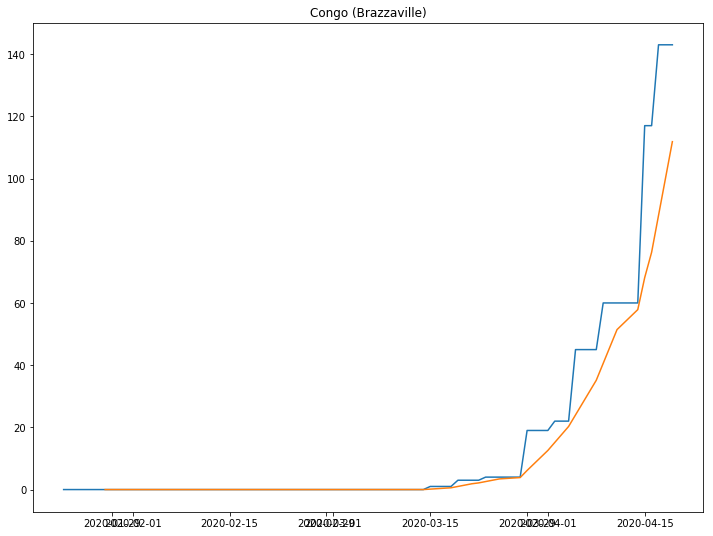

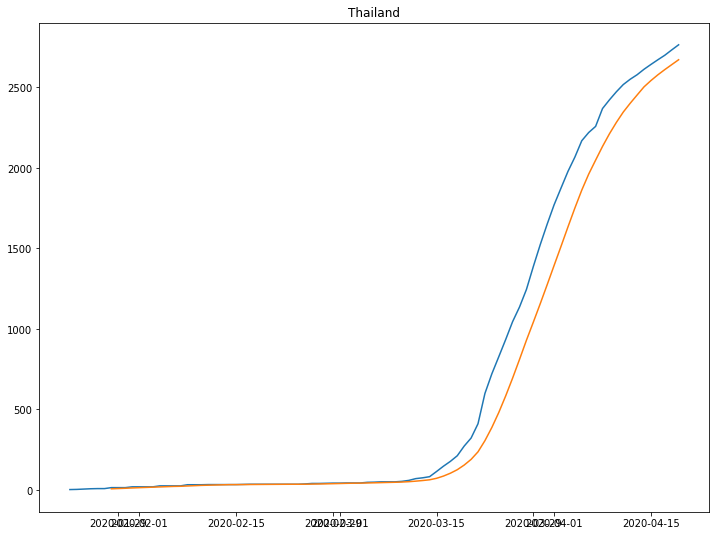

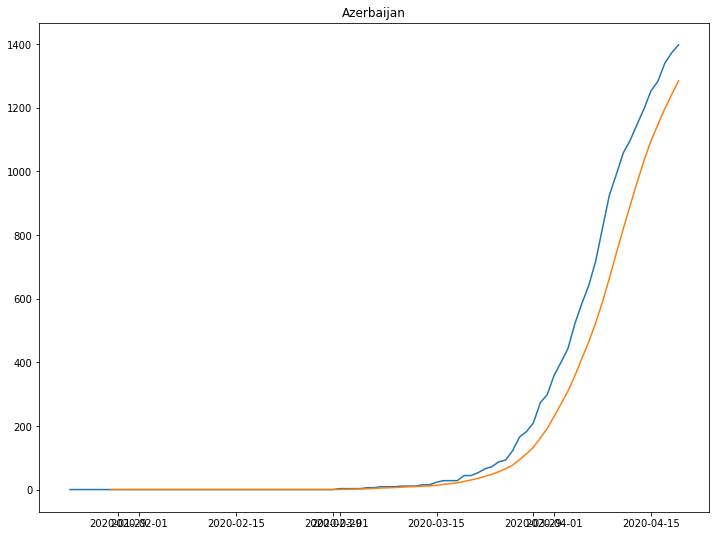

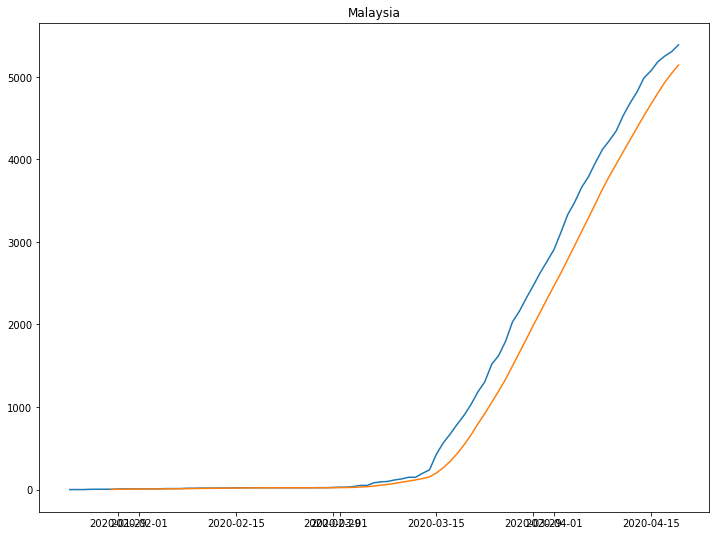

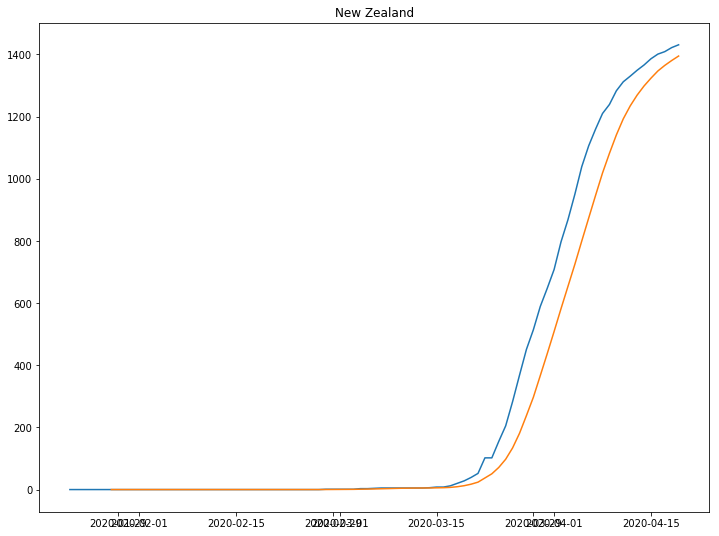

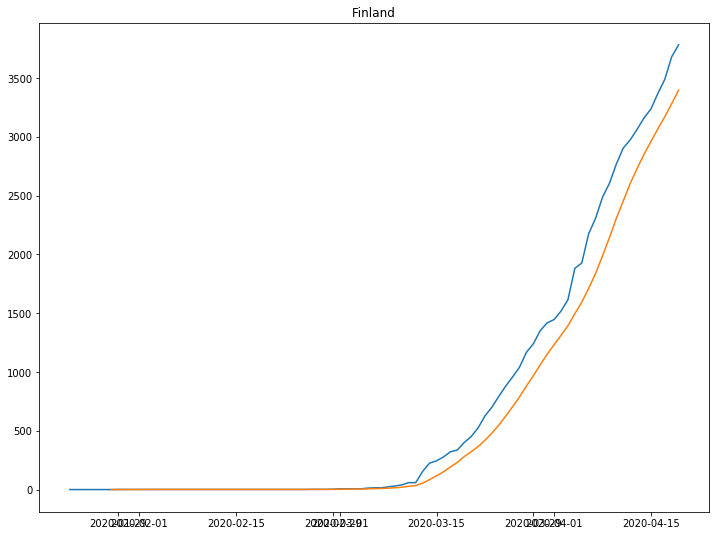

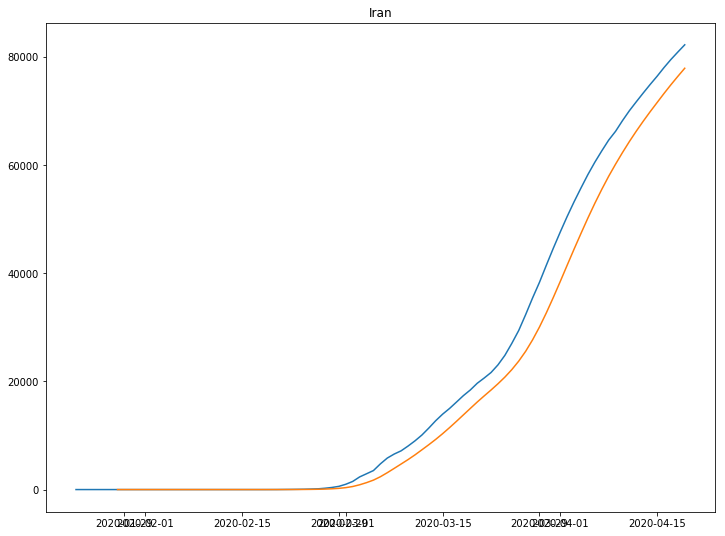

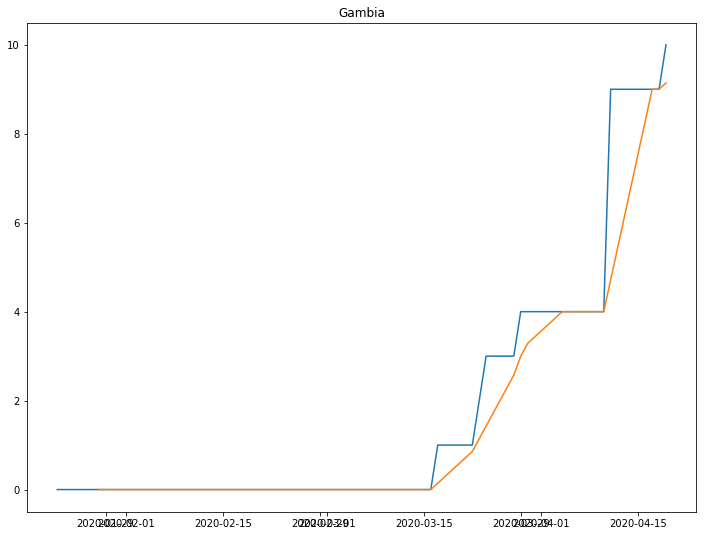

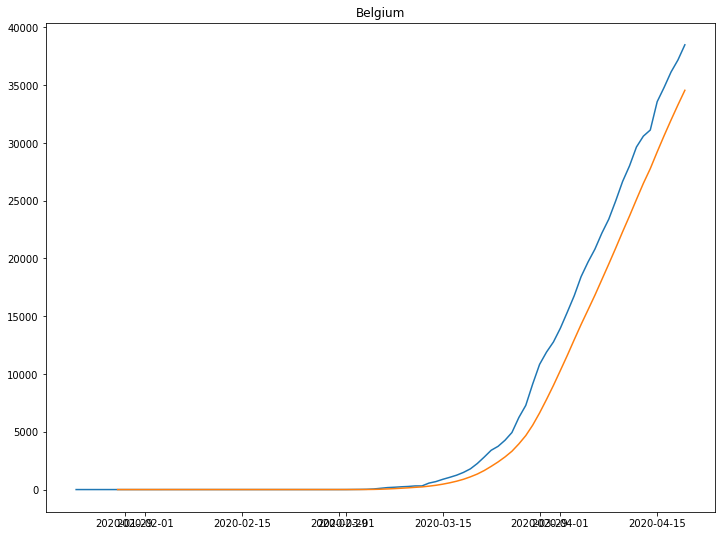

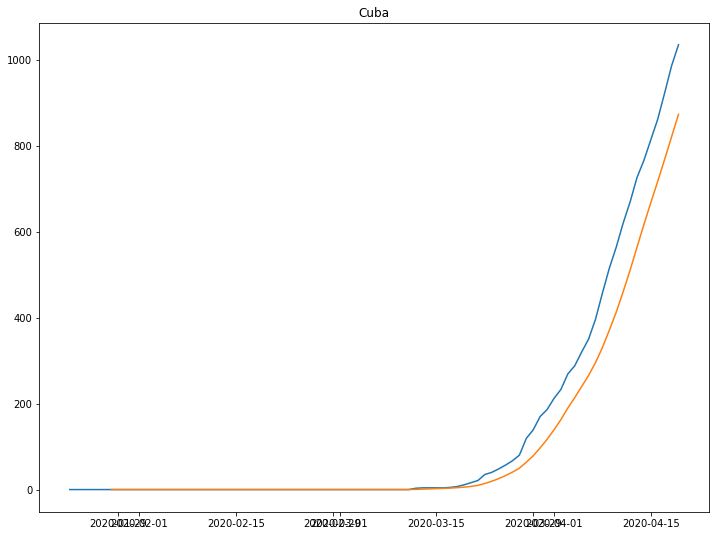

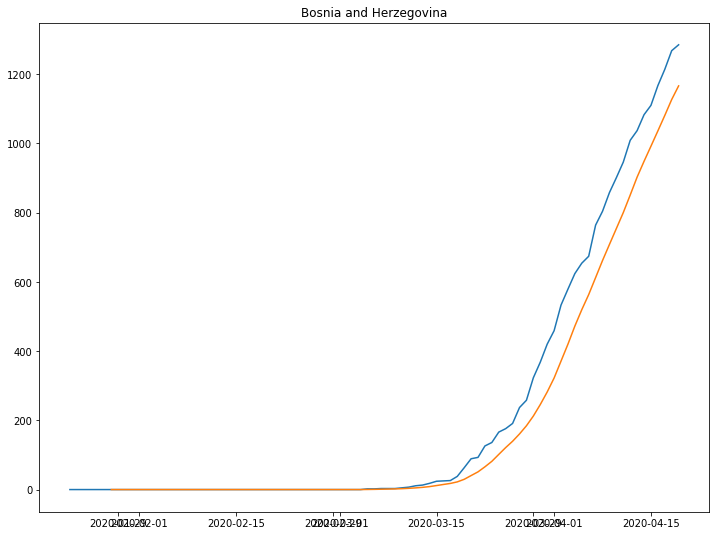

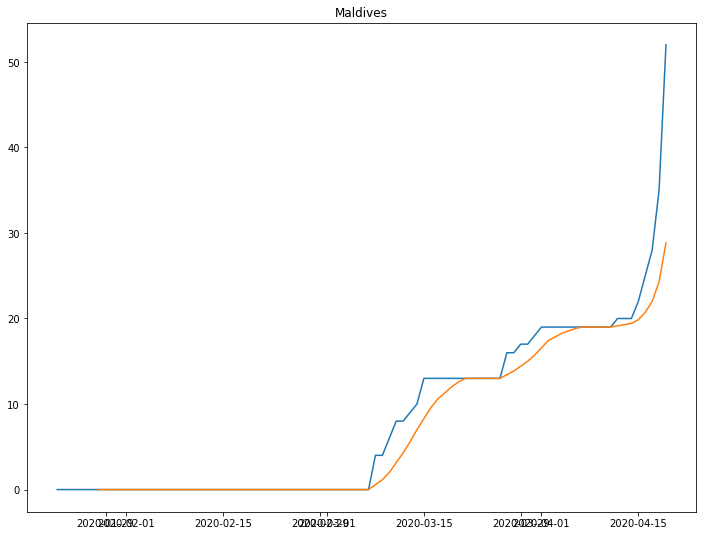

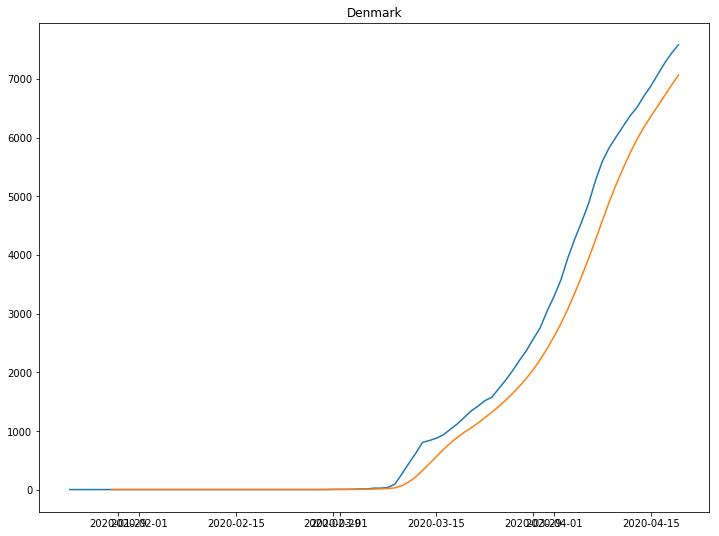

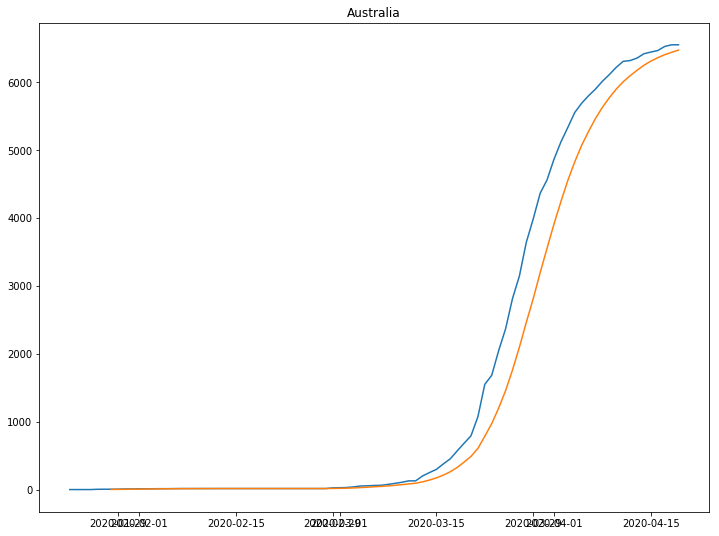

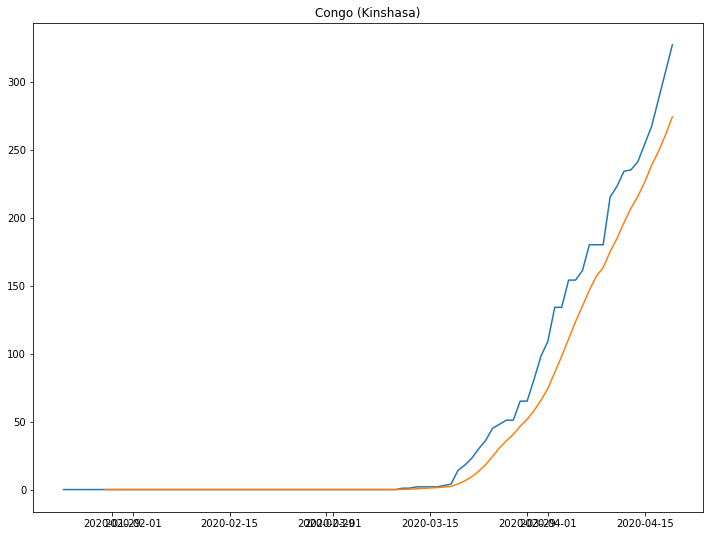

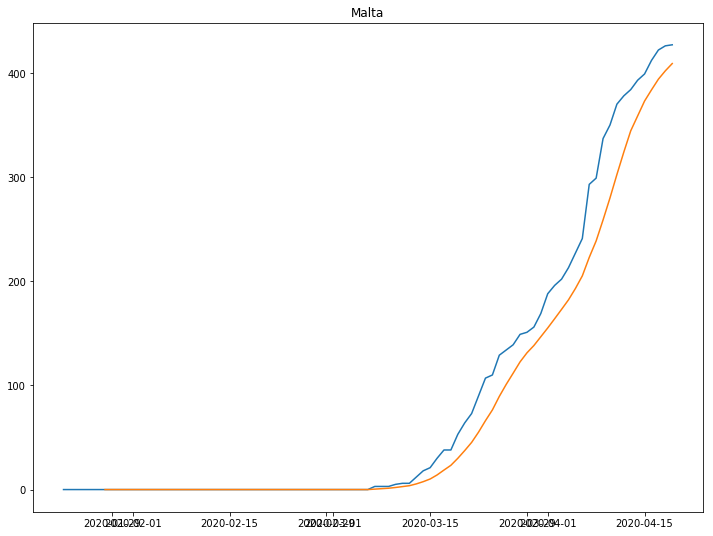

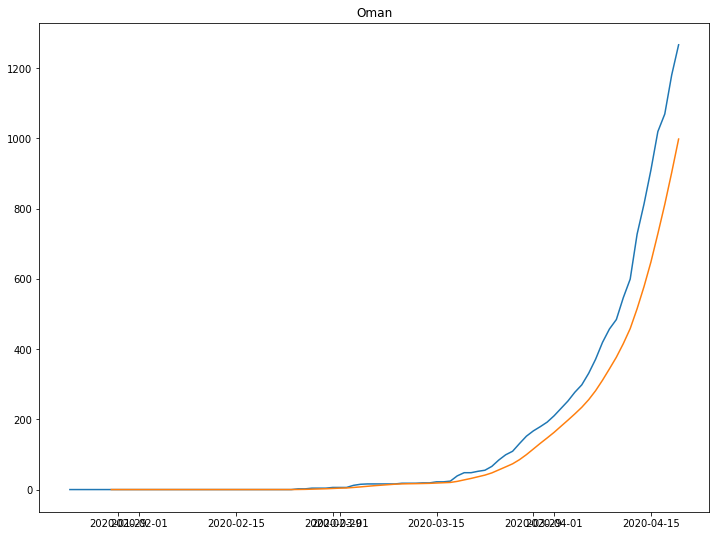

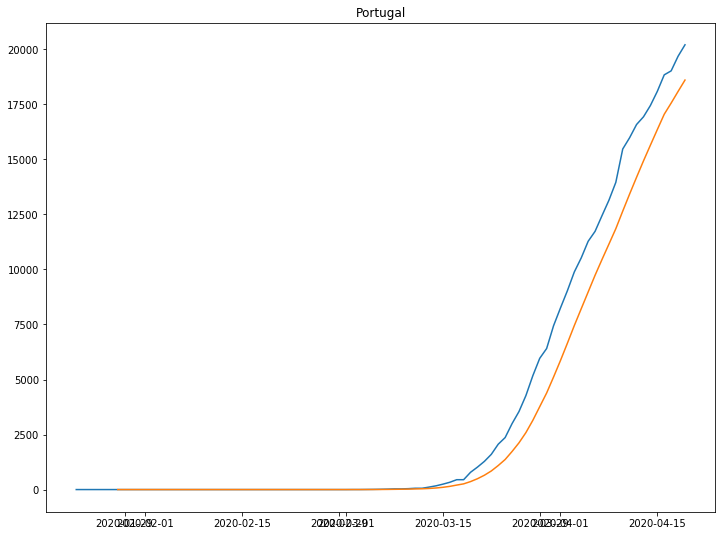

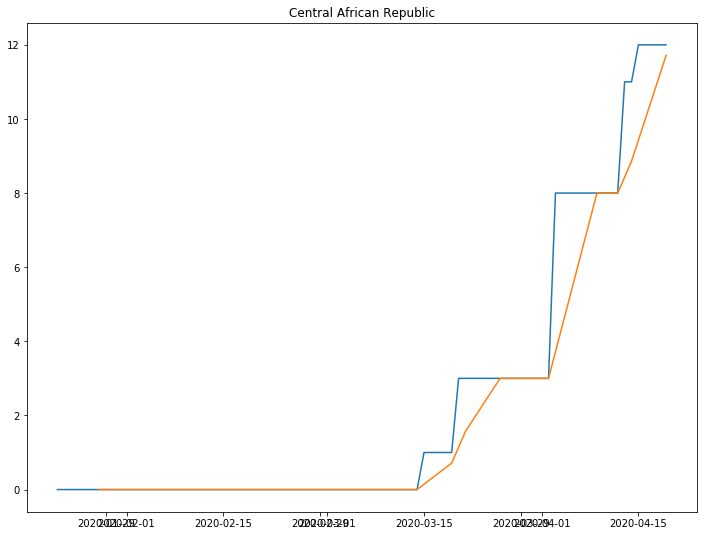

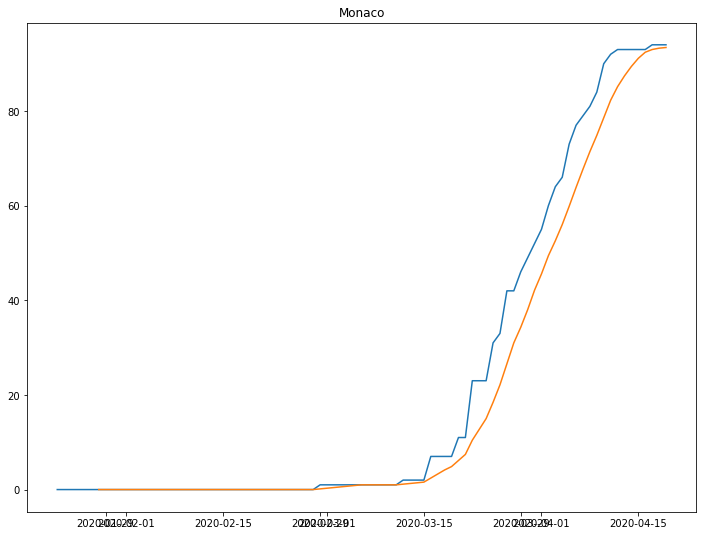

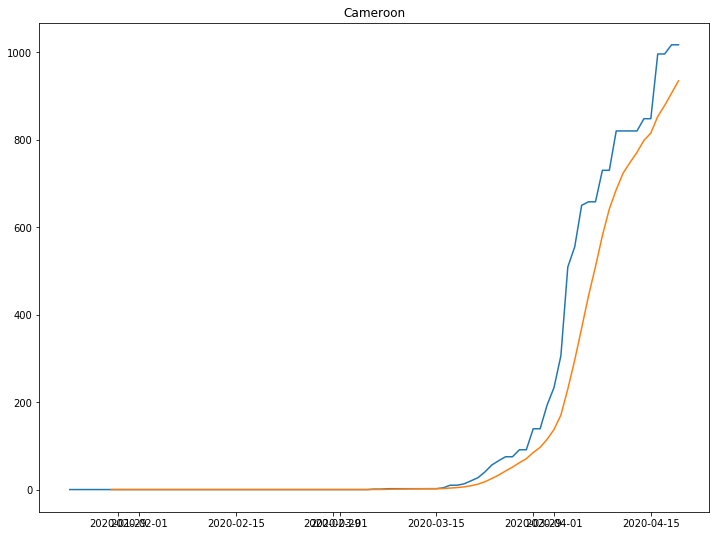

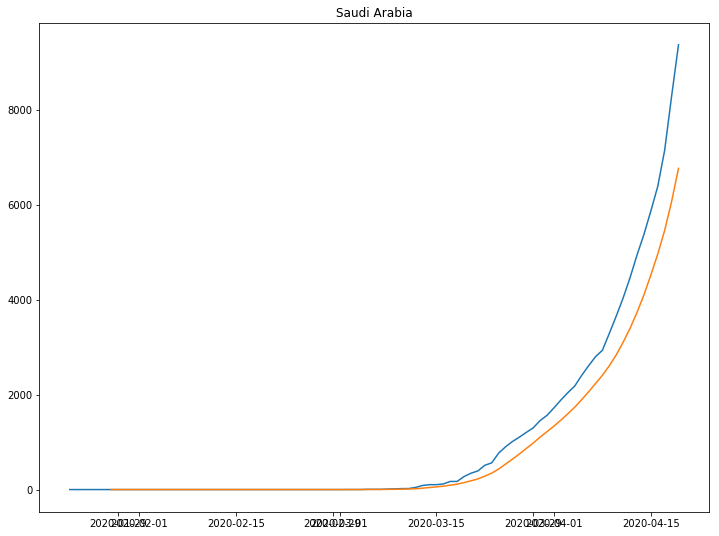

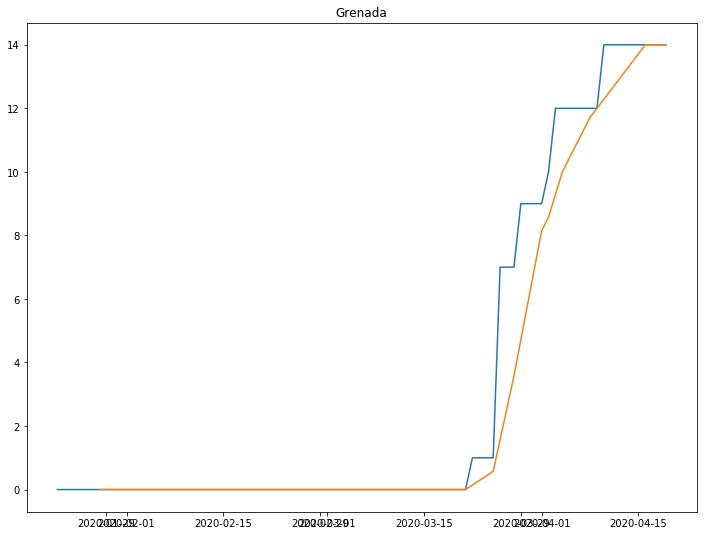

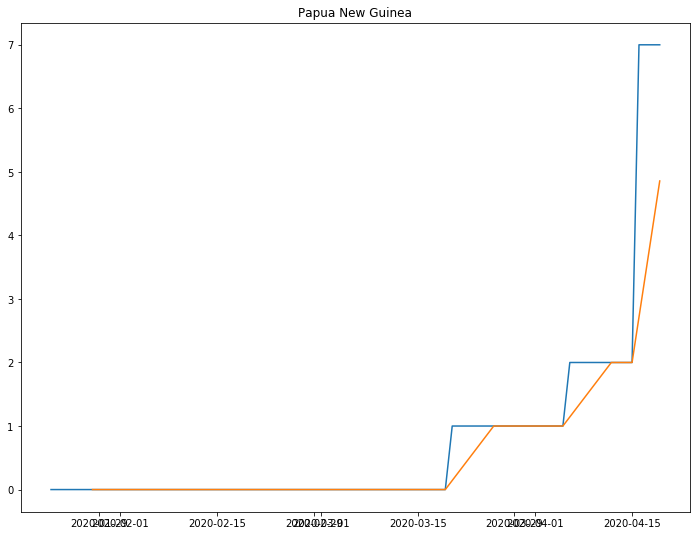

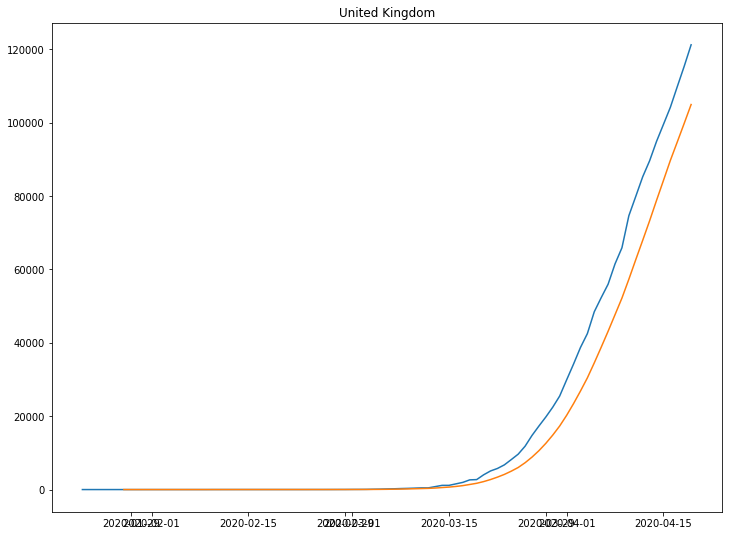

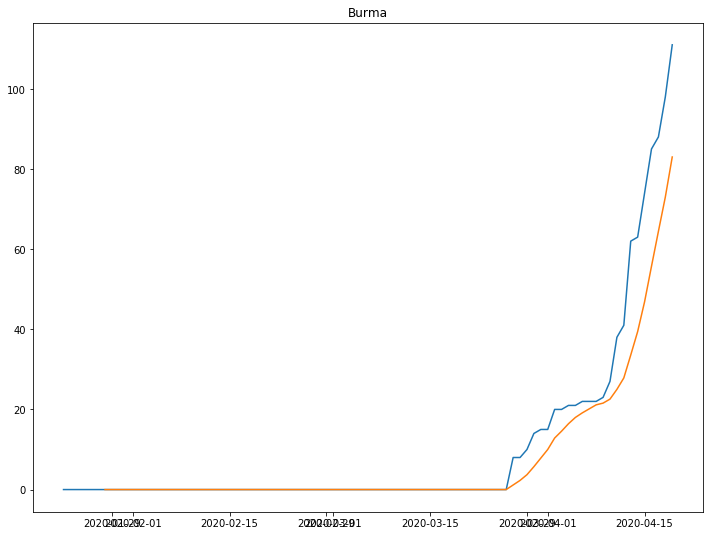

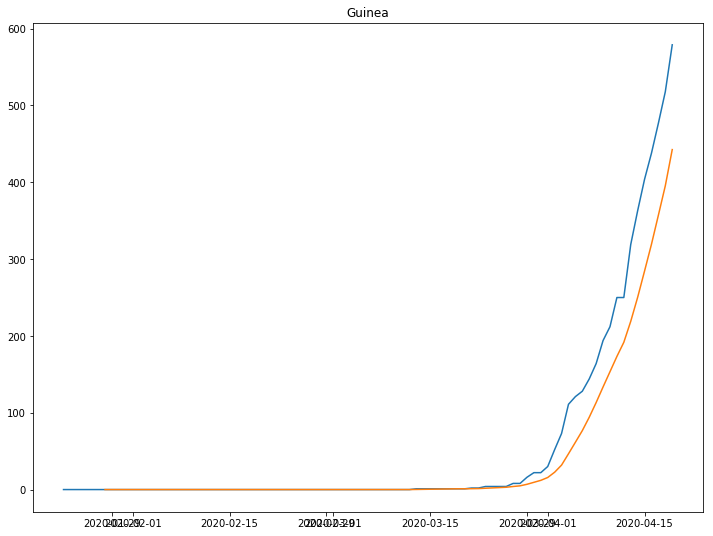

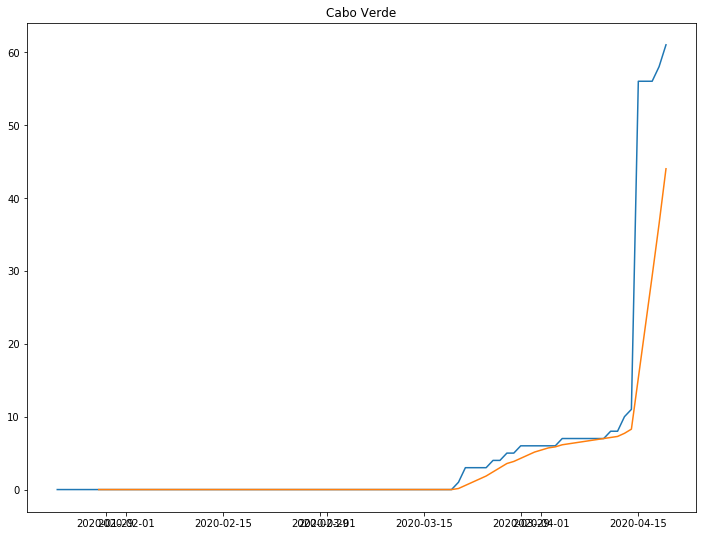

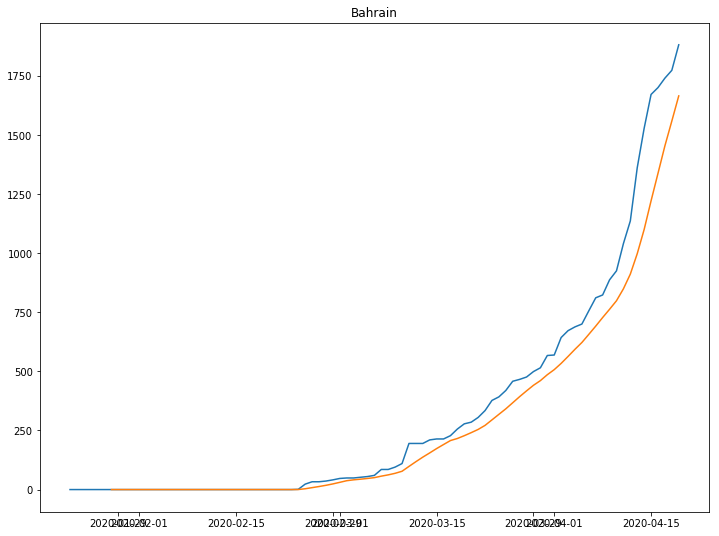

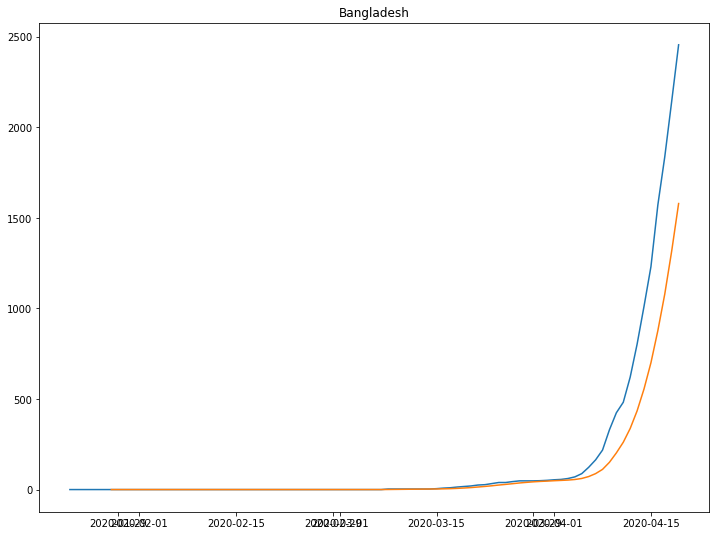

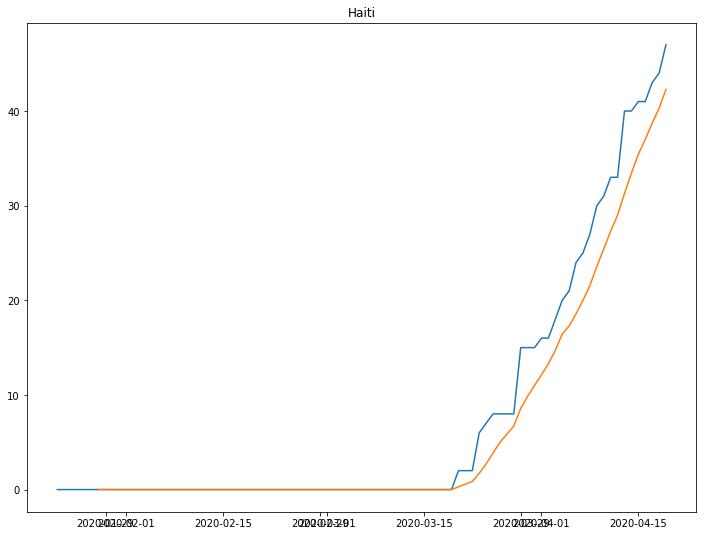

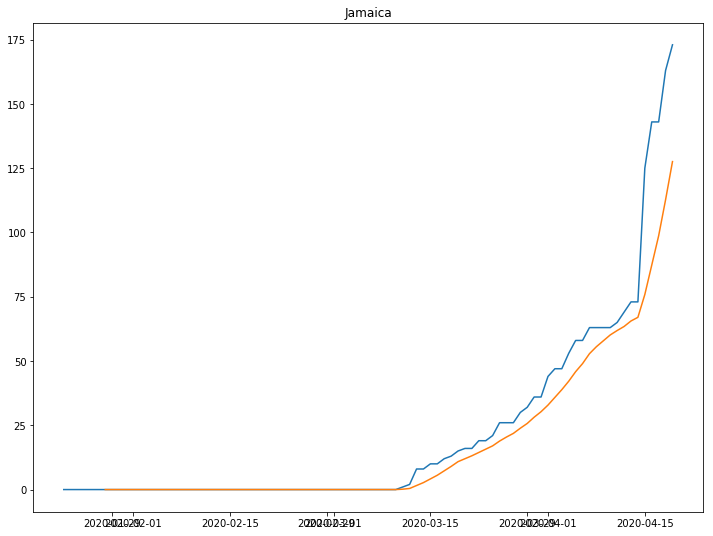

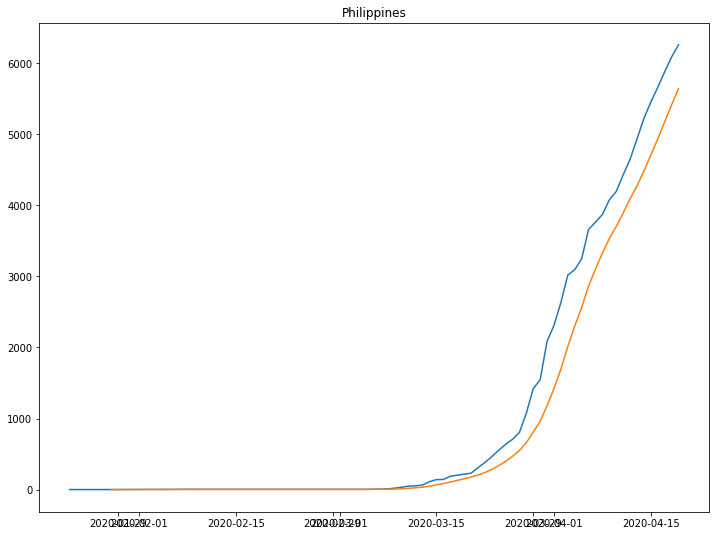

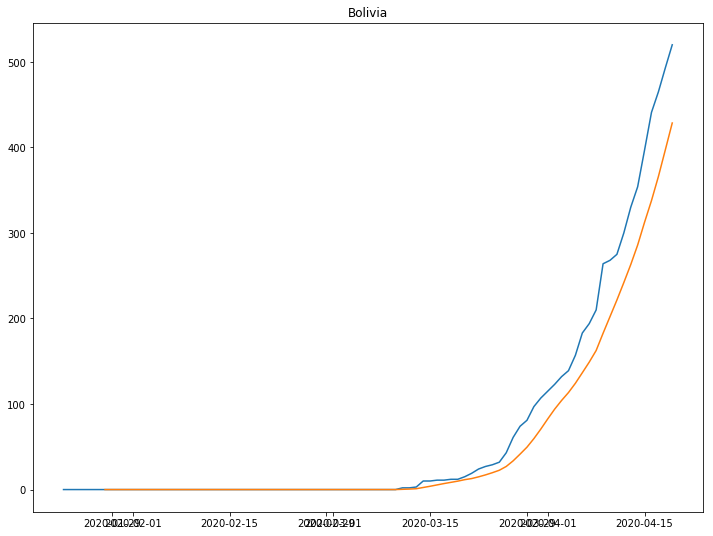

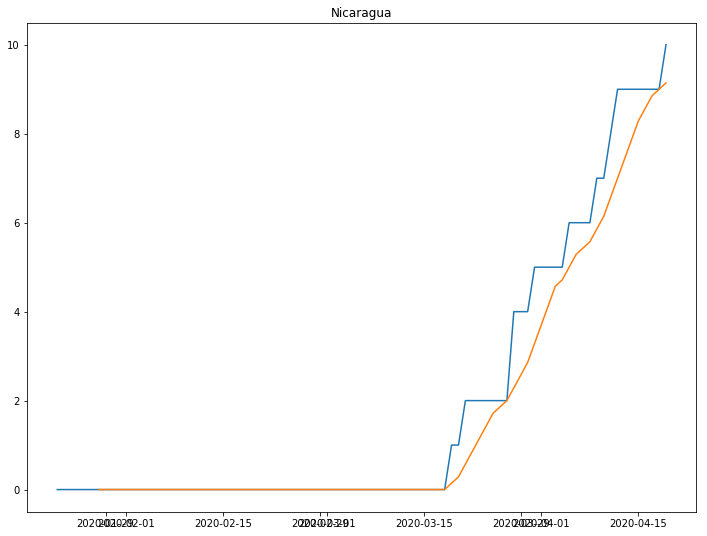

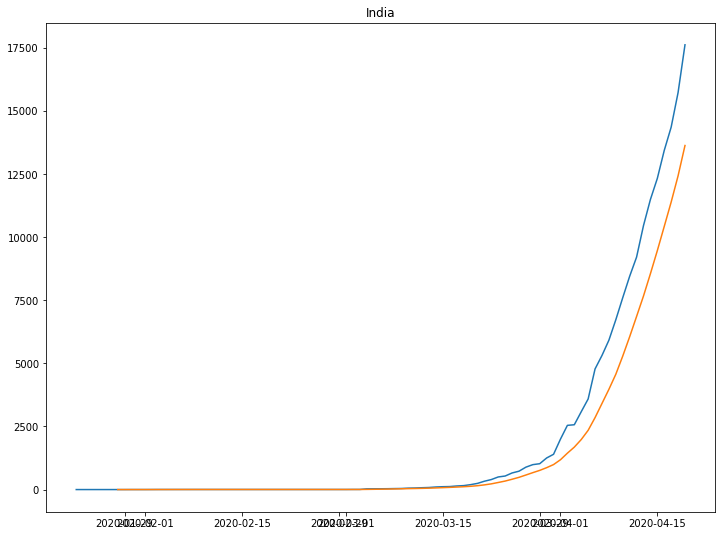

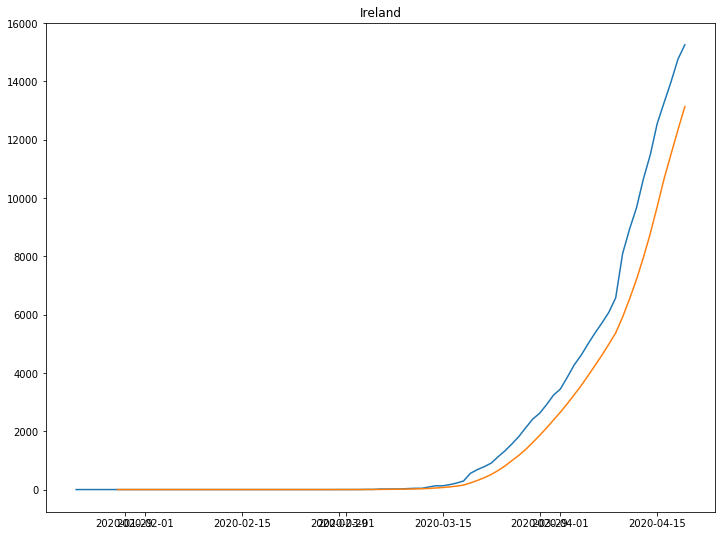

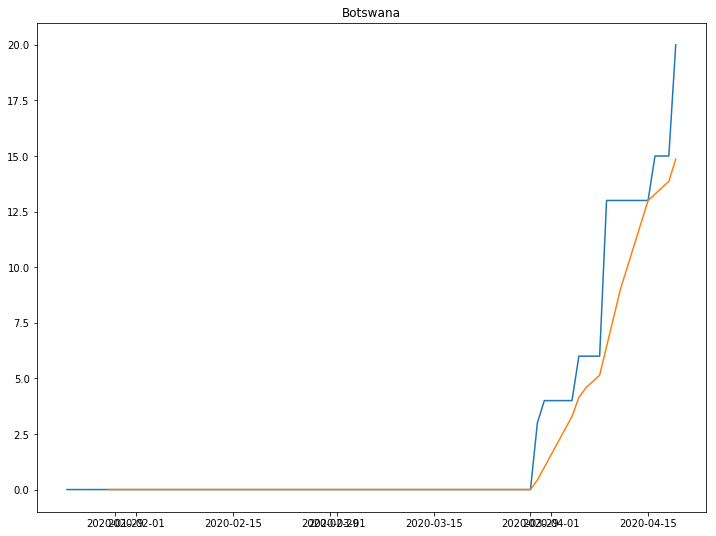

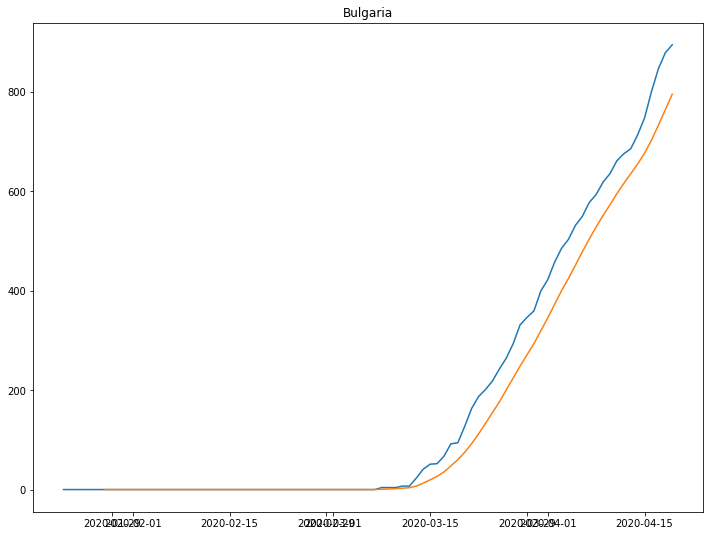

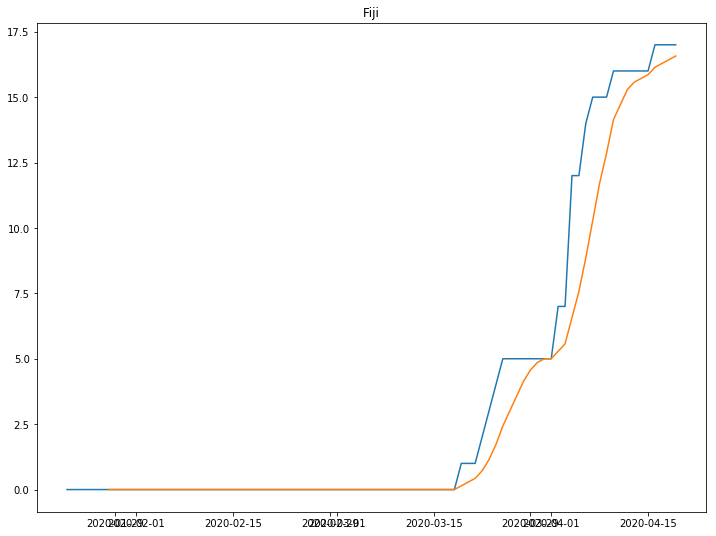

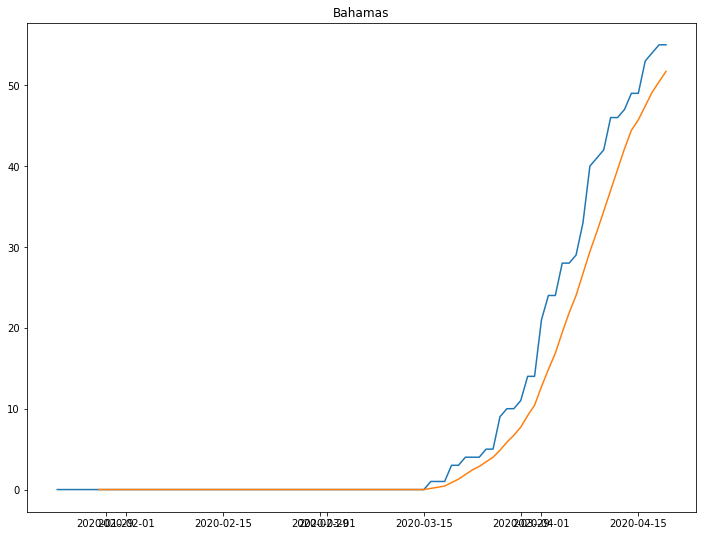

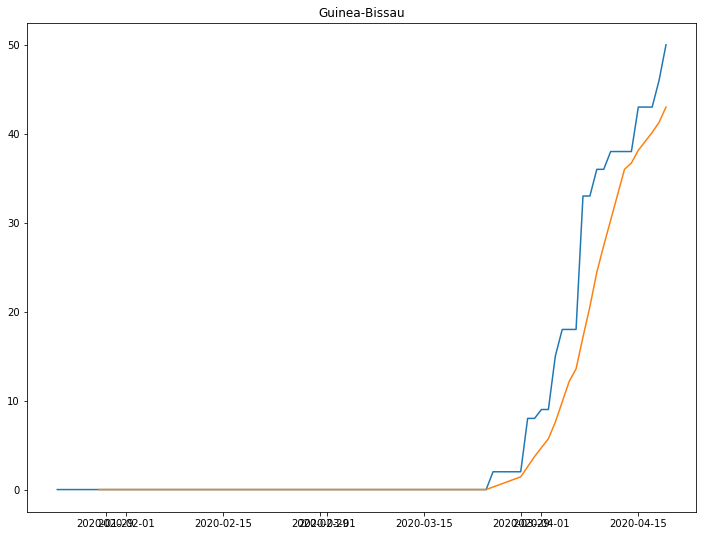

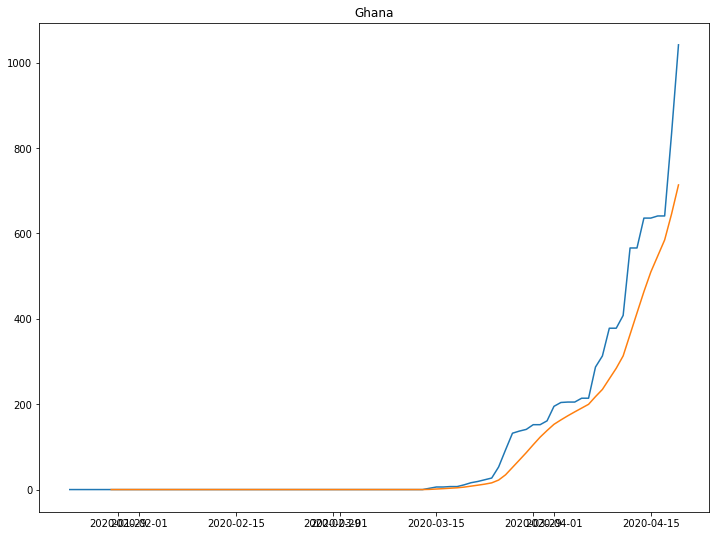

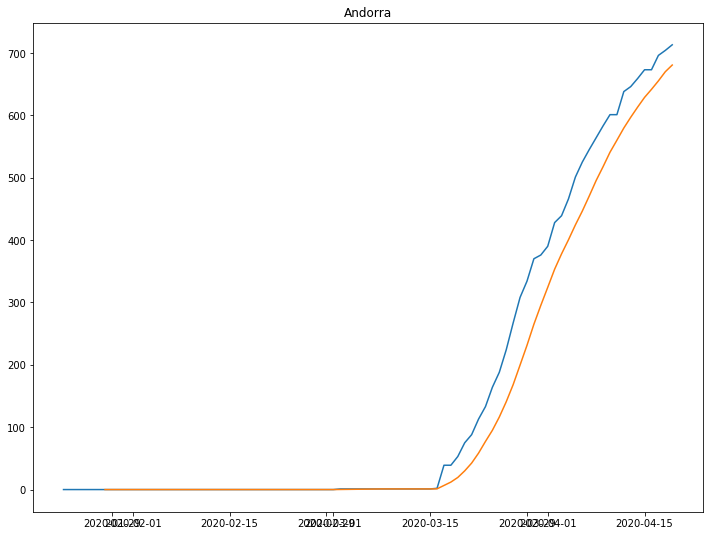

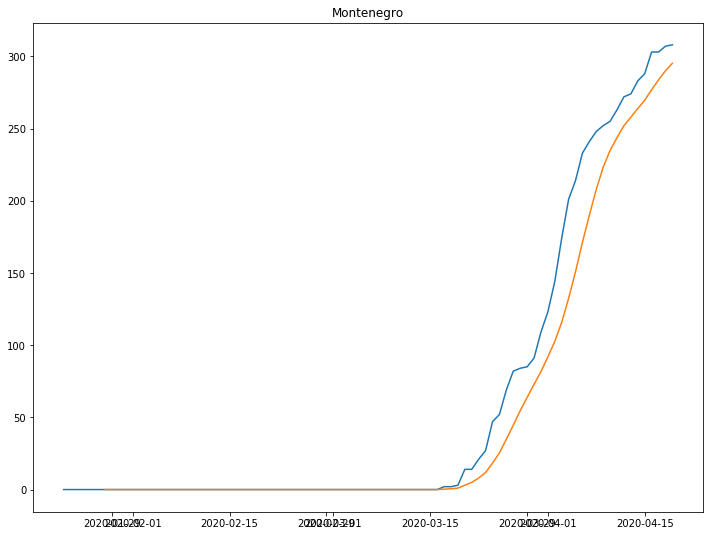

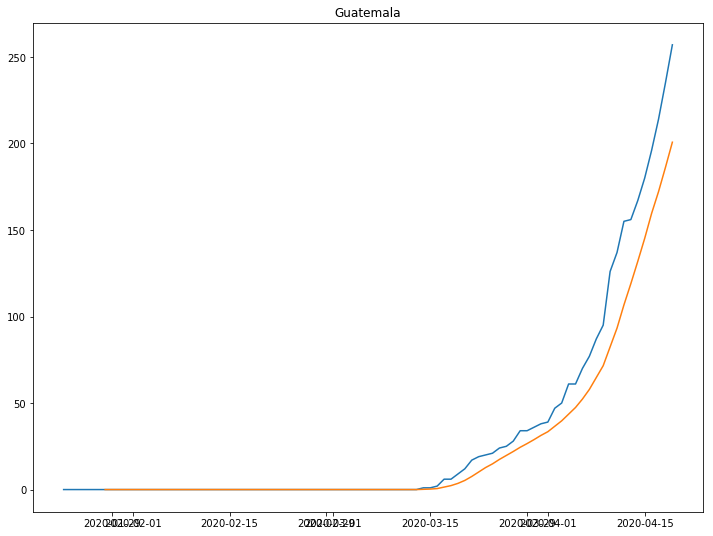

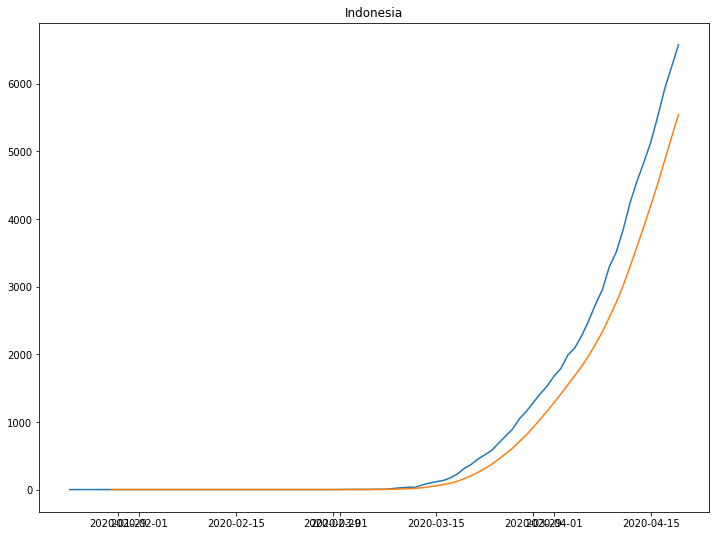

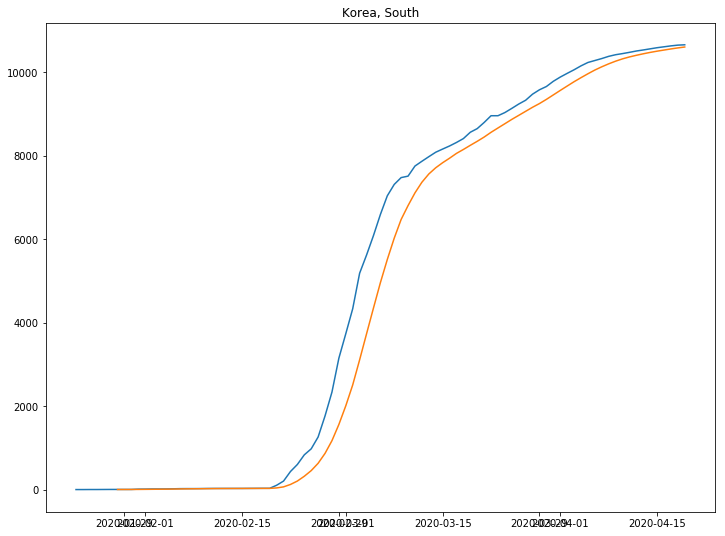

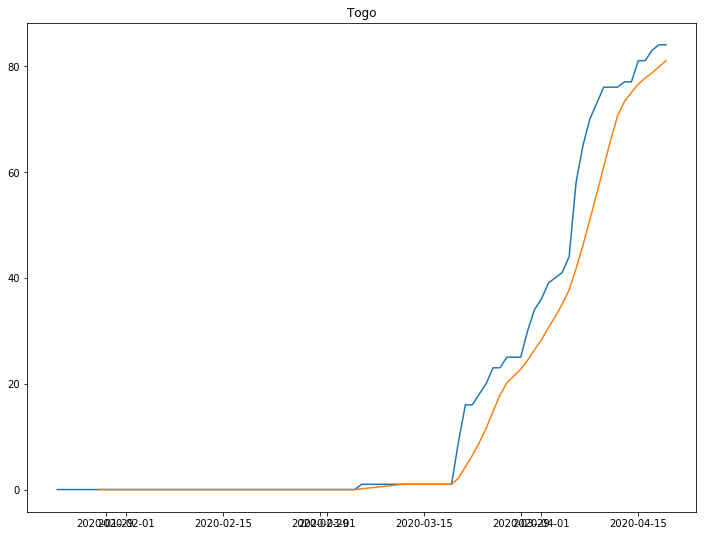

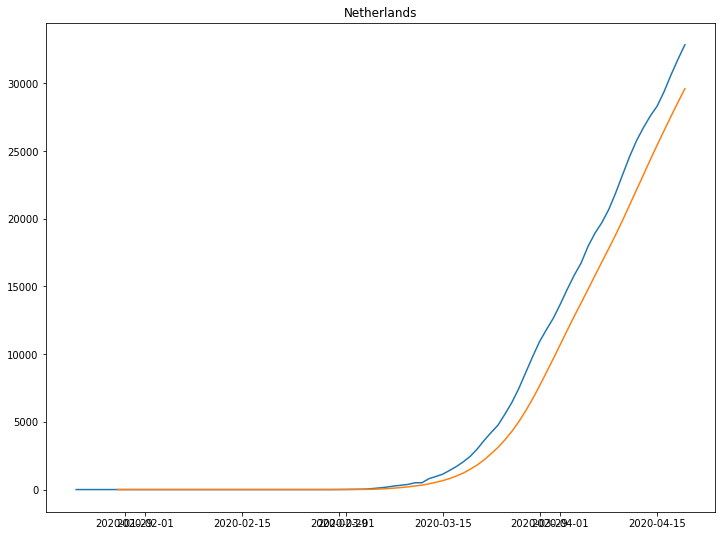

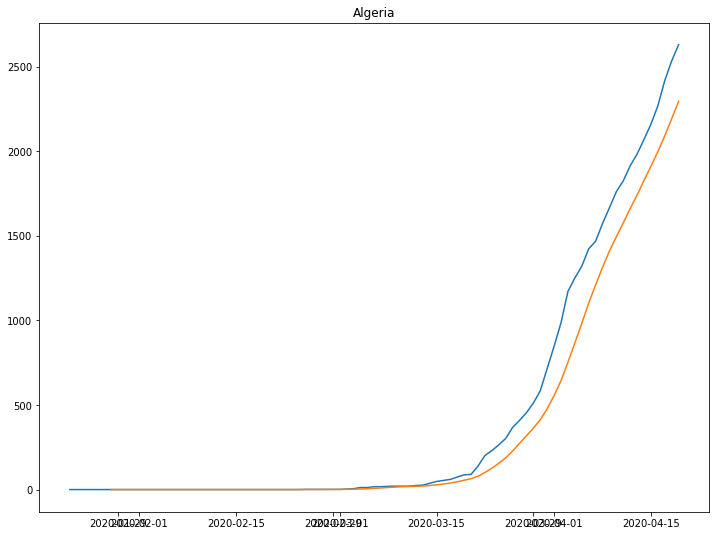

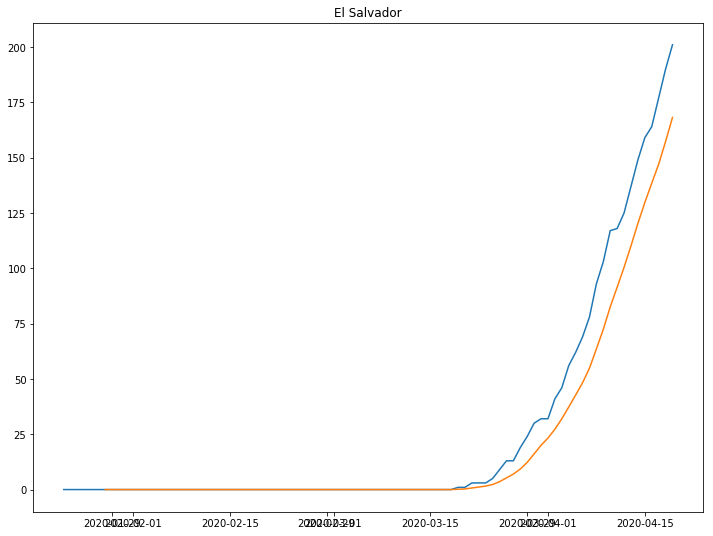

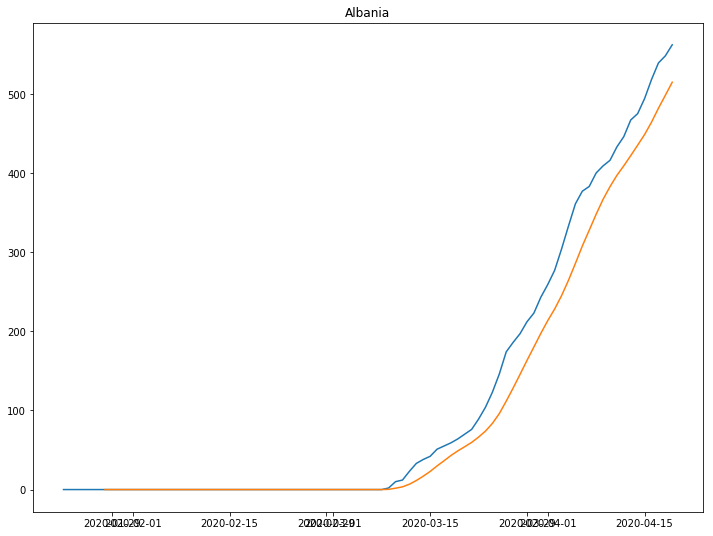

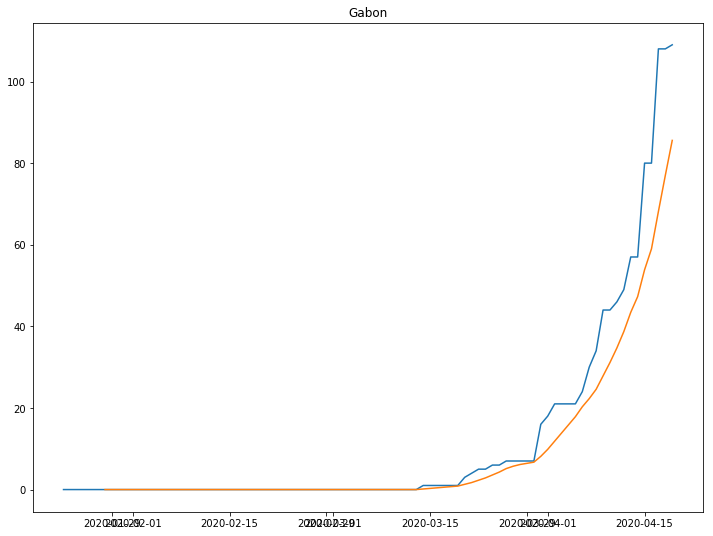

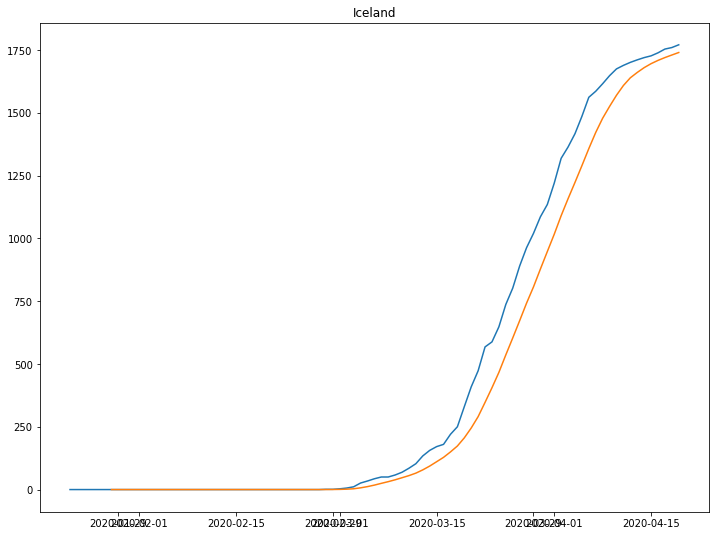

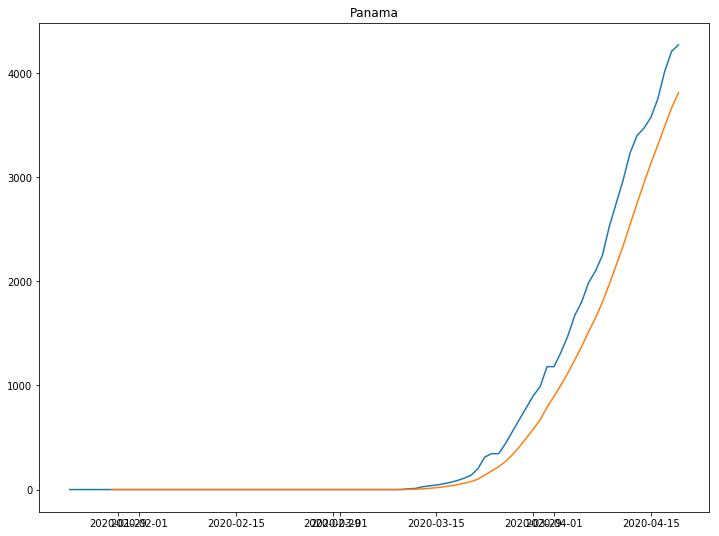

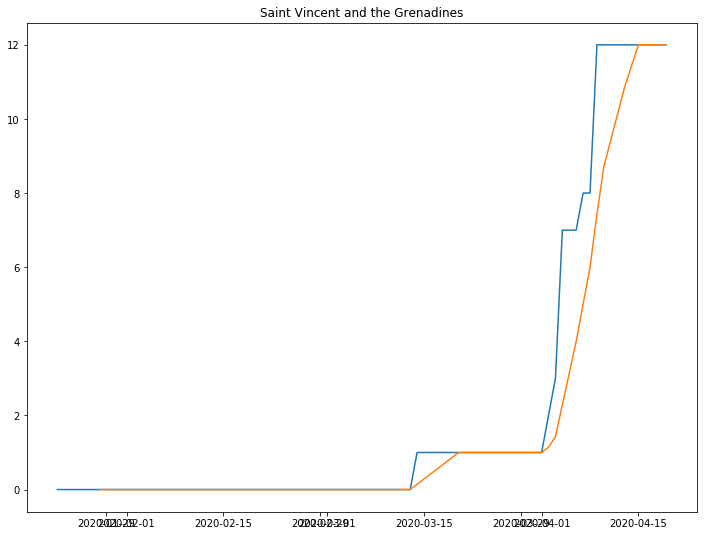

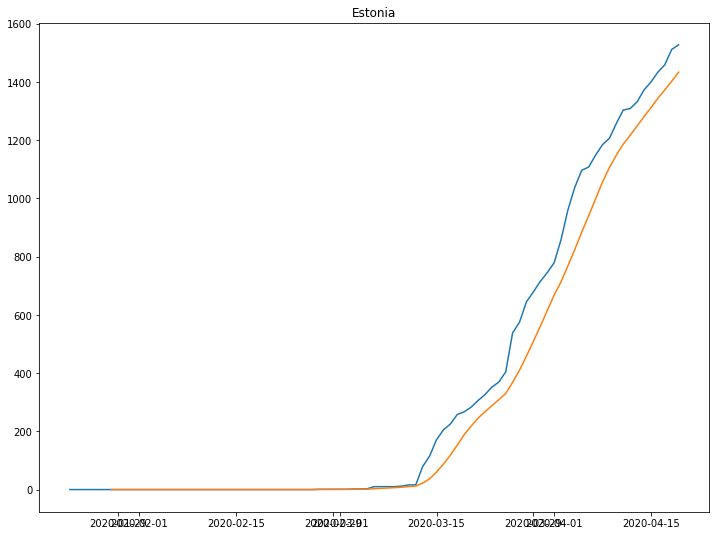

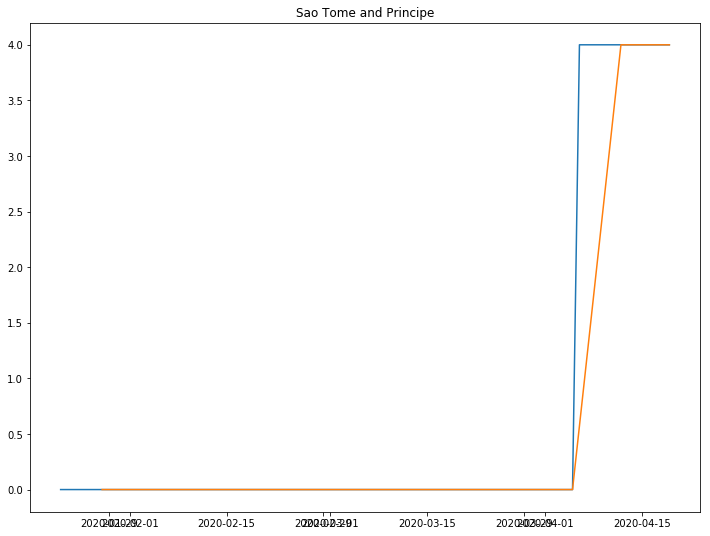

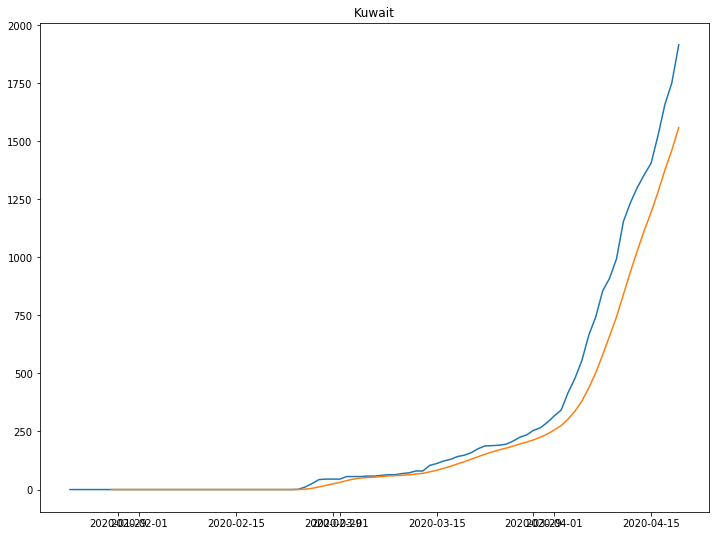

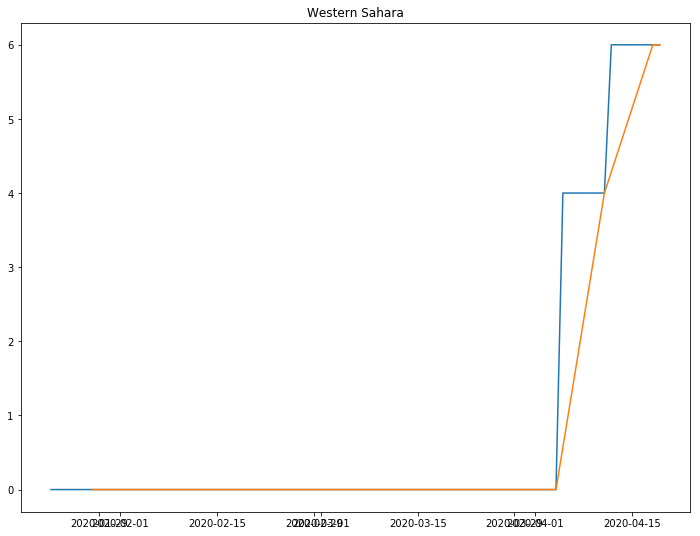

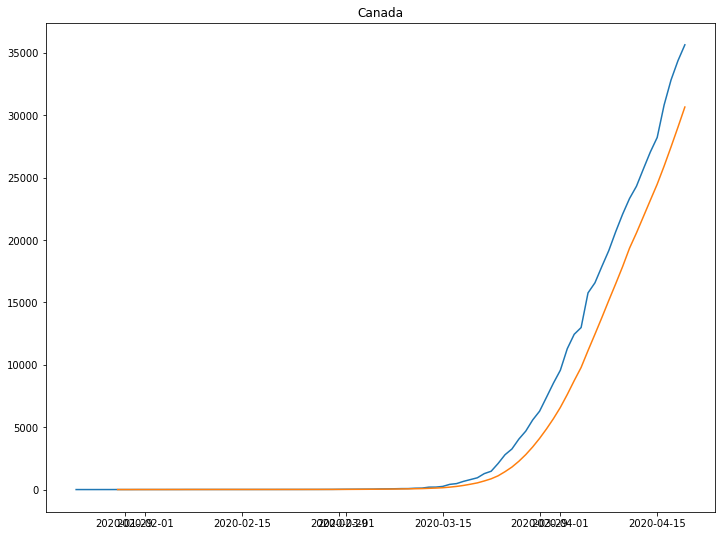

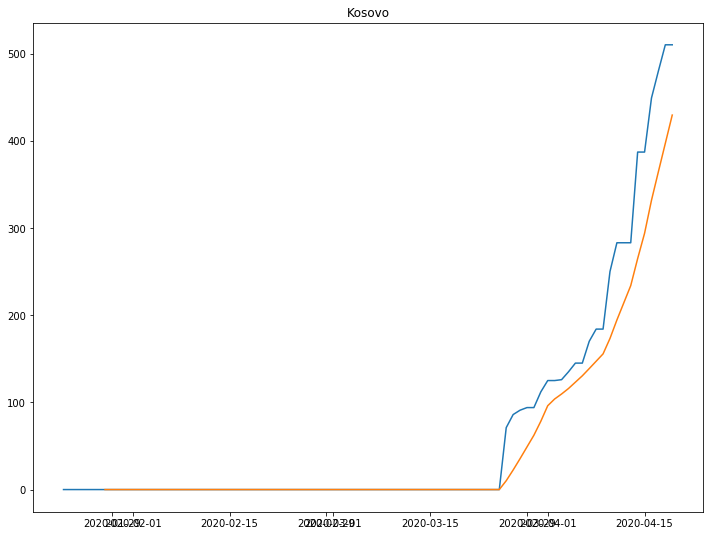

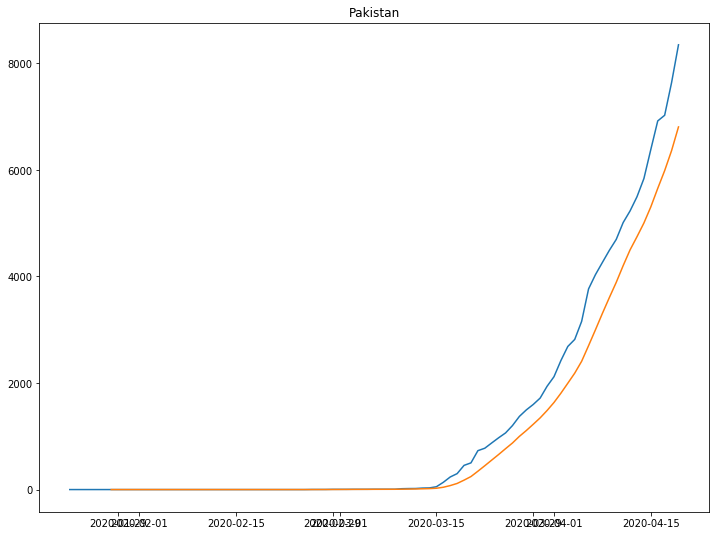

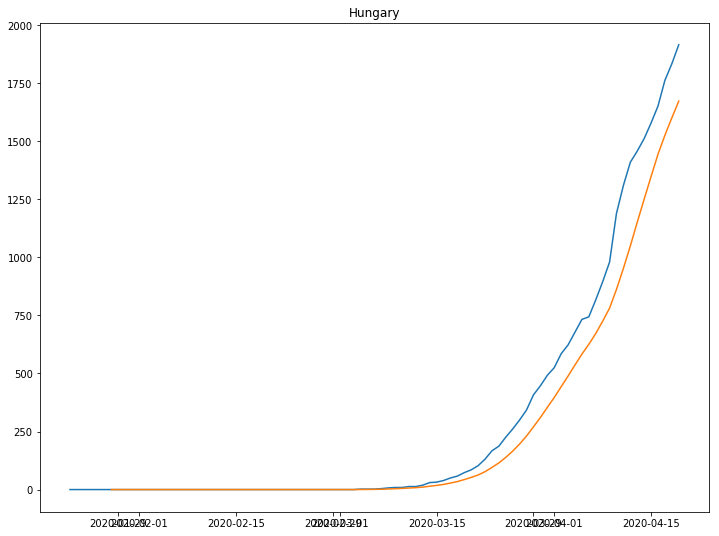

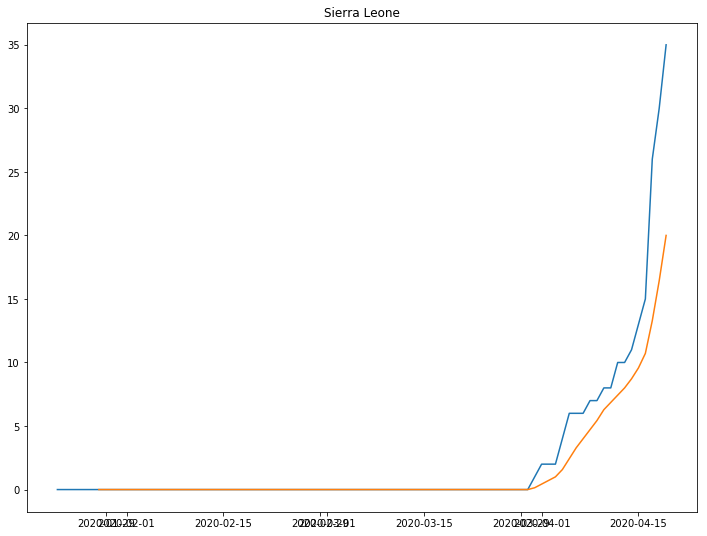

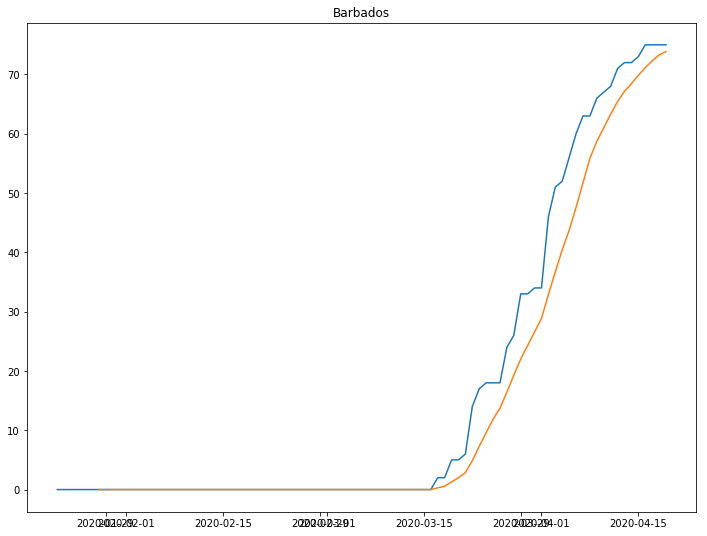

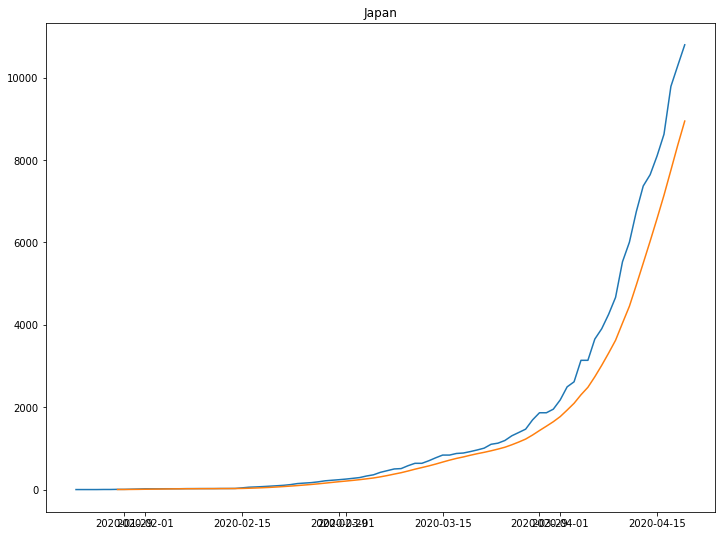

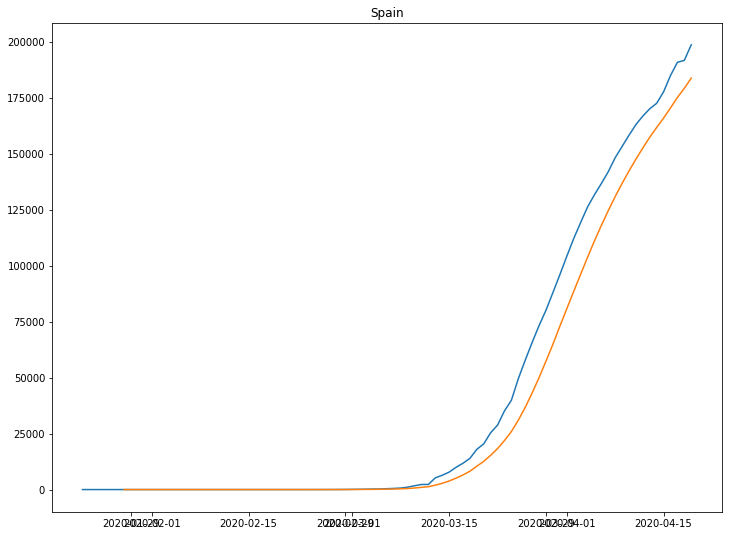

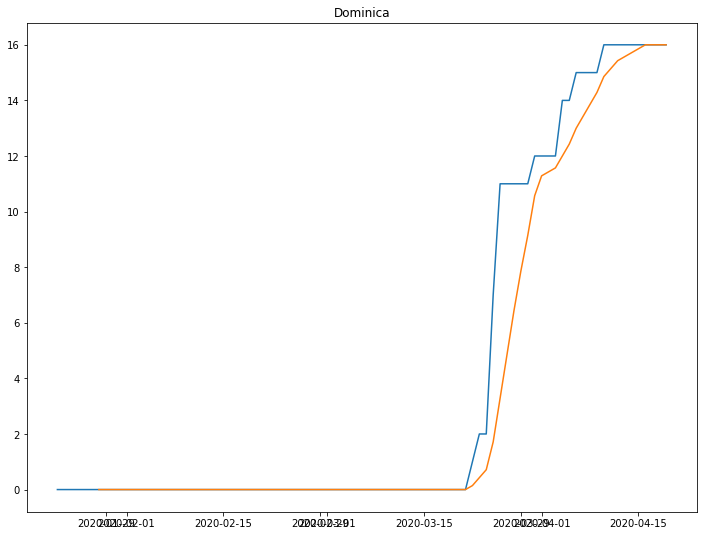

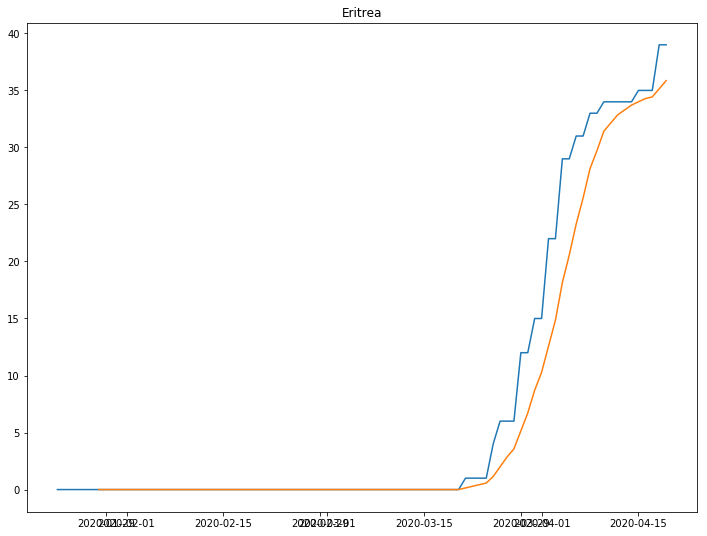

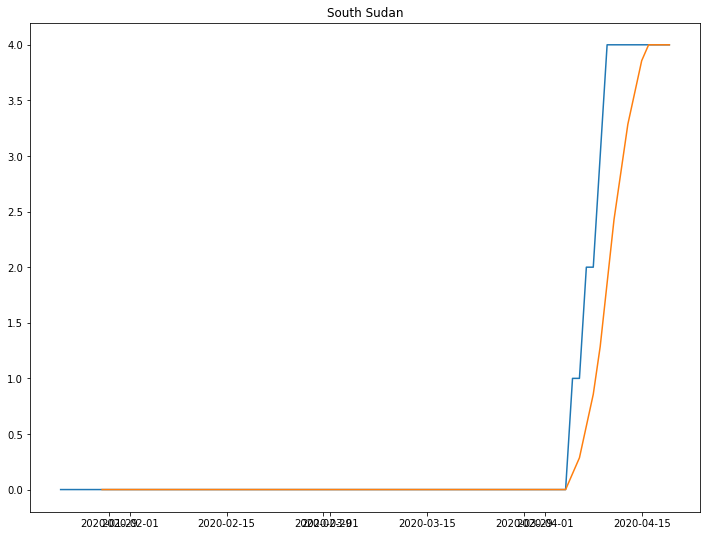

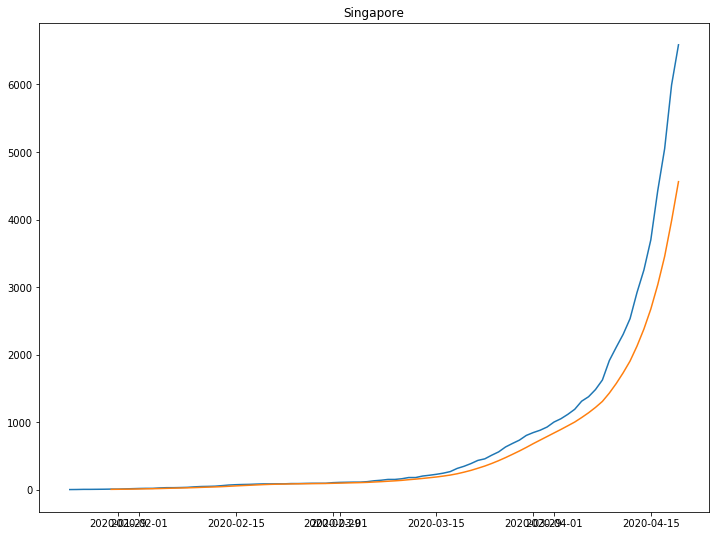

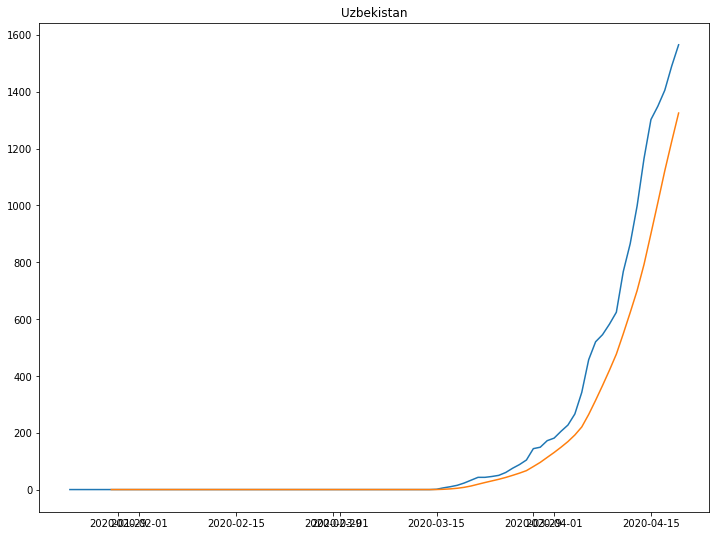

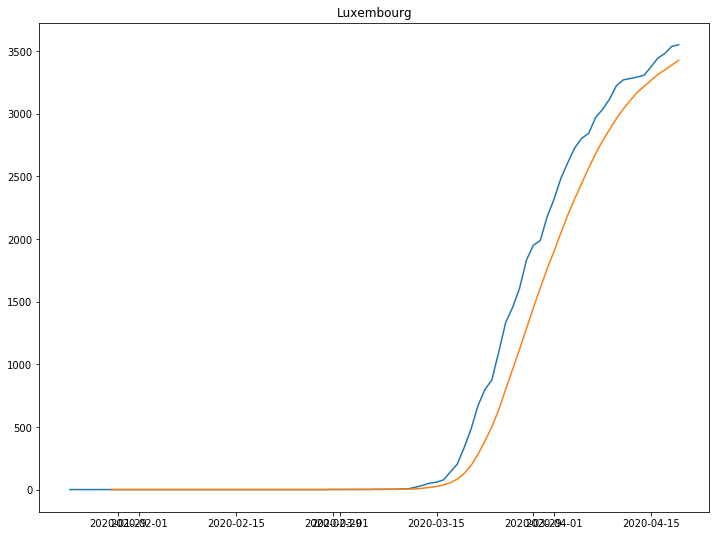

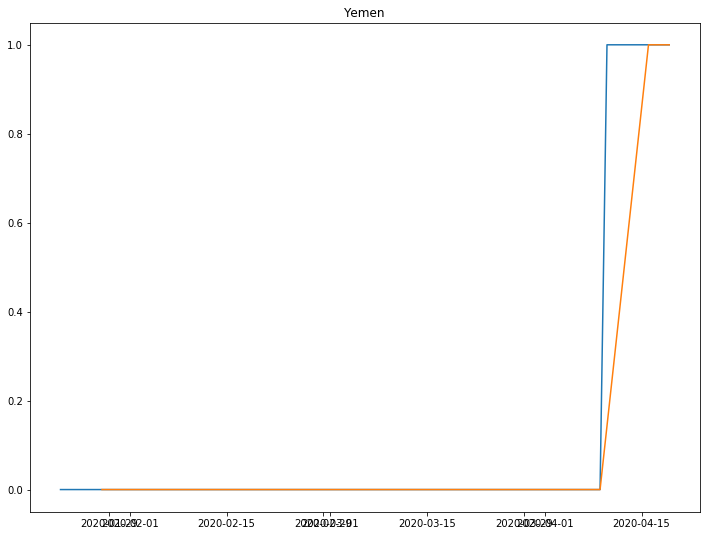

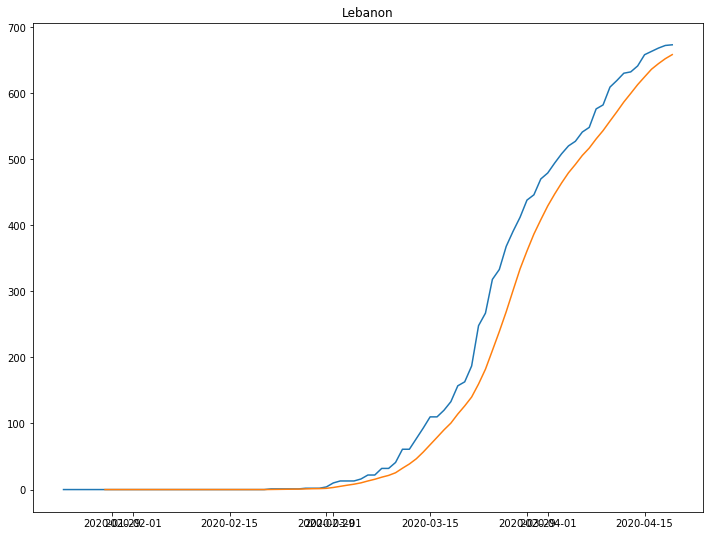

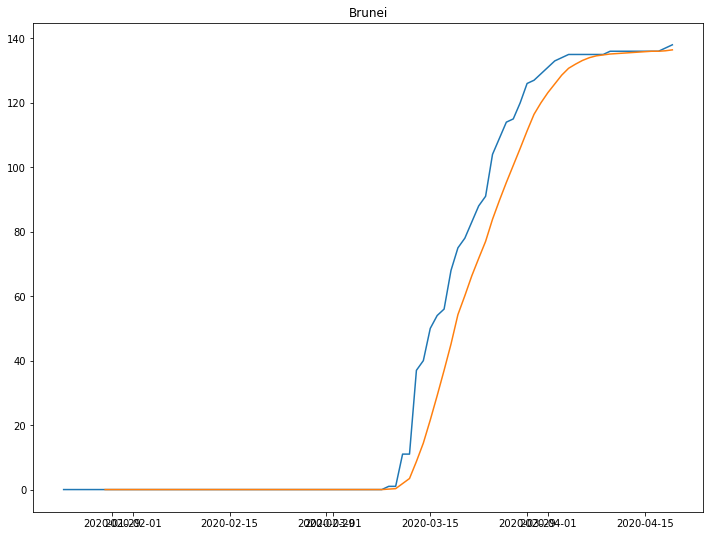

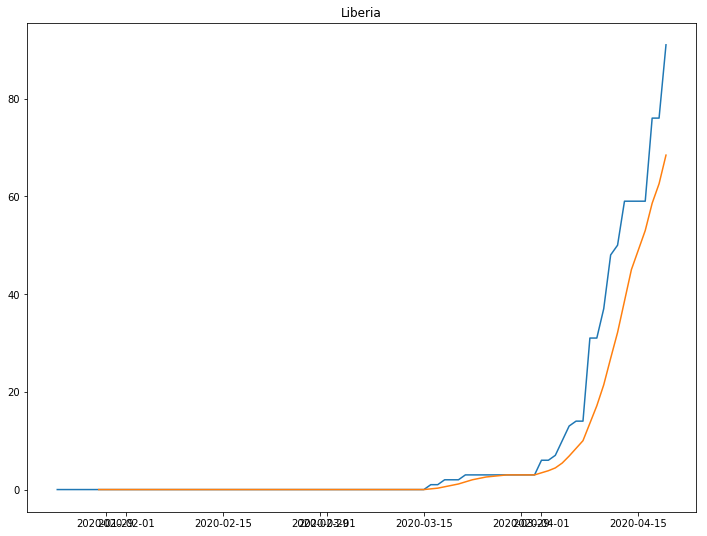

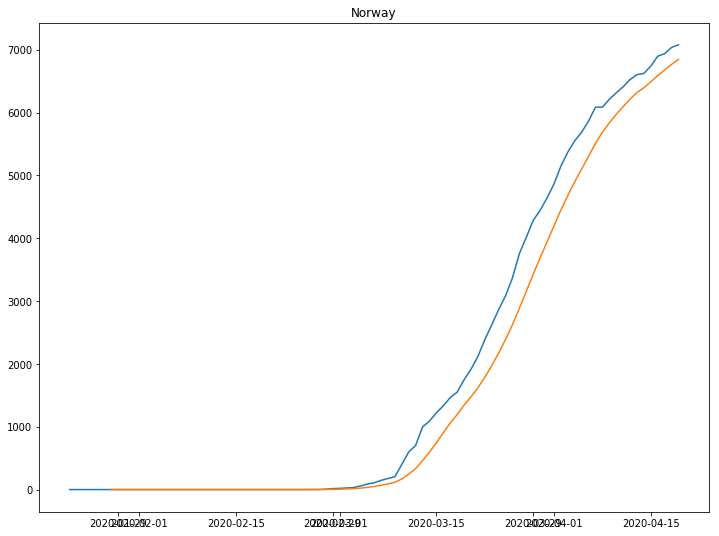

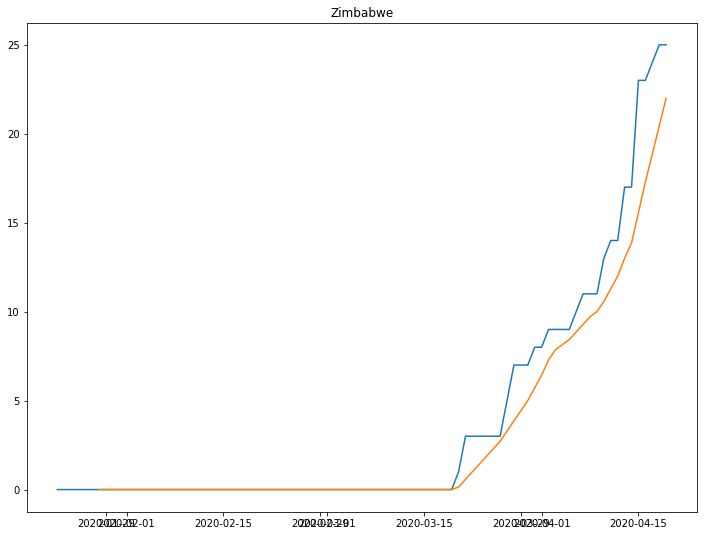

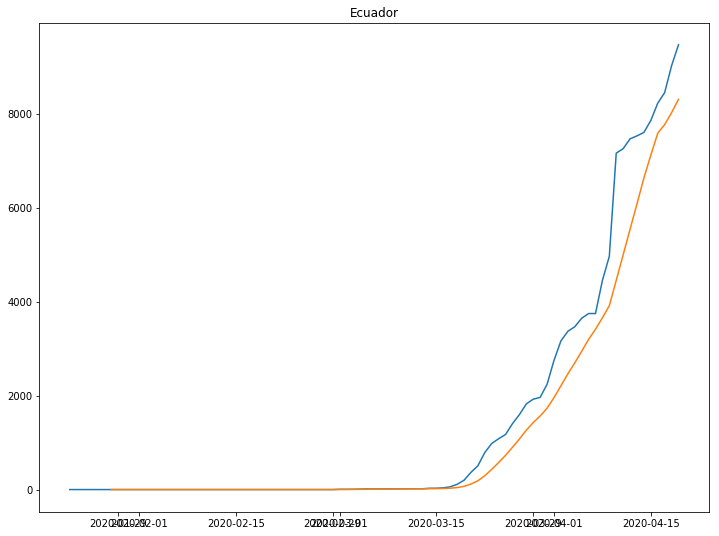

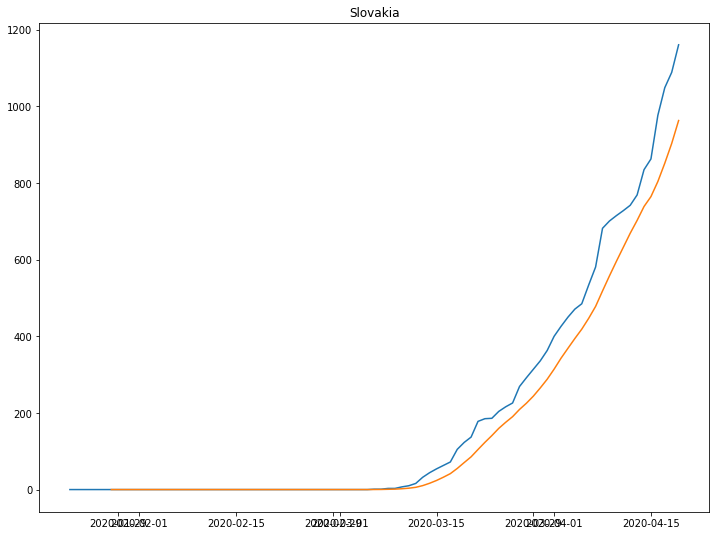

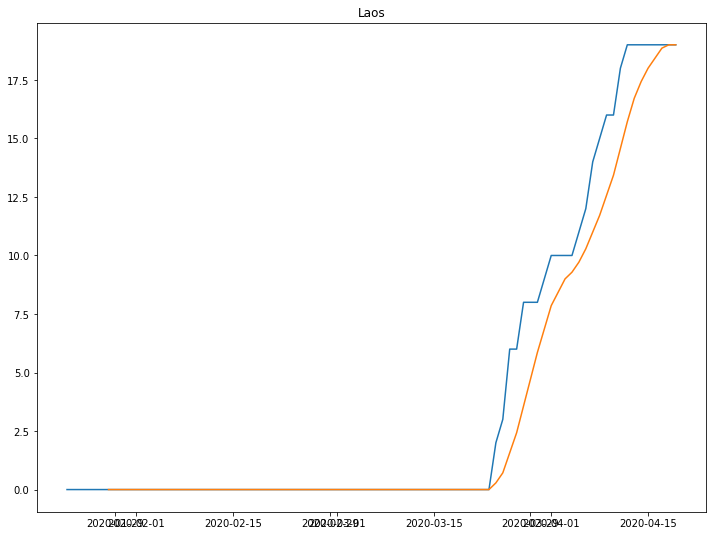

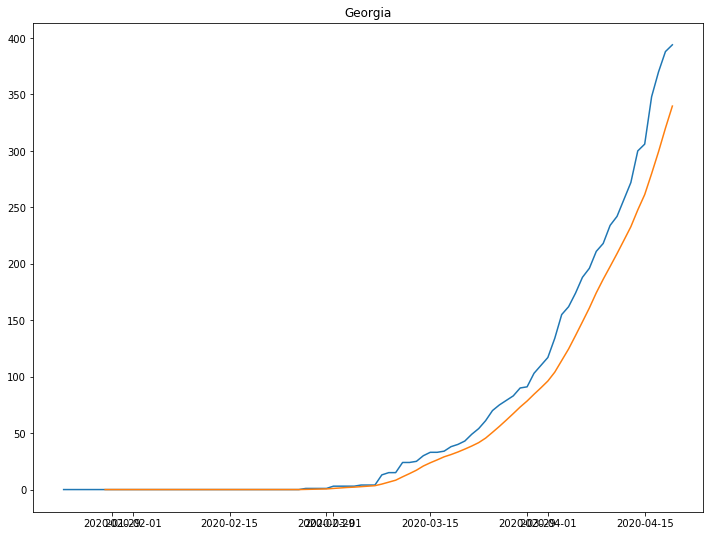

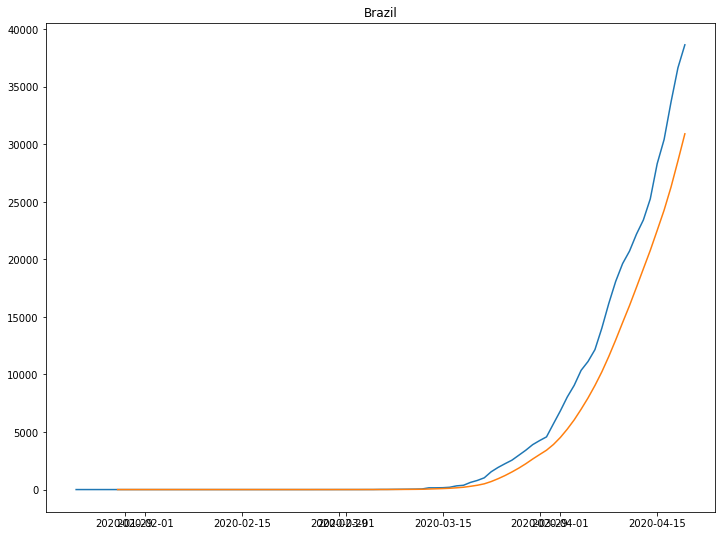

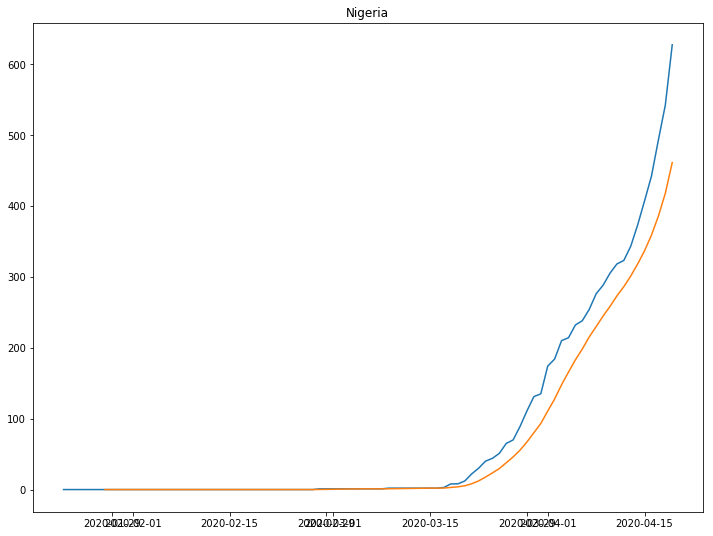

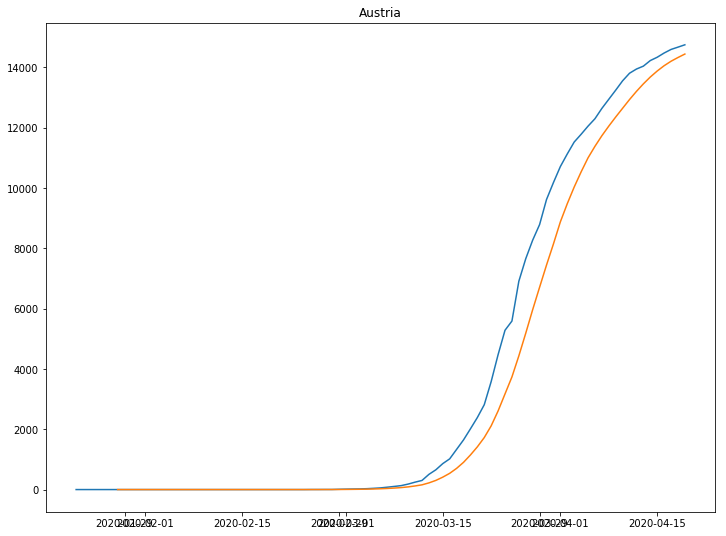

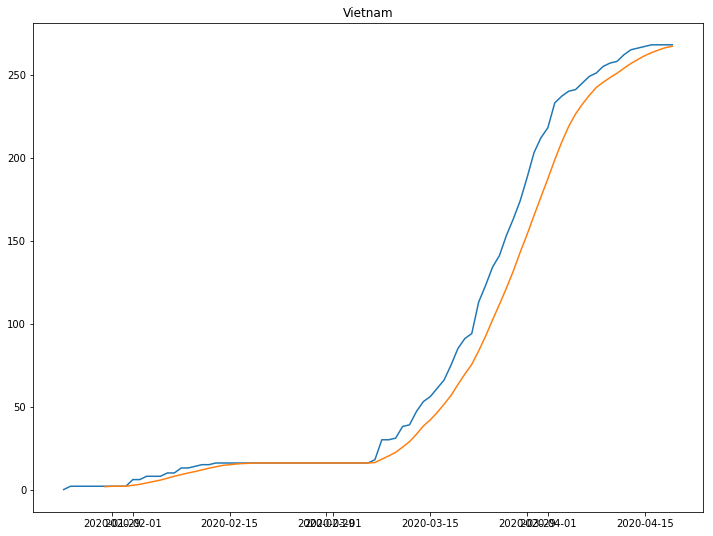

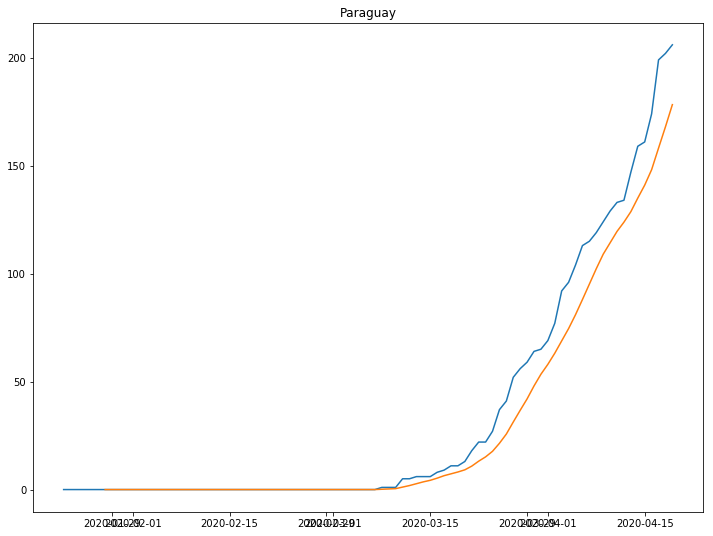

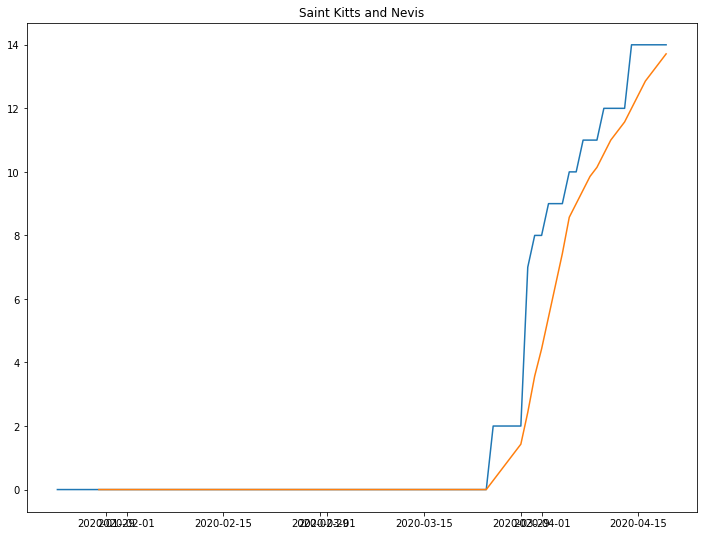

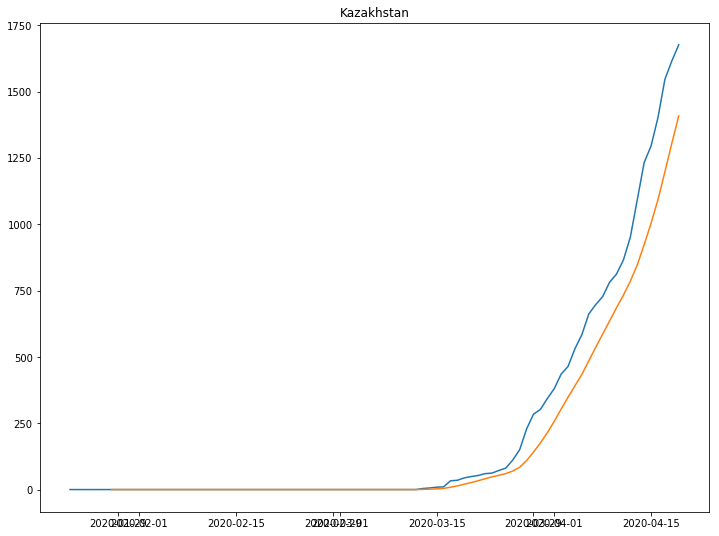

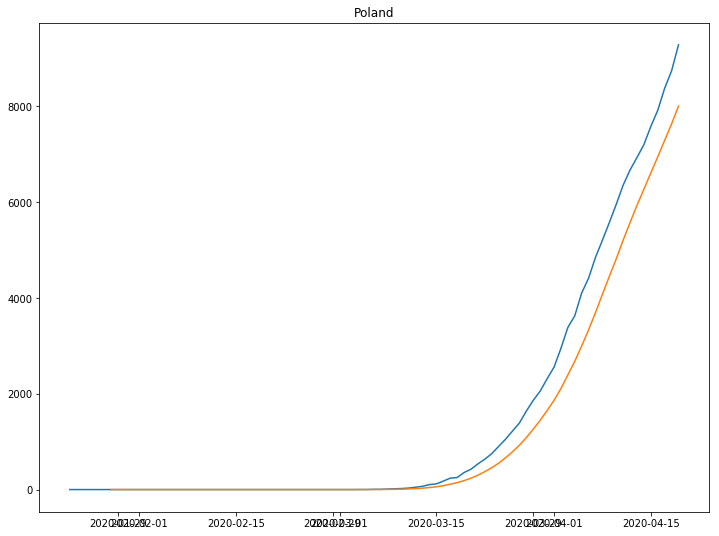

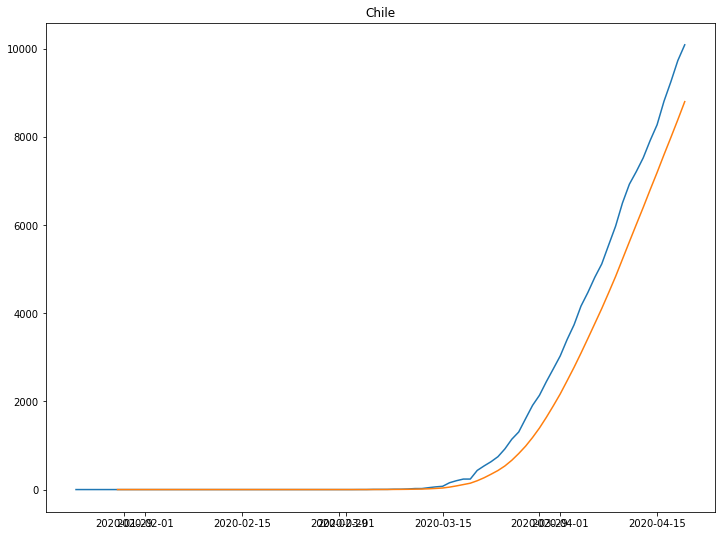

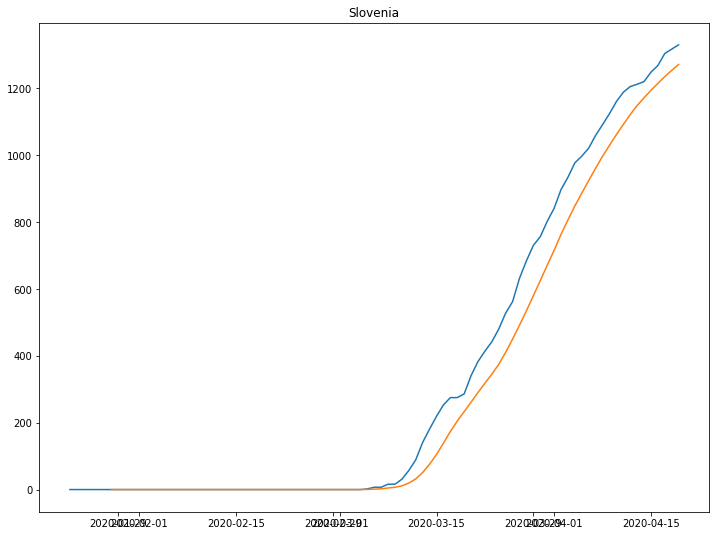

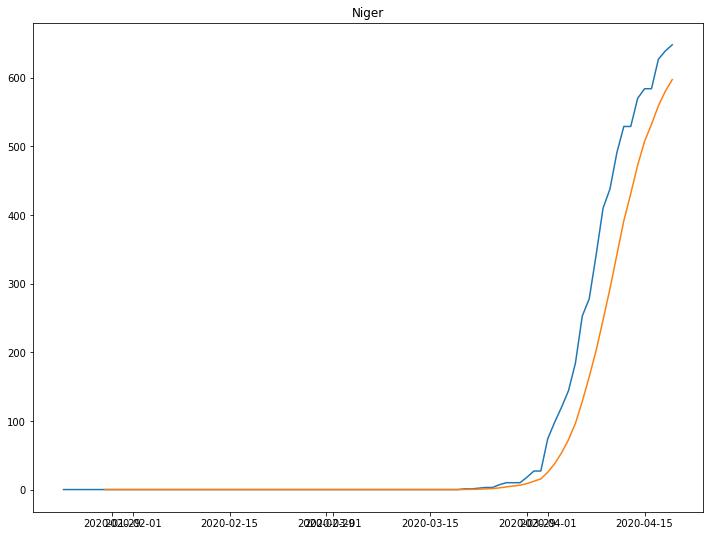

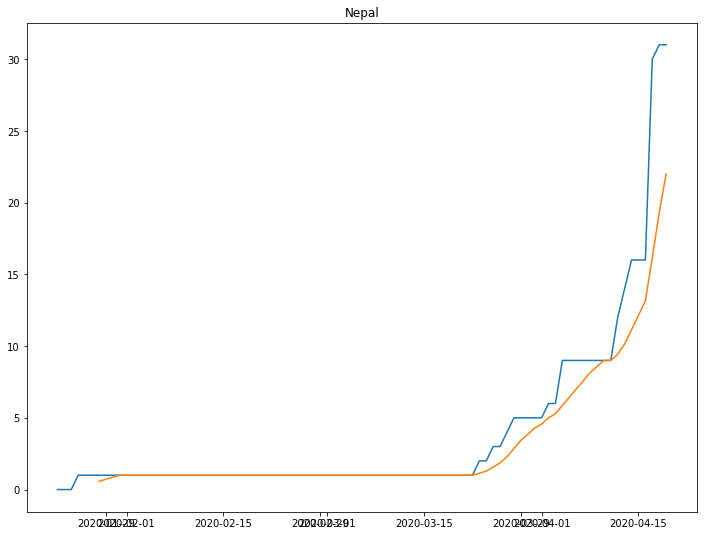

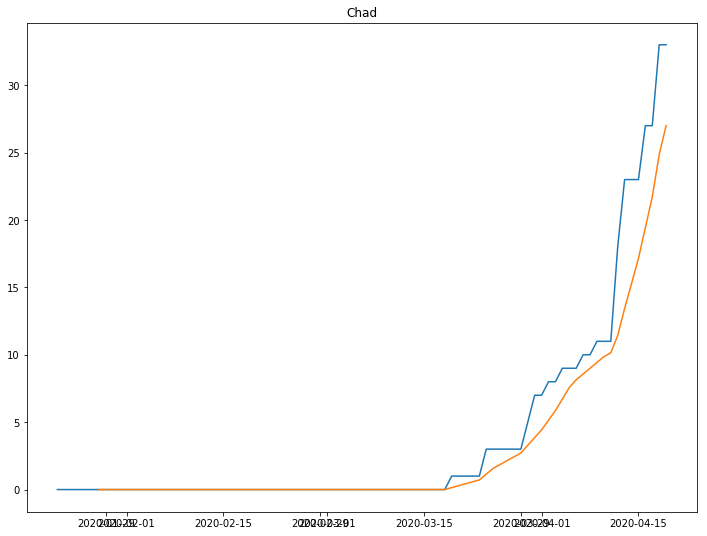

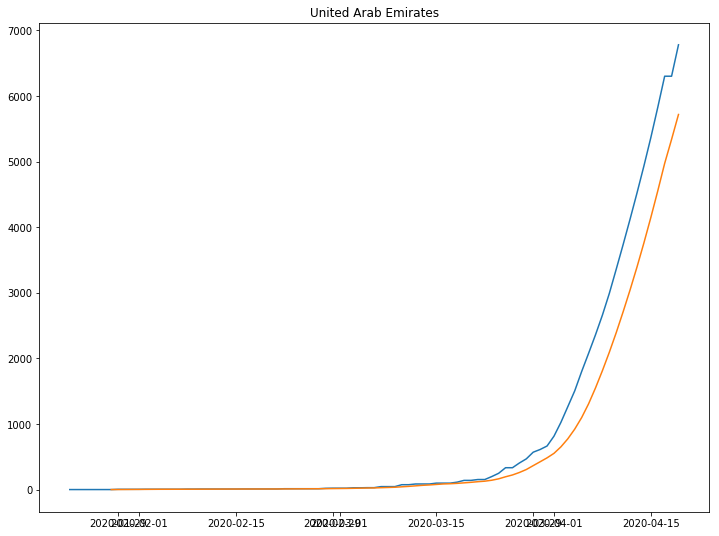

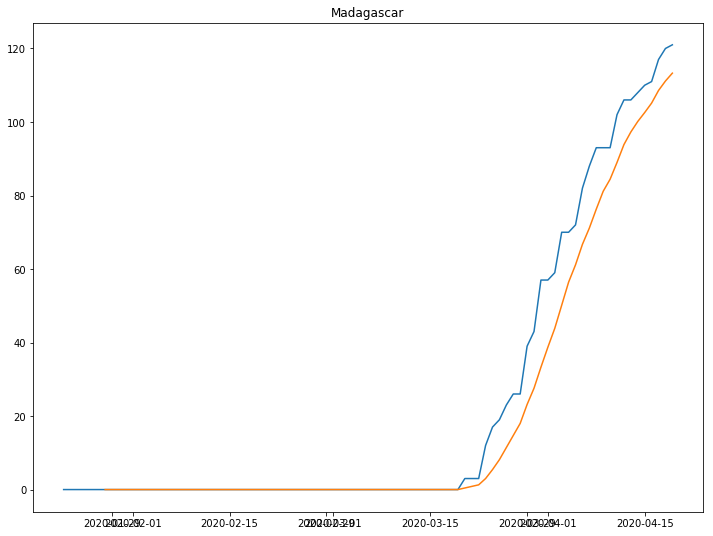

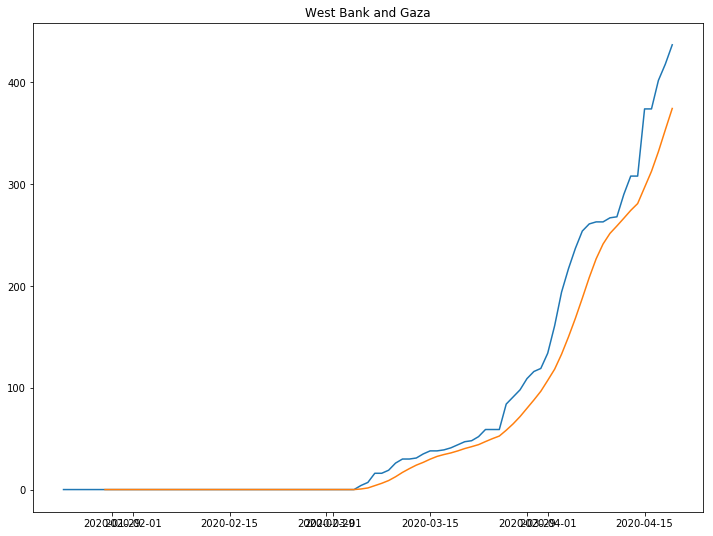

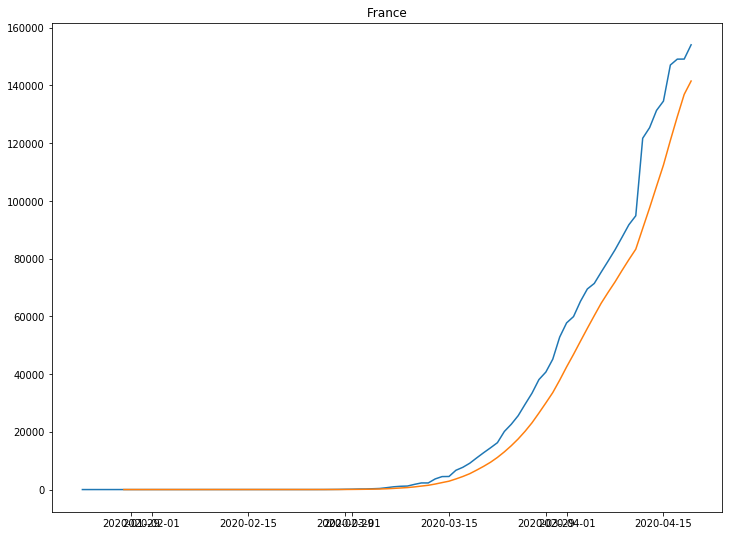

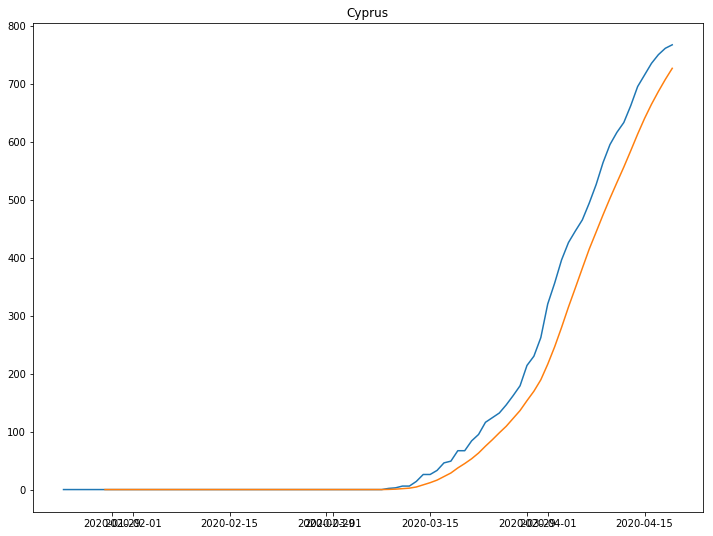

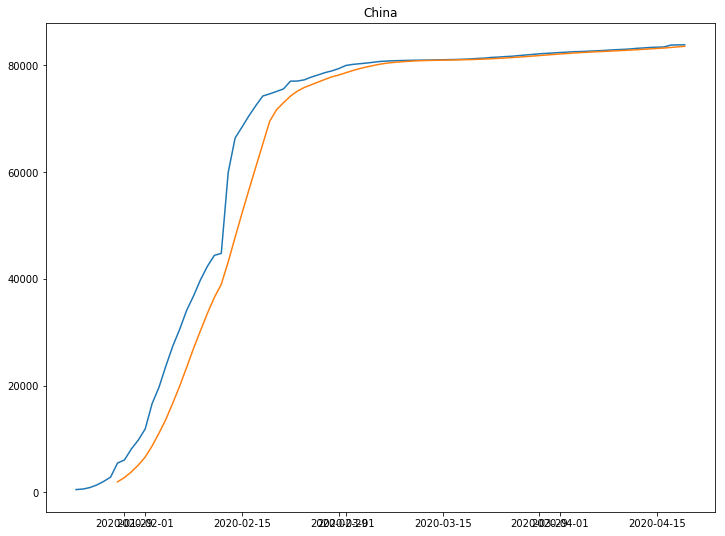

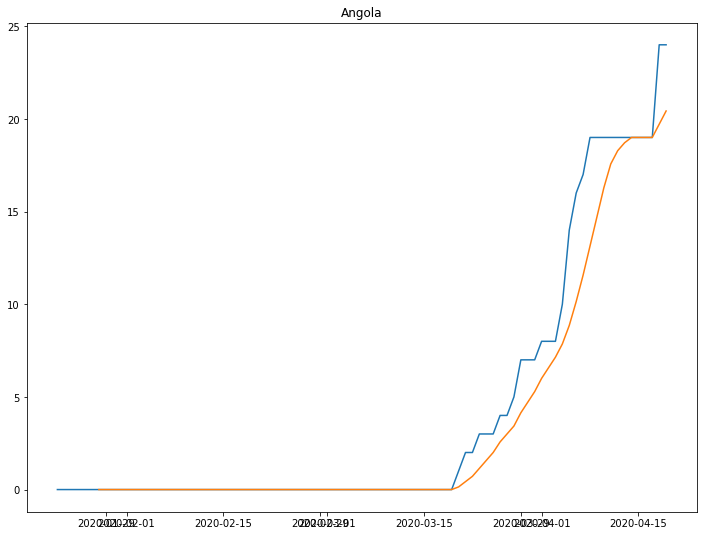

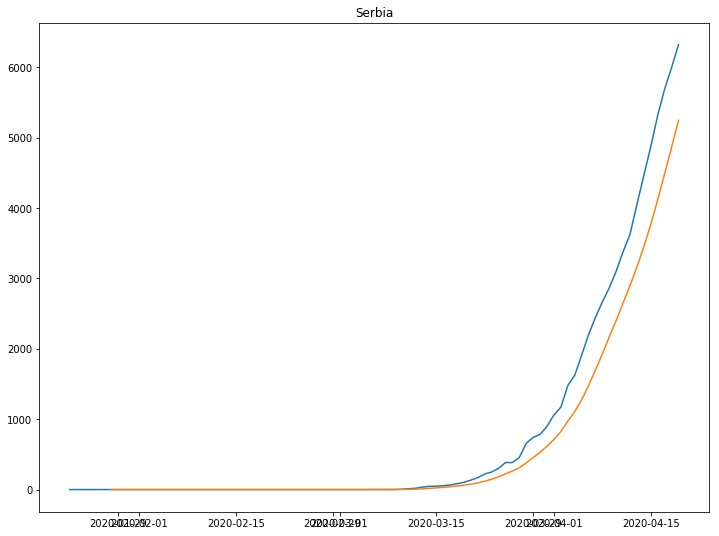

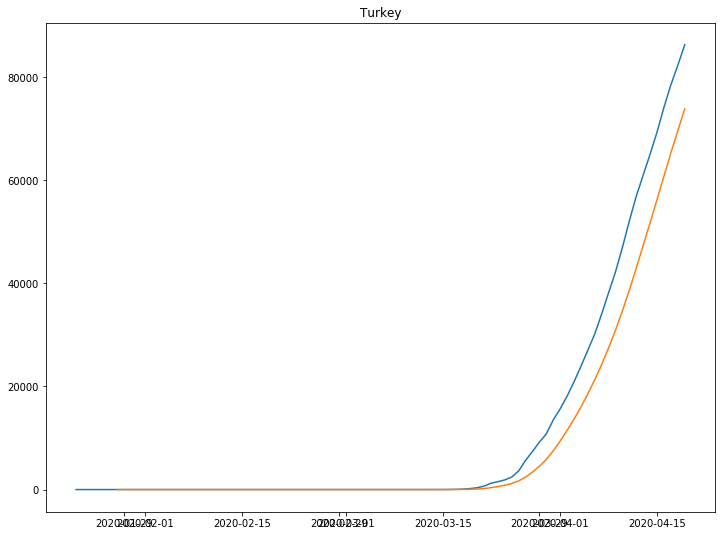

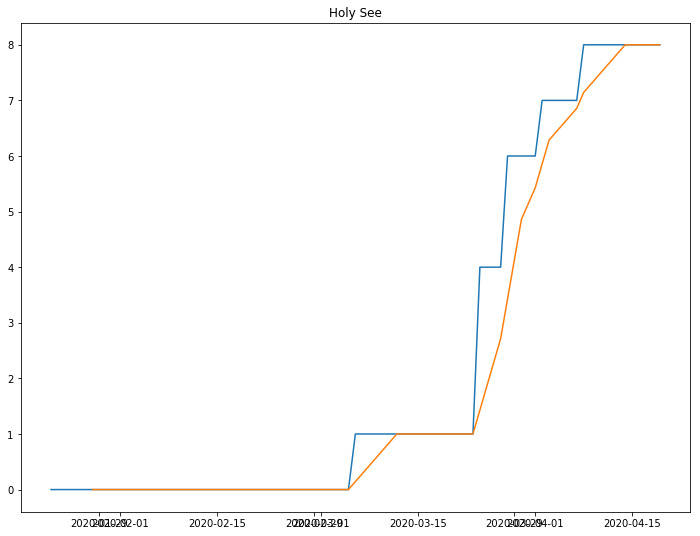

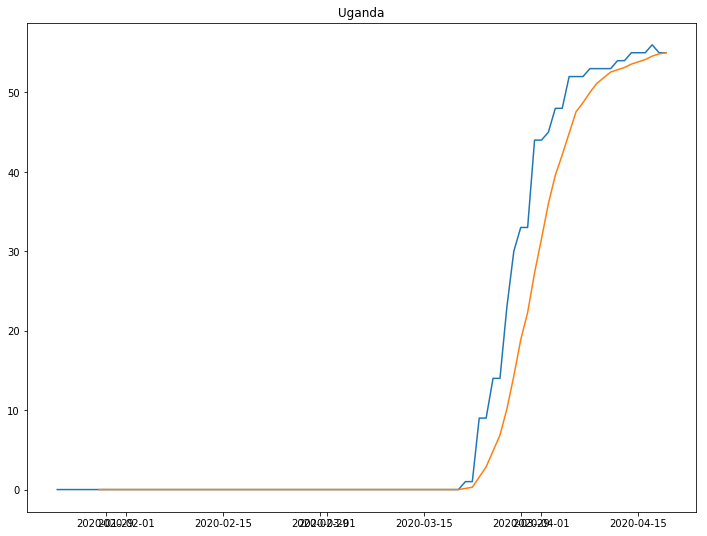

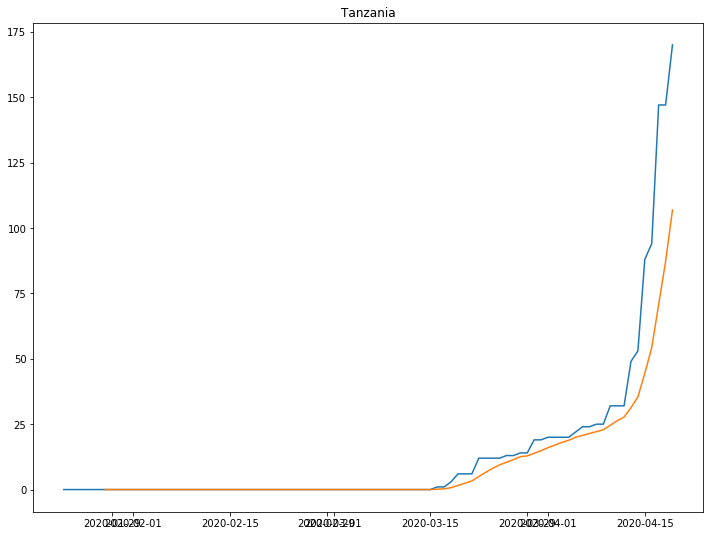

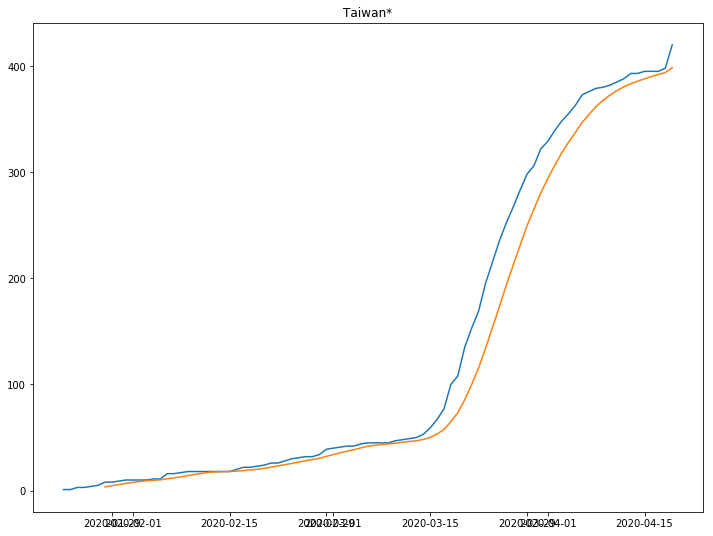

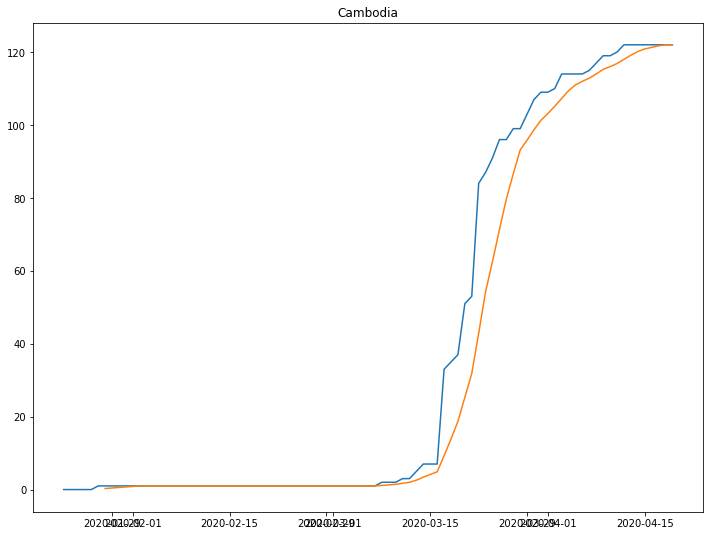

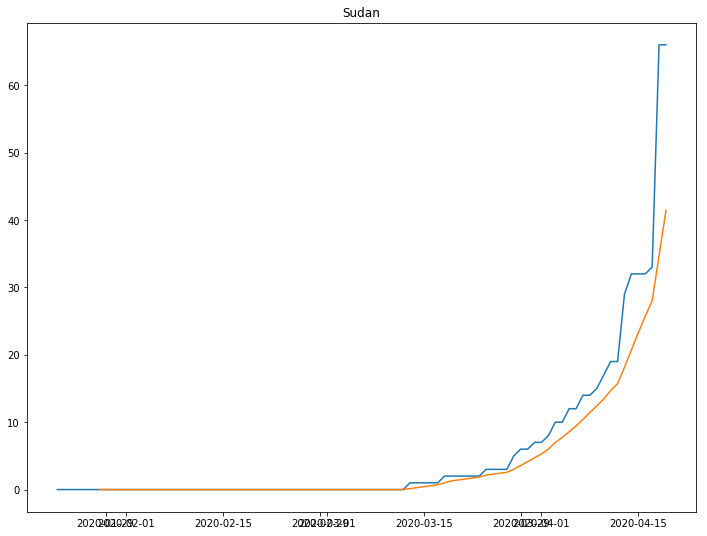

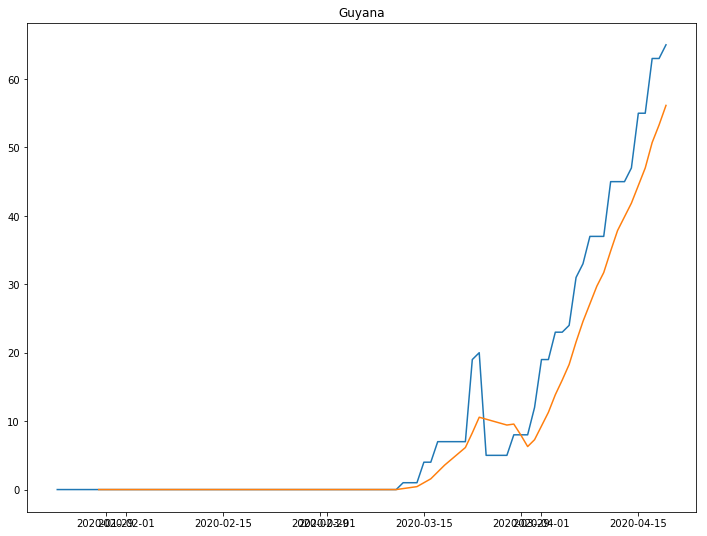

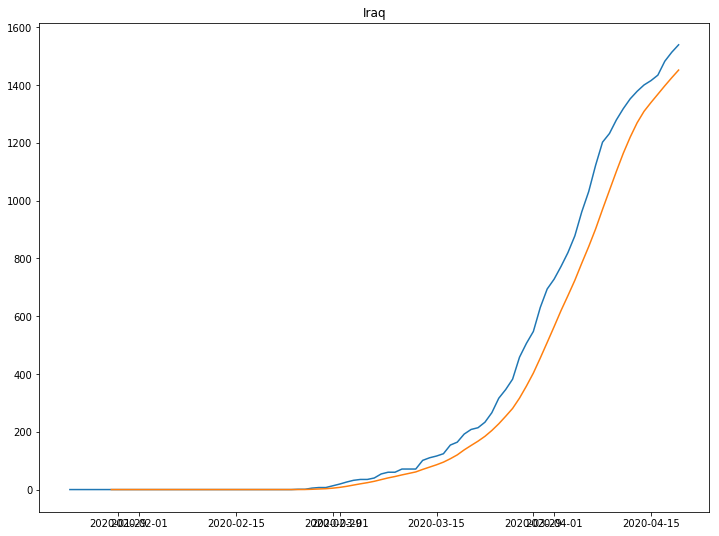

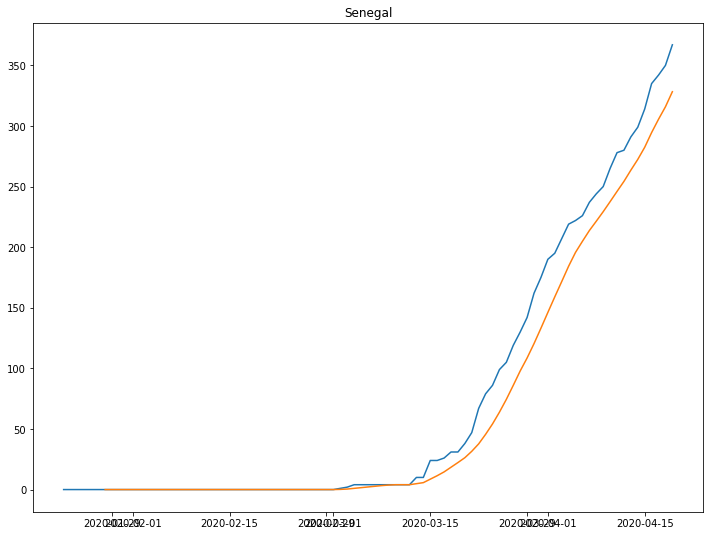

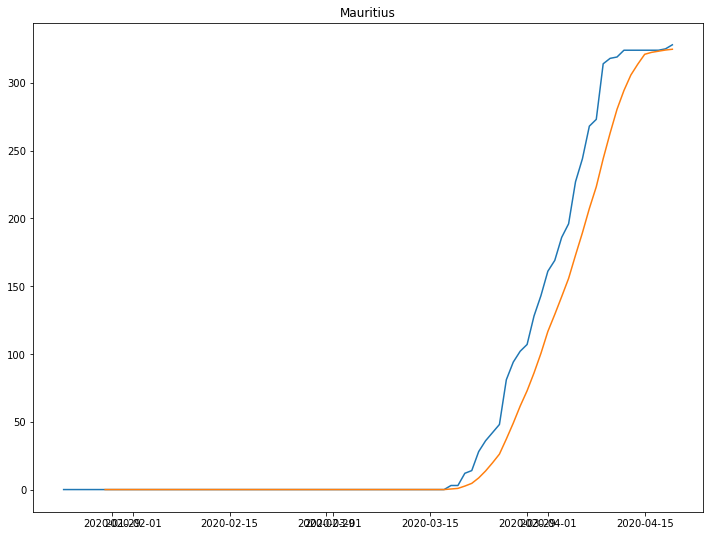

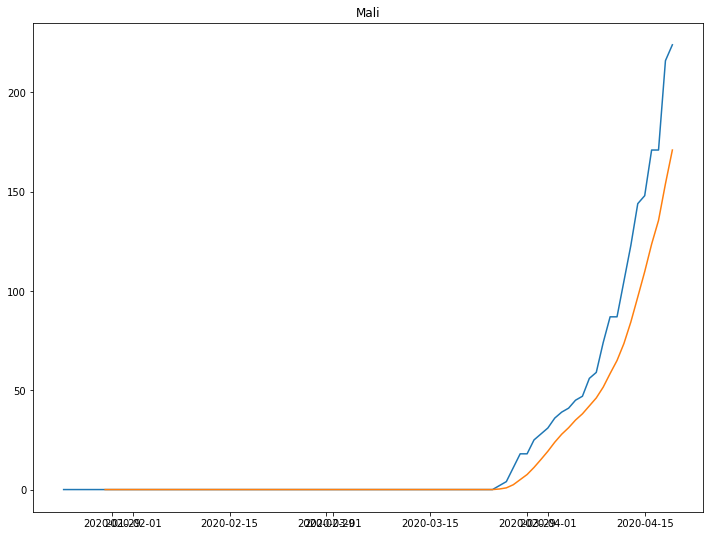

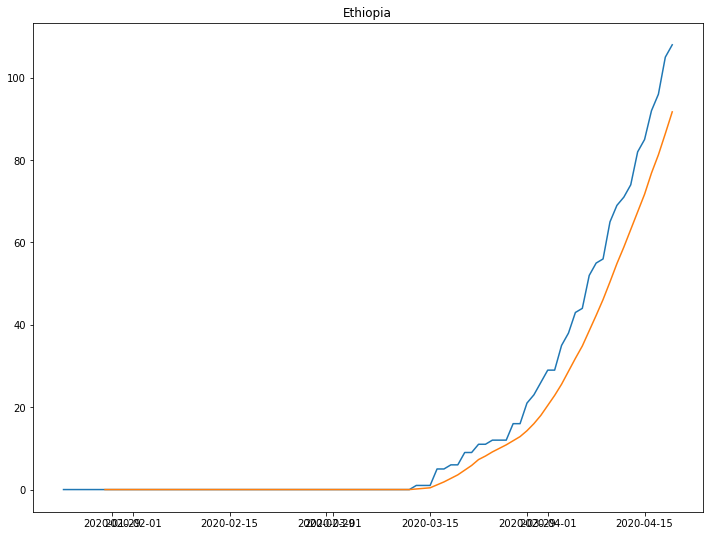

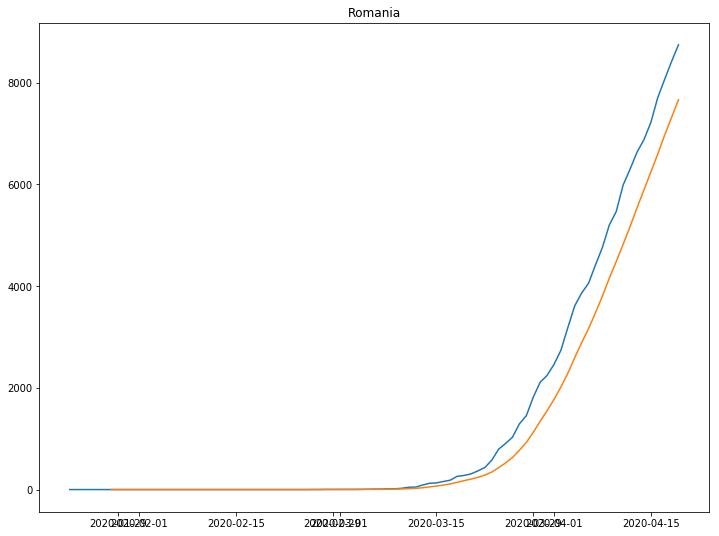

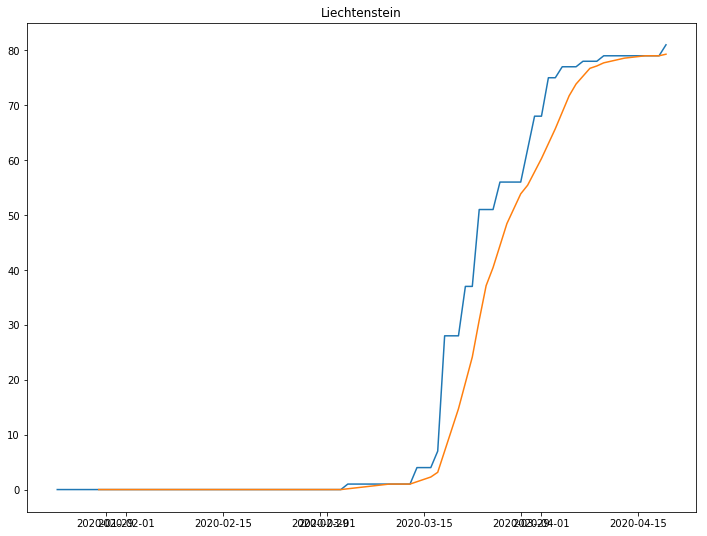

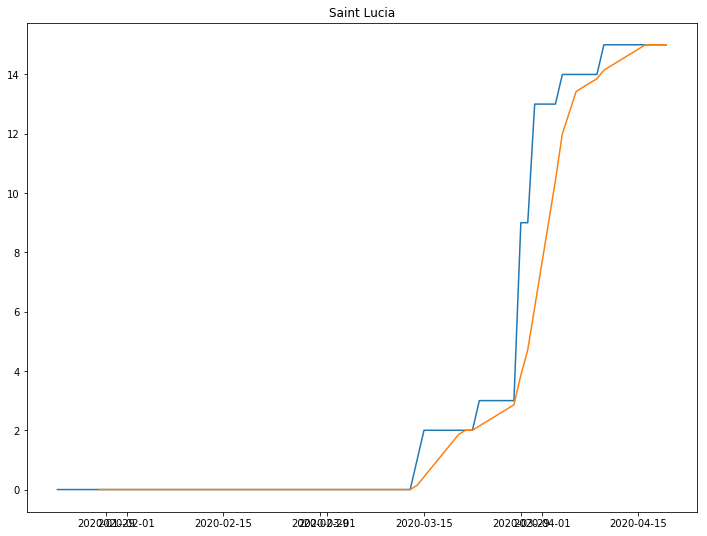

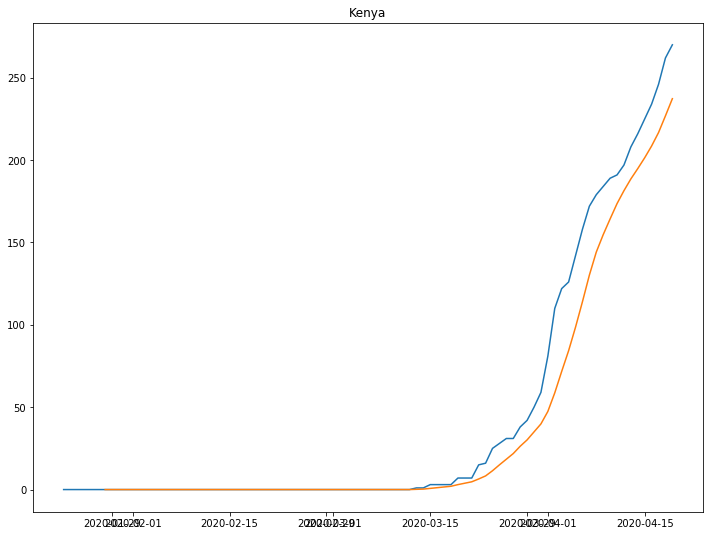

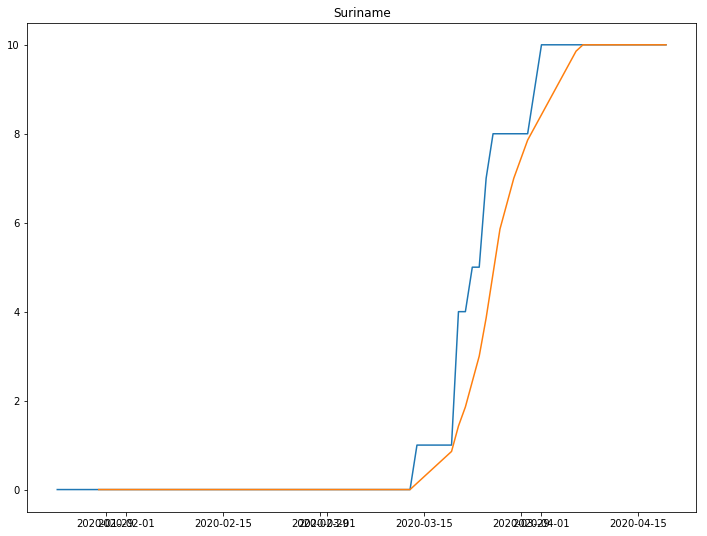

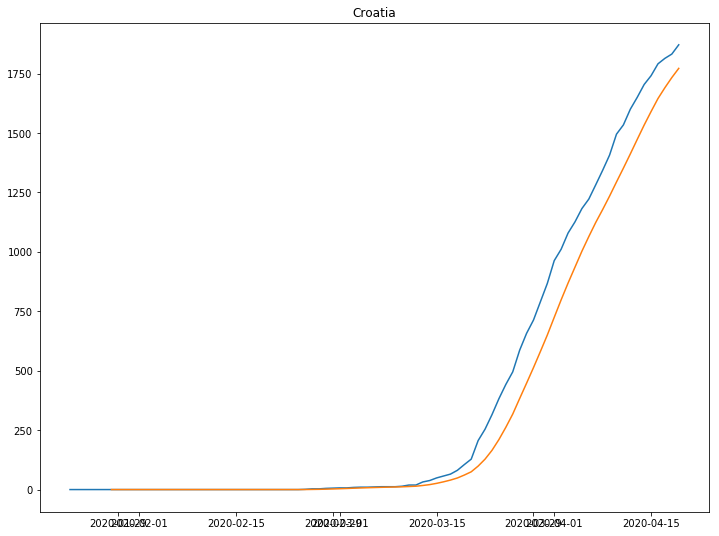

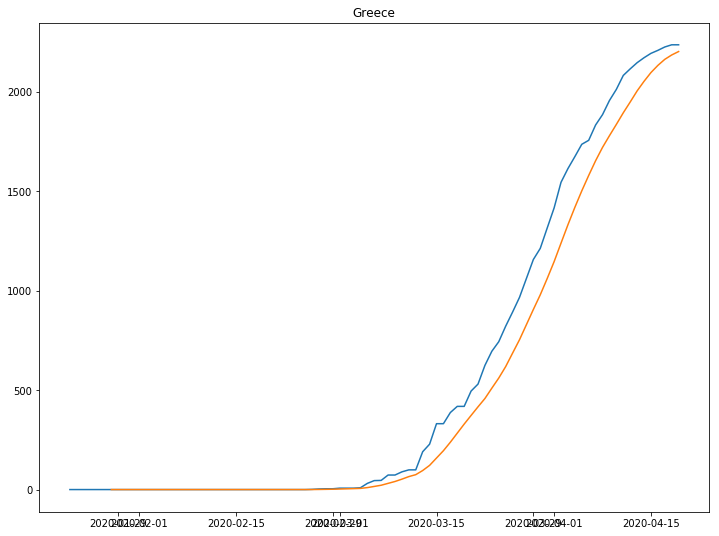

In [74]:
countries = set(df['Country/Region'].values)

for country in countries:
    country_data = df[df['Country/Region'] == country].drop(columns=['Province/State', 'Lat', 'Long', 'Country/Region']).sum()
    
    country_df = pd.DataFrame(data=country_data, columns=[country])
    country_df['Date'] = pd.to_datetime(country_df.index)
    country_df.set_index('Date', inplace=True)

    plt.figure(figsize=(12,9))
    plt.title(country)
    plt.plot(country_df[country])
    plt.plot(country_df[country].rolling(7).mean());